In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def print_result(posterior,ans):
    print('Posterior (in log scale):')
    for i in range(10):
        print(i,': ',posterior[i])
    print('Prediction: {}, Ans: {}\n'.format(np.argmin(posterior),int(ans)))

In [3]:
def print_imagination_continuous(mean):
    print('Imagination of numbers in Bayesian classifier:\n')
    for i in range(10):
        print(i,':')
        for p in range(28*28):
            if mean[i][p]<128:
                print('0', end=' ')
            else:
                print('1', end=' ')
            if p%28==27:
                print('')
        print('')

In [4]:
def print_imagination(train_result):
    print('Imagination of numbers in Bayesian classifier:\n')
    for i in range(10):
        print(i,':')
        for p in range(28*28):
            no=yes=0
            for j in range(16):
                if(train_result[i][p][j]!=0):
                    no+=train_result[i][p][j]
                else:
                    no+=0.0001/train_label_count[i]
            for j in range(16,32):
                if(train_result[i][p][j]!=0):
                    yes+=train_result[i][p][j]
                else:
                    yes+=0.0001/train_label_count[i]
            if no>yes:
                print('0', end=' ')
            else:
                print('1', end=' ')
            if p%28==27:
                print('')
        print('')

In [24]:
def test_continuous(mean,varience,N):
    error=0
    for i in range(N):
        posterior=np.copy(prior)
        for l in range(10):
            for p in range(28*28):
                posterior[l]+=np.log(1/np.sqrt(2*np.pi*varience[l][p]))-(((test_image[i][p]-mean[l][p])**2)/(2*varience[l][p]))-np.log(train_label_count[l])
        posterior/=np.sum(posterior)
        print_result(posterior,test_label[i])
        if(np.argmin(posterior)!=test_label[i]):
            error+=1
    print_imagination_continuous(mean)
    print('Error rate: ',float(error/N))

In [6]:
def train_continuous(N):
    mean=np.zeros((10,28*28))
    varience=np.zeros((10,28*28))
    for i in range(N):
        for p in range(28*28):
            mean[int(train_label[i])][p]+=train_image[i][p]
            varience[int(train_label[i])][p]+=train_image[i][p]**2
    for l in range(10):
        mean[l]=mean[l]/train_label_count[l]
        varience[l]/=train_label_count[l]
        varience[l]-=mean[l]**2
        for p in range(28*28):
            if(varience[l][p]==0):
                varience[l][p]=1000
    return mean, varience

In [7]:
def test_discrete(train_result,N):
    error=0
    for i in range(N):
        posterior=np.copy(prior)
        for label in range(10):
            for p in range(28*28):
                if(train_result[label][p][int(test_image[i][p]//8)]!=0):
                    posterior[label]+=np.log(train_result[label][p][int(test_image[i][p]//8)])
                else:
                    posterior[label]+=np.log(0.0001/train_label_count[label])
        posterior=posterior/np.sum(posterior)
        print_result(posterior,test_label[i])
        if(np.argmin(posterior)!=test_label[i]):
            error+=1
    print_imagination(train_result)
    print('Error rate: ',float(error/N))

In [23]:
def train_discrete(N):
    image_bin_count=np.zeros((10,28*28,32))
    probability=np.zeros((10,28*28,32))
    for i in range(N):
        for p in range(28*28):
            image_bin_count[int(train_label[i])][p][int(train_image[i][p]//8)]+=1
    for label in range(10):
        probability[label]=image_bin_count[label]/train_label_count[label]
    return probability

In [9]:
def idx3_decode(file):
    data=open(file, 'rb').read()
    # > for Big-endian, iiii for 4 integers, each size=4
    fmt='>iiii'
    offset=0
    magic_number, image_numbers, height, width=struct.unpack_from(fmt,data,offset)
    image_size=height*width
    offset+=struct.calcsize(fmt)
    # B for unsigned byte, size=1
    fmt='>'+str(image_size)+'B'
    images=np.empty((image_numbers,height*width))
    for i in range(image_numbers):
        images[i]=np.array(struct.unpack_from(fmt,data,offset)).reshape((height*width))
        offset+=struct.calcsize(fmt)
    return images,image_numbers

In [10]:
def idx1_decode(file):
    data=open(file, 'rb').read()
    # > for Big-endian, ii for 2 integers, each size=4
    fmt='>ii'
    offset=0
    magic_number, label_numbers=struct.unpack_from(fmt,data,offset)
    offset+=struct.calcsize(fmt)
    # B for unsigned byte, size=1
    fmt='>B'
    labels=np.empty(label_numbers)
    for i in range(label_numbers):
        labels[i]=struct.unpack_from(fmt,data,offset)[0]
        offset+=struct.calcsize(fmt)
    return labels,label_numbers

In [11]:
train_image='train-images.idx3-ubyte'
train_label='train-labels.idx1-ubyte'
test_image='t10k-images.idx3-ubyte'
test_label='t10k-labels.idx1-ubyte'

In [12]:
train_image,train_image_number=idx3_decode(train_image)
test_image,test_image_number=idx3_decode(test_image)
train_label,train_label_number=idx1_decode(train_label)
test_label,test_label_number=idx1_decode(test_label)

In [13]:
train_image[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [14]:
train_image.shape

(60000, 784)

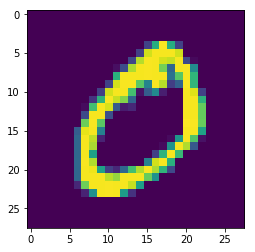

In [15]:
plt.imshow(train_image[1].reshape(28,28))

In [16]:
train_label_count=np.zeros(10)
for label in train_label:
    train_label_count[int(label)]+=1
train_label_count

array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
       5949.])

In [17]:
prior=np.log(train_label_count/train_label_number)
prior

array([-2.31550148, -2.18598795, -2.30960971, -2.28098669, -2.32927136,
       -2.40406426, -2.31634601, -2.25936597, -2.32773198, -2.31112142])

In [32]:
if(int(input('Toggle option: (0 for discrete mode, 1 for continuous mode) \n'))):
    print('ys')
    mean,varience=train_continuous(train_image_number)
    test_continuous(mean,varience,test_image_number)
else:
    train_result=train_discrete(train_image_number)
    test_discrete(train_result,test_image_number)

Toggle option: (0 for discrete mode, 1 for continuous mode) 
1
ys
Posterior (in log scale):
0 :  0.014526999347942044
1 :  0.1819895227382162
2 :  0.016541795804635127
3 :  0.014815086109529285
4 :  0.014150260249069898
5 :  0.013573411765421374
6 :  0.7034356113595389
7 :  0.012670954671576553
8 :  0.015451686379839276
9 :  0.012844671574231425
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.023684792192629388
1 :  0.012129017166457472
2 :  0.005418273247114304
3 :  0.3180396173506458
4 :  0.012325310279290251
5 :  0.007983890439527389
6 :  0.00823285594073258
7 :  0.4136867594096818
8 :  0.016545843609095435
9 :  0.1819536403648256
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0002117647859814327
1 :  0.00019220241539526323
2 :  0.0002055327889263925
3 :  0.00020575405144680496
4 :  0.0002050010215059582
5 :  0.0002044593759075625
6 :  0.00020587005642052847
7 :  0.9981475709945806
8 :  0.00020534615145357293
9 :  0.00021649835838181706
Prediction: 1, Ans: 1

Poster

Posterior (in log scale):
0 :  0.09280023874378772
1 :  0.178997671870396
2 :  0.09163128904047388
3 :  0.09121647749520646
4 :  0.08902781684349607
5 :  0.0900394134748499
6 :  0.09525794000301224
7 :  0.09099356203389036
8 :  0.0907127535999544
9 :  0.08932283689493305
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.08366636248885509
1 :  0.20864502755348388
2 :  0.08565102571311929
3 :  0.08483450244963568
4 :  0.08614766375081176
5 :  0.08466689379834162
6 :  0.10188186636211714
7 :  0.09149203698027576
8 :  0.08486000600318964
9 :  0.08815461490017001
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0981774133053723
1 :  0.08991718990674478
2 :  0.09556601774199365
3 :  0.09513643979932933
4 :  0.09554901026455243
5 :  0.09469514977035079
6 :  0.09504258181368676
7 :  0.13268205210733053
8 :  0.09526546646918689
9 :  0.10796867882145243
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09835192901810219
1 :  0.1314227920362183
2 :  0.10901537777002573
3 :  0.0

Posterior (in log scale):
0 :  0.0016335682937816411
1 :  0.00949841682225224
2 :  0.0002890516277849761
3 :  0.0002631322932206223
4 :  0.0003343106013486819
5 :  0.00030930802790852716
6 :  0.011490127343841515
7 :  0.00021166270746100684
8 :  0.0024009045996989226
9 :  0.9735695176827018
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.07609965041486731
1 :  0.2954092654209968
2 :  0.0743567930270956
3 :  0.07869557221727443
4 :  0.07652885886341401
5 :  0.07449700359376411
6 :  0.0789140057530791
7 :  0.08851496628595815
8 :  0.07525688216563071
9 :  0.08172700225791978
Prediction: 2, Ans: 8

Posterior (in log scale):
0 :  0.11120283797381379
1 :  0.11602446554047172
2 :  0.09972068140508694
3 :  0.09622091473265165
4 :  0.09473167553246516
5 :  0.09529543091222402
6 :  0.10145951751903699
7 :  0.09512048016770779
8 :  0.09578324658914436
9 :  0.09444074962739747
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.09302291303618675
1 :  0.09374490669923669
2 :  0.0892366

Posterior (in log scale):
0 :  0.06549252437563541
1 :  0.0016594959989175999
2 :  0.0009023938005452477
3 :  0.0011236702978602777
4 :  0.0034704334409596162
5 :  0.0010005615458805247
6 :  0.0008793773909331749
7 :  0.8865572314746988
8 :  0.004232929694394601
9 :  0.034681381980174834
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.10288357278085689
1 :  0.09917603952456149
2 :  0.10251200666080021
3 :  0.09958934568480399
4 :  0.09843815120164358
5 :  0.09870631829958267
6 :  0.10231675019473278
7 :  0.09889382596691078
8 :  0.0988957949608114
9 :  0.09858819472529623
Prediction: 4, Ans: 9

Posterior (in log scale):
0 :  0.09394630751300408
1 :  0.1138520901865156
2 :  0.09371966643418662
3 :  0.09071542651929641
4 :  0.09353814869948938
5 :  0.0909230180393842
6 :  0.14427467089811166
7 :  0.09378000808102686
8 :  0.09126287851334275
9 :  0.09398778511564249
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.09901707893737854
1 :  0.08948589980355956
2 :  0.0942365005

Posterior (in log scale):
0 :  0.0925353410370475
1 :  0.14439243712138472
2 :  0.0913064251083586
3 :  0.09240603283795402
4 :  0.09036750476056411
5 :  0.09070558824453802
6 :  0.12455401096574337
7 :  0.09280442628331861
8 :  0.0905376331412876
9 :  0.09039060049980345
Prediction: 4, Ans: 2

Posterior (in log scale):
0 :  0.08885609722402245
1 :  0.1809202356173078
2 :  0.0884007737886739
3 :  0.08608393771563919
4 :  0.08668793158184153
5 :  0.08566295965104845
6 :  0.11671926768684951
7 :  0.09212810046063309
8 :  0.08614395174845721
9 :  0.08839674452552687
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.021035702738142176
1 :  0.037237900161906666
2 :  0.02083968801243801
3 :  0.021182851865712185
4 :  0.02065216142729951
5 :  0.020830710240224433
6 :  0.020790732504100528
7 :  0.7951573083999988
8 :  0.02072683534374566
9 :  0.021546109306432103
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.11721485613483114
1 :  0.12431808541536482
2 :  0.09882757762927556
3 

Posterior (in log scale):
0 :  0.02031290030103587
1 :  0.03854176490410385
2 :  0.005008655125139215
3 :  0.5194283519163863
4 :  0.006708258010623881
5 :  0.005877442030627584
6 :  0.34805303468173154
7 :  0.016671117158477015
8 :  0.033322025774229026
9 :  0.0060764500976456
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09566803996595274
1 :  0.1491821422525886
2 :  0.09414106546177928
3 :  0.09304819332313181
4 :  0.09134661102468668
5 :  0.09206381452513239
6 :  0.10754861490358573
7 :  0.09352649242972905
8 :  0.09235256525510738
9 :  0.09112246085830635
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.06517002894503929
1 :  0.20050525045760748
2 :  0.05801728027745426
3 :  0.05989285238102043
4 :  0.05715376731128363
5 :  0.0573090094384477
6 :  0.3000510258356651
7 :  0.08594591469806227
8 :  0.05757017096845666
9 :  0.05838469968696311
Prediction: 4, Ans: 9

Posterior (in log scale):
0 :  0.4579418845176901
1 :  0.3753427220074644
2 :  0.07873679183839341
3 : 

1 :  0.09304206671552692
2 :  0.10006082811504138
3 :  0.09921124575456658
4 :  0.09920058043461252
5 :  0.09872209156182482
6 :  0.10916776079207471
7 :  0.09990907025002822
8 :  0.09918948570260197
9 :  0.09866475621862762
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.00021783795213335555
1 :  0.0002336768905748273
2 :  0.00020855699789334108
3 :  0.00020825713291574926
4 :  0.0002105938245327017
5 :  0.00020782530791432923
6 :  0.00020979124976333753
7 :  0.9980548810954912
8 :  0.00020686462054124132
9 :  0.00024171492823989177
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.09789468874570342
1 :  0.09439162693108295
2 :  0.09795447883985636
3 :  0.09616085946121145
4 :  0.09560942189767258
5 :  0.09517688776240361
6 :  0.12253059806110993
7 :  0.10826122164541205
8 :  0.09575168250974794
9 :  0.0962685341457997
Prediction: 1, Ans: 5

Posterior (in log scale):
0 :  0.00019475589254193347
1 :  0.04743106069000099
2 :  0.00020990676041048568
3 :  0.00033892083313342

Posterior (in log scale):
0 :  0.08439200488019825
1 :  0.08698616464679416
2 :  0.09999095323033784
3 :  0.07818395513030536
4 :  0.07835212659573543
5 :  0.07722689265801301
6 :  0.261250083591142
7 :  0.0778155834773691
8 :  0.07780040715053001
9 :  0.07800182863957493
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.24579809268780367
1 :  0.10199513074258178
2 :  0.034261864024595766
3 :  0.034993388133774776
4 :  0.05466634501407256
5 :  0.033979904029384445
6 :  0.15989822109684249
7 :  0.029748453307102782
8 :  0.2765634592224365
9 :  0.02809514174140518
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.101555470119684
1 :  0.0957716517525507
2 :  0.09896666911519977
3 :  0.09782330641579412
4 :  0.09809955651862354
5 :  0.09777129400556314
6 :  0.1105268333156903
7 :  0.09986285444366813
8 :  0.09819550359670869
9 :  0.10142686071651767
Prediction: 1, Ans: 3

Posterior (in log scale):
0 :  0.11993456385403421
1 :  0.13224527504822625
2 :  0.09556070201356708
3 :  0

Posterior (in log scale):
0 :  0.007936577723227648
1 :  0.08396185493751918
2 :  0.008311231825503787
3 :  0.7637653651574486
4 :  0.008011682786117816
5 :  0.007688098995606062
6 :  0.09664601507327789
7 :  0.008134656147212252
8 :  0.007465012232070673
9 :  0.008079505122015966
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.008141396778266035
1 :  0.9289864817601009
2 :  0.006851919572447386
3 :  0.0075221421565488215
4 :  0.006517939124871579
5 :  0.006709758846563633
6 :  0.007117802320068592
7 :  0.006571658665138192
8 :  0.013463336669455081
9 :  0.00811756410653978
Prediction: 4, Ans: 7

Posterior (in log scale):
0 :  0.04349147994415429
1 :  0.04524241212141127
2 :  0.04226834349920024
3 :  0.042388572552975956
4 :  0.04296692701973027
5 :  0.04239999586272812
6 :  0.0428235466765054
7 :  0.1396446843940287
8 :  0.04274777205717716
9 :  0.5160262658720888
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.04952556365392114
1 :  0.3563110636951983
2 :  0.025296115

Posterior (in log scale):
0 :  0.06364782675186179
1 :  0.39360189167742254
2 :  0.06502894215335171
3 :  0.06505322078472672
4 :  0.06540168371995538
5 :  0.06433117795648198
6 :  0.06500956827891646
7 :  0.08455660657005652
8 :  0.06517702891015002
9 :  0.0681920531970768
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.10319957450674355
1 :  0.09367990771589738
2 :  0.10055393781945143
3 :  0.09983038132743721
4 :  0.09974169514358308
5 :  0.09927978892327742
6 :  0.1047273305595824
7 :  0.09995354421298151
8 :  0.09983422215110167
9 :  0.09919961763994446
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.02447982528333218
1 :  0.038539494297211534
2 :  0.023271778221508315
3 :  0.022033341307976427
4 :  0.02141843752728815
5 :  0.021665972209789254
6 :  0.7841024505950559
7 :  0.02156282612064503
8 :  0.02164887023522749
9 :  0.021277004201965707
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.3987943490055802
1 :  0.20437336860935712
2 :  0.05019650042358615
3

Posterior (in log scale):
0 :  0.043106418372530514
1 :  0.0834123534726665
2 :  0.04057559898636697
3 :  0.03946757050159958
4 :  0.03893556625163173
5 :  0.03923947510033796
6 :  0.5965471375796425
7 :  0.039296921129024914
8 :  0.039320509163825394
9 :  0.04009844944237407
Prediction: 4, Ans: 7

Posterior (in log scale):
0 :  0.10202157860283695
1 :  0.09178366296213224
2 :  0.09826679861518704
3 :  0.09806703349210452
4 :  0.09829151650780106
5 :  0.09748256054425135
6 :  0.09784766392586194
7 :  0.11809203604507978
8 :  0.09788691562886942
9 :  0.10026023367587551
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.086181980976918
1 :  0.2233964018562254
2 :  0.08191187346693019
3 :  0.08801271841263683
4 :  0.08237337989077011
5 :  0.08300474935912837
6 :  0.086566054317886
7 :  0.10166505171283417
8 :  0.08387626426844427
9 :  0.08301152573822669
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0996855841393017
1 :  0.12936519183229298
2 :  0.09652850508914311
3 :  0.

2 :  0.007942469403278123
3 :  0.007989601404344139
4 :  0.008701347574969704
5 :  0.008524119622759906
6 :  0.008241903845453235
7 :  0.3136399054947161
8 :  0.012125270448844865
9 :  0.6110755315951707
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.1011671732288087
1 :  0.09053973433862501
2 :  0.09701966575224298
3 :  0.09688018439540484
4 :  0.09687872085052296
5 :  0.09637151950756086
6 :  0.09690472773367041
7 :  0.12987377941219708
8 :  0.09673504555186528
9 :  0.09762944922910179
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09099391009270129
1 :  0.11284730854432334
2 :  0.0928879548839942
3 :  0.09028957435123819
4 :  0.09021410467409176
5 :  0.08829644334537831
6 :  0.15256715295749357
7 :  0.10112201717675784
8 :  0.0886956413581857
9 :  0.09208589261583577
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.08964894634265337
1 :  0.12185273535363275
2 :  0.08938369396145854
3 :  0.0874457417923986
4 :  0.09509335574077682
5 :  0.08792230406926242
6 :

Posterior (in log scale):
0 :  0.09658279669199536
1 :  0.14133676055213268
2 :  0.09492016759298558
3 :  0.09368776258693276
4 :  0.09168267080248182
5 :  0.09240701782203577
6 :  0.10623166316030629
7 :  0.09861761511963539
8 :  0.09258701919629139
9 :  0.09194652647520297
Prediction: 4, Ans: 9

Posterior (in log scale):
0 :  0.013633699644626584
1 :  0.06429935064141924
2 :  0.00490271636822111
3 :  0.004805195283790237
4 :  0.004718909658321351
5 :  0.007002354813541347
6 :  0.10039124471219625
7 :  0.005314711922417169
8 :  0.01387117750216261
9 :  0.7810606394533042
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.09240573171065641
1 :  0.2033853916661596
2 :  0.07281833217928786
3 :  0.08731907926006038
4 :  0.10655896015339057
5 :  0.07591561221488369
6 :  0.07123859243475031
7 :  0.1100123198537474
8 :  0.08497865958889085
9 :  0.09536732093817281
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.061551683259800455
1 :  0.1975484112866717
2 :  0.04805559594642045


Posterior (in log scale):
0 :  0.25624425959481983
1 :  0.07257875784303149
2 :  0.03924761606032479
3 :  0.04848399264921765
4 :  0.04940524330351959
5 :  0.04560067594547864
6 :  0.03835781611868223
7 :  0.06170844926794962
8 :  0.05025788595085804
9 :  0.33811530326611816
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.10152691072265682
1 :  0.09179589349802263
2 :  0.09867316409682059
3 :  0.09803754337329727
4 :  0.09795798498788082
5 :  0.09746194431870955
6 :  0.12069272402057313
7 :  0.0985288369135897
8 :  0.09791538885122994
9 :  0.0974096092172195
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.02289505385118913
1 :  0.05413408951030155
2 :  0.022252583592236464
3 :  0.02105962597863778
4 :  0.020579250141054193
5 :  0.020744925416579917
6 :  0.7763018533424865
7 :  0.020635901093504525
8 :  0.020903586167458955
9 :  0.02049313090655126
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.036478027832806424
1 :  0.04929497312670211
2 :  0.0365544654046719


1 :  0.09018977583482574
2 :  0.0964217127640051
3 :  0.09611061356672547
4 :  0.0964745502456677
5 :  0.09562931078235808
6 :  0.0961660870767188
7 :  0.1354553515347143
8 :  0.09620093723892721
9 :  0.09865043083903288
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.009693309111086105
1 :  0.742485164012572
2 :  0.015096873757302426
3 :  0.00872679648667884
4 :  0.008115275712313536
5 :  0.008173422221526545
6 :  0.008646426931366026
7 :  0.17998803304969752
8 :  0.008291022327571736
9 :  0.010783676389885269
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.0002086971059710965
1 :  0.00046045428339951946
2 :  0.0002099050213789338
3 :  0.00021458427027876896
4 :  0.00032857825009654135
5 :  0.0002109934151490799
6 :  0.0005197607908949616
7 :  0.9970367558529253
8 :  0.00021283732523040913
9 :  0.0005974336846755359
Prediction: 0, Ans: 2

Posterior (in log scale):
0 :  0.10940580030643478
1 :  0.1478676669534112
2 :  0.0960745846814096
3 :  0.09137313115319787
4 :  0.0

9 :  0.05993189527686593
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.09832921823078454
1 :  0.09798908970033553
2 :  0.09696649393680716
3 :  0.09540849549360178
4 :  0.09597970812399387
5 :  0.09500161128213586
6 :  0.12877362158030933
7 :  0.10057513995132909
8 :  0.0949192278288457
9 :  0.09605739387185726
Prediction: 8, Ans: 9

Posterior (in log scale):
0 :  0.024283345487613326
1 :  0.08924393103773239
2 :  0.01664869727764351
3 :  0.01620038689767832
4 :  0.017895311079305785
5 :  0.025768207408662657
6 :  0.021859529429533633
7 :  0.021416836639152483
8 :  0.05415355342981544
9 :  0.7125302013128625
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.09284774773673964
1 :  0.1242065039864509
2 :  0.092182429155785
3 :  0.08924038873316796
4 :  0.09270190955913836
5 :  0.08915816805025079
6 :  0.1410971021279032
7 :  0.09553242883017722
8 :  0.08969932178769861
9 :  0.09333400003268824
Prediction: 5, Ans: 3

Posterior (in log scale):
0 :  0.09347722465330749
1 :  

Posterior (in log scale):
0 :  0.09704075830297264
1 :  0.10793557126580873
2 :  0.09523622635253255
3 :  0.09490502188485077
4 :  0.0952699346987523
5 :  0.09434255640439733
6 :  0.09502502697602787
7 :  0.12573407776865914
8 :  0.09474955812592607
9 :  0.09976126822007249
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.09387812090614481
1 :  0.13935722152830005
2 :  0.09429632571476994
3 :  0.09212182749591406
4 :  0.09197227455497088
5 :  0.0917358242555867
6 :  0.11609863294057843
7 :  0.09529420264677446
8 :  0.09221348103412128
9 :  0.09303208892283939
Prediction: 5, Ans: 9

Posterior (in log scale):
0 :  0.04494054161575345
1 :  0.040784806231824206
2 :  0.043629030928347155
3 :  0.04364432857264371
4 :  0.04347349212945471
5 :  0.04335944453447857
6 :  0.043781683214291996
7 :  0.5997073944095839
8 :  0.04354562164100653
9 :  0.053133656722615726
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.12983708632656882
1 :  0.13775227288513703
2 :  0.09302532887770361
3

Posterior (in log scale):
0 :  0.09973574902895618
1 :  0.09097984761622763
2 :  0.09756732266204499
3 :  0.09722084268581828
4 :  0.0969012572212069
5 :  0.09656981142141086
6 :  0.12822019610043356
7 :  0.09898134300191232
8 :  0.09687658589355852
9 :  0.09694704436843075
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09639181299678613
1 :  0.10725864383882978
2 :  0.09553223472088529
3 :  0.09388150108131342
4 :  0.09457515703521853
5 :  0.09320932249680243
6 :  0.09411383900899982
7 :  0.1268196576858781
8 :  0.09390300383536888
9 :  0.1043148272999176
Prediction: 5, Ans: 3

Posterior (in log scale):
0 :  0.0005818641676341643
1 :  0.0006037997064212862
2 :  0.0005772914036098307
3 :  0.0005773235684311499
4 :  0.0005752537358633154
5 :  0.0005701464159063241
6 :  0.0005764100932868011
7 :  0.9946480116186337
8 :  0.0005717345702780161
9 :  0.0007181647199351862
Prediction: 5, Ans: 6

Posterior (in log scale):
0 :  0.09402796644586961
1 :  0.10290406685016447
2 :  0.094872

Posterior (in log scale):
0 :  0.05960439538431266
1 :  0.0979605795575107
2 :  0.05745688606212787
3 :  0.057868348534074646
4 :  0.060613581452207535
5 :  0.057886249072177126
6 :  0.056435166884272726
7 :  0.4286657323230311
8 :  0.05993040475027916
9 :  0.06357865598000657
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.00021404127928955976
1 :  0.003990085360585926
2 :  0.00021836146665536797
3 :  0.00022888354975310045
4 :  0.0002079102998999679
5 :  0.00021302032534582807
6 :  0.0002401516645359081
7 :  0.9928964321845466
8 :  0.0002538269927275196
9 :  0.0015372868766602662
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.0082014753218113
1 :  0.010112709496603107
2 :  0.004508993280186679
3 :  0.004809853827916943
4 :  0.013433862126401819
5 :  0.007688317967101458
6 :  0.004888079348470668
7 :  0.2342339718000343
8 :  0.045534780593482094
9 :  0.6665879562379917
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.01012810620175596
1 :  0.009086989986810947


Posterior (in log scale):
0 :  0.08804690327501229
1 :  0.18572732101104542
2 :  0.08916611375361297
3 :  0.08883982904727673
4 :  0.08886843009049293
5 :  0.08823220985941473
6 :  0.08966296256739088
7 :  0.10232812489987857
8 :  0.08887893995279375
9 :  0.09024916554308178
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.029202397269605808
1 :  0.03767112500889906
2 :  0.026636281221704878
3 :  0.02455285921117309
4 :  0.024190182948152405
5 :  0.02434866145347416
6 :  0.7607070616827545
7 :  0.024267552035830614
8 :  0.02438787310190687
9 :  0.02403600606649859
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.00029701890625691236
1 :  0.000295669977001857
2 :  0.0002921561503033884
3 :  0.0002936703582626619
4 :  0.0002914202559773748
5 :  0.00029077671824452627
6 :  0.0002907957950356401
7 :  0.9973126372673755
8 :  0.00029214850877869804
9 :  0.0003437060627634069
Prediction: 5, Ans: 6

Posterior (in log scale):
0 :  0.09172581993490288
1 :  0.1623870774030779
2 :  0

Posterior (in log scale):
0 :  0.09366834752237296
1 :  0.16186122412373313
2 :  0.09225624022349112
3 :  0.09228181378909468
4 :  0.0911094194009982
5 :  0.09106978041261728
6 :  0.10111880261011222
7 :  0.09489603343018194
8 :  0.09042246430822673
9 :  0.09131587417917167
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.004163330867027102
1 :  0.957051725578704
2 :  0.004361862343296155
3 :  0.0058036823057334265
4 :  0.004249739465729257
5 :  0.00454701984191894
6 :  0.004198165241402654
7 :  0.004596180858898822
8 :  0.004642121657113175
9 :  0.006386171840176412
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.11540038099661433
1 :  0.1355363054803588
2 :  0.09822502041806347
3 :  0.09163903968563372
4 :  0.08997508835322461
5 :  0.0903650282526739
6 :  0.10867056572906958
7 :  0.09049354863208292
8 :  0.09060359118877198
9 :  0.08909143126350653
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.42157991332892736
1 :  0.12681015148055605
2 :  0.0554194704406398

Posterior (in log scale):
0 :  0.1624321220137644
1 :  0.2971474088253554
2 :  0.03493509838564433
3 :  0.038537157495672394
4 :  0.03913294061282789
5 :  0.03535627355995191
6 :  0.044683925554637495
7 :  0.031865450769184615
8 :  0.28470755295175987
9 :  0.03120206983120152
Prediction: 9, Ans: 3

Posterior (in log scale):
0 :  0.003215925620432158
1 :  0.0034007578336852037
2 :  0.0004554329245033079
3 :  0.0005926914886677403
4 :  0.0005961906586751303
5 :  0.0026833584384704304
6 :  0.00047364171170173803
7 :  0.9699314702794236
8 :  0.0006575349479058921
9 :  0.017992996096534843
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.4531065193058431
1 :  0.07348317529220767
2 :  0.062457602161895276
3 :  0.057440315587347184
4 :  0.05490621891941771
5 :  0.05640980726902095
6 :  0.07572222056137509
7 :  0.05515425987302853
8 :  0.05686523441544313
9 :  0.054454646614421225
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0070669719399368705
1 :  0.011218676541605263
2 :  

Posterior (in log scale):
0 :  0.04067836087746526
1 :  0.05522224736722196
2 :  0.04617225190087833
3 :  0.06058640767180856
4 :  0.038520561403790794
5 :  0.0371310059055527
6 :  0.049846015398555425
7 :  0.5853384558184559
8 :  0.03701934787678511
9 :  0.049485345779485955
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.019785757970588444
1 :  0.7883000999147429
2 :  0.021203307902049287
3 :  0.024767810395770796
4 :  0.0214485993962514
5 :  0.02100816391950997
6 :  0.03209754463808286
7 :  0.02536166591727
8 :  0.021310097888988813
9 :  0.02471695205674549
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.08971457231663343
1 :  0.15899044743252363
2 :  0.08976929842601704
3 :  0.08712692815682324
4 :  0.0896507506571736
5 :  0.08743897087429499
6 :  0.12345209861670846
7 :  0.09452490912656646
8 :  0.08814398719408839
9 :  0.09118803719917076
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.004898703537972884
1 :  0.6516706180406258
2 :  0.005100548340120597
3 

0 :  0.09718008304441758
1 :  0.11511681895759295
2 :  0.0959071766062232
3 :  0.09392781129470919
4 :  0.09472935327850808
5 :  0.09397648949293005
6 :  0.12041319055337549
7 :  0.09941293781902782
8 :  0.0943892785073073
9 :  0.09494686044590836
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.0002094452269275956
1 :  0.0002248290795646374
2 :  0.00020556365799371496
3 :  0.00020507130470554313
4 :  0.00020500587238942998
5 :  0.0002032013023187811
6 :  0.0002036098975321905
7 :  0.9981058551883104
8 :  0.0002036421942698986
9 :  0.0002337762759877376
Prediction: 5, Ans: 6

Posterior (in log scale):
0 :  0.056940342413980674
1 :  0.16610281246560643
2 :  0.05434093005636862
3 :  0.05338316178707161
4 :  0.052759358857483396
5 :  0.05221949189497964
6 :  0.4065891458105234
7 :  0.051224179233397345
8 :  0.055349246779326934
9 :  0.051091330701261824
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.0002149967660647353
1 :  0.00035185089417796584
2 :  0.0002061139721356050

Posterior (in log scale):
0 :  0.024176385802646718
1 :  0.3911336057881205
2 :  0.022962007226096218
3 :  0.023627883227317115
4 :  0.021342016266917032
5 :  0.022447380139694776
6 :  0.10992906554902983
7 :  0.3355380258257979
8 :  0.02283734923225354
9 :  0.026006280942126345
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.001464863636943446
1 :  0.010562072224247746
2 :  0.001393110924573815
3 :  0.0014104925418637155
4 :  0.0015006756596796398
5 :  0.0014290962465881767
6 :  0.0014589319443341978
7 :  0.8787312372399596
8 :  0.0014790597741625086
9 :  0.10057045980764726
Prediction: 2, Ans: 5

Posterior (in log scale):
0 :  0.02687670117460697
1 :  0.7084924856290605
2 :  0.02825396786326825
3 :  0.030243258894824012
4 :  0.02850808828030663
5 :  0.029165403609333306
6 :  0.03695520081102527
7 :  0.03480012341029509
8 :  0.04436484546033622
9 :  0.03233992486694358
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.05144632734196187
1 :  0.5373976570347312
2 :  0.0508

Posterior (in log scale):
0 :  0.034298811910896836
1 :  0.05972023694496341
2 :  0.035549191322699215
3 :  0.03153917994622707
4 :  0.0317516929727212
5 :  0.031633115961316786
6 :  0.6806434207435261
7 :  0.031624419900826206
8 :  0.03169848659207162
9 :  0.03154144370475149
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.05890469508936195
1 :  0.4713882524091319
2 :  0.05770493327938955
3 :  0.0574777229011602
4 :  0.056204936066064005
5 :  0.05672716712536191
6 :  0.06938032036096402
7 :  0.058492027565806376
8 :  0.0575045078237827
9 :  0.05621543737897741
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.10155576518724627
1 :  0.09268775421785275
2 :  0.09939398070431311
3 :  0.09904990314148646
4 :  0.09876135005907416
5 :  0.0983756548909909
6 :  0.1137894266235436
7 :  0.0991498823721037
8 :  0.09888113019890395
9 :  0.09835515260448514
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.00026524422329913497
1 :  0.0008281782295633959
2 :  0.00027106995167652

Posterior (in log scale):
0 :  0.0949555694500995
1 :  0.2256329067635381
2 :  0.07759757991557294
3 :  0.08072073607961928
4 :  0.07596301534508923
5 :  0.07796901746649898
6 :  0.11074845088496191
7 :  0.08678082044977181
8 :  0.07844979733087148
9 :  0.09118210631397687
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.09925945508028476
1 :  0.08935424002594791
2 :  0.0949604370094912
3 :  0.09444007108125173
4 :  0.0950258623474022
5 :  0.09405326805982103
6 :  0.094569880572967
7 :  0.13522668269418664
8 :  0.09439094188079476
9 :  0.10871916124785282
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0003769651169860969
1 :  0.0008287751230443671
2 :  0.0003748165479799399
3 :  0.000370734689033433
4 :  0.0003706043751077645
5 :  0.0003657387203777068
6 :  0.0003695682561416549
7 :  0.9961503251097442
8 :  0.00036985411286990334
9 :  0.00042261794871484174
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.04268677251820138
1 :  0.204266198907717
2 :  0.2638548961

Posterior (in log scale):
0 :  0.00042274278363291804
1 :  0.0007937731819578932
2 :  0.0004048523170562009
3 :  0.0003988712126639496
4 :  0.0004436158929941424
5 :  0.0004064273296245619
6 :  0.0005179373479071834
7 :  0.9956396040576853
8 :  0.00040875707258692935
9 :  0.0005634188038908188
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.05809374855631283
1 :  0.10017683669152336
2 :  0.05810800599753225
3 :  0.057230895404978874
4 :  0.05960906193570045
5 :  0.057637172368451575
6 :  0.05811119911854069
7 :  0.1424773188450641
8 :  0.058354928689509755
9 :  0.3502008323923862
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.1021884524884447
1 :  0.09363830757259514
2 :  0.10030887481766937
3 :  0.0998798624801941
4 :  0.09957393188413653
5 :  0.09919496360201543
6 :  0.10648753434865985
7 :  0.09977124931611245
8 :  0.0997979387562009
9 :  0.09915888473397148
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.015669763055884918
1 :  0.10058676522430192
2 :  0.01

Posterior (in log scale):
0 :  0.0002124053629530126
1 :  0.000303853690362208
2 :  0.00021004659665651738
3 :  0.00020819208052384698
4 :  0.00021658766290894797
5 :  0.00020747568884856571
6 :  0.0002183113145263323
7 :  0.9979319717894051
8 :  0.0002083358064827278
9 :  0.0002828200073327788
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.10369892268052633
1 :  0.09207986938771891
2 :  0.09860224604255154
3 :  0.09876752949167346
4 :  0.09868014727916138
5 :  0.0981315451259039
6 :  0.11283612681308067
7 :  0.10097580365309121
8 :  0.09788440079677325
9 :  0.09834340872951935
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.033931473499000234
1 :  0.7266583023535946
2 :  0.029682535384631427
3 :  0.029819471325487047
4 :  0.027335637390926756
5 :  0.02856042763842124
6 :  0.03205357753669347
7 :  0.02776799934892551
8 :  0.030227105397641993
9 :  0.03396347012467778
Prediction: 4, Ans: 7

Posterior (in log scale):
0 :  0.08200314963461405
1 :  0.08262430442053732
2 : 

Posterior (in log scale):
0 :  0.016553172515426248
1 :  0.01817213218651796
2 :  0.017594148890051786
3 :  0.013007505831991766
4 :  0.012737889981966947
5 :  0.012450994130452012
6 :  0.8696399508487339
7 :  0.013495122713667217
8 :  0.012527200364640336
9 :  0.013821882536551856
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.00029284185177709754
1 :  0.0002951507367237164
2 :  0.0002917574275573345
3 :  0.0002918648463392363
4 :  0.0002906912507109693
5 :  0.000288362154420341
6 :  0.00028988491834091397
7 :  0.9973205194611761
8 :  0.0002892386905818977
9 :  0.00034968866237224604
Prediction: 5, Ans: 6

Posterior (in log scale):
0 :  0.0006496013751981254
1 :  0.015080499249200813
2 :  0.0006976087380657199
3 :  0.0020663887432444033
4 :  0.0007042536765905317
5 :  0.0006918280407118914
6 :  0.0007218887515881938
7 :  0.9772219444800496
8 :  0.0006992604715617774
9 :  0.0014667264737890234
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.10004002139964038
1 :  0.112

Posterior (in log scale):
0 :  0.09879212005155877
1 :  0.09139944923954683
2 :  0.09710971747606596
3 :  0.09635280755985957
4 :  0.09718354141303888
5 :  0.09610515819877298
6 :  0.09678043446171694
7 :  0.13062281104263856
8 :  0.0967058508188955
9 :  0.09894810973790609
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.052855287682437385
1 :  0.29950047116735073
2 :  0.04708422213175412
3 :  0.04706166630194473
4 :  0.045453116985728674
5 :  0.048498594781884855
6 :  0.15409622932800324
7 :  0.048365482008957864
8 :  0.0522755922133061
9 :  0.20480933739863233
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.10779410212932695
1 :  0.12668571962051053
2 :  0.09792215923365413
3 :  0.0936896183679809
4 :  0.09264176052933235
5 :  0.0931406365373416
6 :  0.10871962410677113
7 :  0.0929934114437119
8 :  0.09362765024322804
9 :  0.09278531778814231
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.07786273638417002
1 :  0.25034639868484865
2 :  0.07517683699182912
3 :

Posterior (in log scale):
0 :  0.03059606153961166
1 :  0.6831036283883171
2 :  0.032003398149197504
3 :  0.033296914712186466
4 :  0.03180305566921155
5 :  0.0319528880994457
6 :  0.03349211363307973
7 :  0.047841072875957305
8 :  0.03524344927262553
9 :  0.04066741766036741
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.07216500995949152
1 :  0.16473268772583674
2 :  0.07160614792078372
3 :  0.07075902143978513
4 :  0.07525564642021004
5 :  0.07129260353819508
6 :  0.07356030800626023
7 :  0.1638100618446866
8 :  0.07232880751522504
9 :  0.1644897056295259
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.0916190112632213
1 :  0.1553706933683865
2 :  0.09362450859805665
3 :  0.09121083062566897
4 :  0.08899845809384696
5 :  0.08880717095351799
6 :  0.11274832387103455
7 :  0.09688506086551422
8 :  0.08953023367781425
9 :  0.09120570868293859
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.041042862885258845
1 :  0.39574969329123
2 :  0.10506238890399638
3 :  0.

Posterior (in log scale):
0 :  0.00029124297118063547
1 :  0.0002659379044185787
2 :  0.00028382171957985243
3 :  0.000284185034211743
4 :  0.00028264779298250336
5 :  0.000282352715098486
6 :  0.0002850632489769134
7 :  0.9974491162640724
8 :  0.0002837753245832533
9 :  0.0002918570248956854
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0002781510634679604
1 :  0.0009833053381979526
2 :  0.00028441698920374583
3 :  0.00028603593480621694
4 :  0.00028963933495856914
5 :  0.00028311300137515486
6 :  0.00028731284319095284
7 :  0.9966928941116638
8 :  0.0002830464038401837
9 :  0.000332084979295261
Prediction: 0, Ans: 6

Posterior (in log scale):
0 :  0.01833399243748842
1 :  0.11933109193308042
2 :  0.01997821096833735
3 :  0.01814643557550119
4 :  0.017532231664319015
5 :  0.016828449354946356
6 :  0.7388394518997601
7 :  0.0160717297541766
8 :  0.018959322138059054
9 :  0.015979084274331506
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.1010159427203226
1 :  0.09104

Posterior (in log scale):
0 :  0.0968105050788751
1 :  0.1382632745153536
2 :  0.09533156516992629
3 :  0.09418561007271435
4 :  0.09284806156932536
5 :  0.09333890490142076
6 :  0.10742472691978033
7 :  0.09489502281591408
8 :  0.0936832225593406
9 :  0.09321910639734945
Prediction: 4, Ans: 9

Posterior (in log scale):
0 :  0.08943822304032725
1 :  0.14567770235810026
2 :  0.09170080033530692
3 :  0.09043015038993989
4 :  0.0911370542194395
5 :  0.08979853507081996
6 :  0.12718907943464036
7 :  0.09315281302371273
8 :  0.09012847961024927
9 :  0.09134716251746391
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.08366211080999301
1 :  0.08095210152895502
2 :  0.08058192933746548
3 :  0.08003657574308927
4 :  0.08080771940303368
5 :  0.07992493529519516
6 :  0.0804681595199418
7 :  0.12758418606959784
8 :  0.08050437116123149
9 :  0.22547791113149718
Prediction: 5, Ans: 1

Posterior (in log scale):
0 :  0.027781188982972604
1 :  0.4710911974215639
2 :  0.027414021855866697
3 :  0

Posterior (in log scale):
0 :  0.09210255604731998
1 :  0.13544920002973465
2 :  0.08986168681820879
3 :  0.08736014488489778
4 :  0.08812774430192262
5 :  0.08778783502209485
6 :  0.14524536185556375
7 :  0.09191793381245086
8 :  0.08825456606438035
9 :  0.09389297116342626
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08060951655873319
1 :  0.2765821675089564
2 :  0.07672602015406034
3 :  0.08188628652274092
4 :  0.07556525742287237
5 :  0.080266587300678
6 :  0.10090863018905583
7 :  0.0738946017364493
8 :  0.07572288363088592
9 :  0.07783804897556765
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.021698440481504877
1 :  0.029745343233021682
2 :  0.022044875965238124
3 :  0.017852462753423455
4 :  0.017658972912205532
5 :  0.017598970692115024
6 :  0.8202369062378556
7 :  0.017883058480083126
8 :  0.017762988838590055
9 :  0.017517980405962672
Prediction: 9, Ans: 5

Posterior (in log scale):
0 :  0.07246963018703428
1 :  0.33013731151806275
2 :  0.0719547569640702

Posterior (in log scale):
0 :  0.08995464609617404
1 :  0.25831179348220534
2 :  0.07847706520831403
3 :  0.07925399567741265
4 :  0.0773177486146411
5 :  0.0768960614197006
6 :  0.08317048036377611
7 :  0.0754345792055876
8 :  0.10695985212418024
9 :  0.07422377780800825
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.017373834459840178
1 :  0.2756467759864147
2 :  0.006486959417802638
3 :  0.011630452789232377
4 :  0.0148887730619668
5 :  0.018368883588239775
6 :  0.0074071478852268165
7 :  0.13315643157894033
8 :  0.04506300602739958
9 :  0.4699777352049369
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.007864844642285726
1 :  0.17453179246188394
2 :  0.007054325085182148
3 :  0.007246695256246215
4 :  0.00965972028200744
5 :  0.007700252615059164
6 :  0.04159900446529294
7 :  0.3946090826334959
8 :  0.08151054746740333
9 :  0.2682237350911431
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.040038817174018505
1 :  0.636708753586922
2 :  0.04095636003895586
3

Posterior (in log scale):
0 :  0.09741624369375512
1 :  0.1359397553689009
2 :  0.09626066204046044
3 :  0.09583412569630248
4 :  0.09404765313948296
5 :  0.09476169356592683
6 :  0.10043304893250113
7 :  0.09569947682364552
8 :  0.09542958726732192
9 :  0.09417775347170268
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.28586047341546095
1 :  0.09512121835445335
2 :  0.0739018967104626
3 :  0.07078779242493444
4 :  0.06926866483787891
5 :  0.07003892285627594
6 :  0.12570337367473502
7 :  0.06996658665107039
8 :  0.07039584023566452
9 :  0.06895523083906392
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.00036486507553022733
1 :  0.0003588516360889921
2 :  0.00036122195257323395
3 :  0.00035823995736754423
4 :  0.00037123085400808355
5 :  0.00035700703114772693
6 :  0.0003665362278113294
7 :  0.9966916682201156
8 :  0.0003590426995151511
9 :  0.0004113363458420128
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.10103592304620479
1 :  0.09251743131331354
2 :  0.

Posterior (in log scale):
0 :  0.0005653968020743824
1 :  0.0017749461453624728
2 :  0.0005575422495546644
3 :  0.0005637314285198965
4 :  0.0005567671309018413
5 :  0.0005562861934938023
6 :  0.0005490738337401516
7 :  0.9937174254216719
8 :  0.0005593252575636695
9 :  0.0005995055371171438
Prediction: 6, Ans: 4

Posterior (in log scale):
0 :  0.0005761811675008953
1 :  0.0009130815329428237
2 :  0.0006902394981868204
3 :  0.0007332401323614453
4 :  0.0006156473311610874
5 :  0.0005394832903873443
6 :  0.001071243576405261
7 :  0.9922723706484998
8 :  0.0005480243078499574
9 :  0.0020404885147048226
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.09714777085034415
1 :  0.12087599573985096
2 :  0.09363132076192261
3 :  0.09253118237296987
4 :  0.09267673792970665
5 :  0.09219721928154255
6 :  0.13089638609974694
7 :  0.09587426636499118
8 :  0.09176847042065277
9 :  0.09240065017827229
Prediction: 8, Ans: 3

Posterior (in log scale):
0 :  0.06637084198815295
1 :  0.071507074791

Posterior (in log scale):
0 :  0.09026439840018546
1 :  0.16064910142966873
2 :  0.09163290342426686
3 :  0.08936567480734851
4 :  0.09049519759674907
5 :  0.08900592743841616
6 :  0.11343781653875808
7 :  0.09449651505092913
8 :  0.08983405555685307
9 :  0.09081840975682494
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.02251191266302822
1 :  0.07332731225106176
2 :  0.0058819014661736025
3 :  0.004714405791470023
4 :  0.005781690903355711
5 :  0.01177844256757255
6 :  0.6900498284832671
7 :  0.005230017018310357
8 :  0.027025814546674295
9 :  0.1536986743090863
Prediction: 3, Ans: 4

Posterior (in log scale):
0 :  0.09528895794033945
1 :  0.1047513480914255
2 :  0.09629758916289953
3 :  0.0937286180543395
4 :  0.09389841460822686
5 :  0.09329371989129279
6 :  0.13726181584736985
7 :  0.09729612269229362
8 :  0.0939424939135171
9 :  0.09424091979829587
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.007422284714042906
1 :  0.2504823520870648
2 :  0.006417963226527087


Posterior (in log scale):
0 :  0.08862670513971088
1 :  0.17336757751225665
2 :  0.07357981335603601
3 :  0.07233776023190948
4 :  0.0705834156006904
5 :  0.06969963554029475
6 :  0.07645695135989339
7 :  0.0669099770037664
8 :  0.24106532257113217
9 :  0.06737284168430971
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.0007720014718668564
1 :  0.0009306688199212975
2 :  0.0007649479423849577
3 :  0.000751887569696679
4 :  0.0007815455232279288
5 :  0.0007540335720118268
6 :  0.0007993595032282398
7 :  0.992658649334737
8 :  0.0007602576877484696
9 :  0.0010266485751767582
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.03077745546286194
1 :  0.030528273175717185
2 :  0.03237771841901405
3 :  0.02875129095684265
4 :  0.02845750167941033
5 :  0.02853096973894644
6 :  0.7353537548309603
7 :  0.0283820500216478
8 :  0.02859574683417031
9 :  0.02824523888042895
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.00022367862446264457
1 :  0.000342536976667713
2 :  0.0002

Posterior (in log scale):
0 :  0.14358467683401227
1 :  0.1708793069685449
2 :  0.06475005509679495
3 :  0.08772705781763789
4 :  0.09166004020344916
5 :  0.12244713330960591
6 :  0.06286927415423675
7 :  0.11691988927466979
8 :  0.06913175326986576
9 :  0.07003081307118254
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0006112657221774093
1 :  0.0006175745671466847
2 :  0.0006061887124046968
3 :  0.0006018415807053286
4 :  0.0006117582369316003
5 :  0.0005991291414823859
6 :  0.0006093434539422501
7 :  0.9944777221251391
8 :  0.0006025978749748951
9 :  0.0006625785850958464
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.1050191574031503
1 :  0.09344334792898816
2 :  0.10026616915757719
3 :  0.09986253040387973
4 :  0.09962977570553701
5 :  0.09927699920004361
6 :  0.10351101470373938
7 :  0.10034138177363933
8 :  0.09955163356919235
9 :  0.0990979901542531
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0008272068528831953
1 :  0.0011816806654864854
2 :  0.00

Posterior (in log scale):
0 :  0.03688552123941179
1 :  0.04656692521603765
2 :  0.030924836928740245
3 :  0.614743076511168
4 :  0.04655806838851454
5 :  0.0340524910977115
6 :  0.03226696660215552
7 :  0.051096381361851066
8 :  0.06953762534635168
9 :  0.03736810730805814
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09567080921047445
1 :  0.11558782299726203
2 :  0.09435230385530621
3 :  0.09219345476881154
4 :  0.09239595948343407
5 :  0.09189203502684566
6 :  0.13691978554286605
7 :  0.09687269056573819
8 :  0.09194085769734138
9 :  0.09217428085192045
Prediction: 5, Ans: 9

Posterior (in log scale):
0 :  0.09878378627403137
1 :  0.10182360022387328
2 :  0.09583548157231687
3 :  0.09459016207737336
4 :  0.09465307914774612
5 :  0.09441146903265178
6 :  0.12339997790419933
7 :  0.09800476415949556
8 :  0.09451653205241278
9 :  0.1039811475558994
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.08751111618816353
1 :  0.23105897550614235
2 :  0.08565158528666124
3 : 

Posterior (in log scale):
0 :  0.10210667821429348
1 :  0.09315128552812926
2 :  0.10023937220670896
3 :  0.09939850352080254
4 :  0.09932902387849303
5 :  0.09877848988209757
6 :  0.10921310602582057
7 :  0.09968019219484772
8 :  0.09933111479149351
9 :  0.09877223375731338
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.08646452713311722
1 :  0.25292144418867774
2 :  0.06481755438032188
3 :  0.06375747525480129
4 :  0.06448203312700532
5 :  0.061923743474956466
6 :  0.06752115734592563
7 :  0.05942089650863869
8 :  0.21990683863025154
9 :  0.05878432995630423
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0888527109997984
1 :  0.13901080256197618
2 :  0.08853039848649061
3 :  0.08801627048663219
4 :  0.08756884955189109
5 :  0.08736940297175834
6 :  0.1564983000158287
7 :  0.08927293289957708
8 :  0.08759294223302617
9 :  0.08728738979302128
Prediction: 9, Ans: 2

Posterior (in log scale):
0 :  0.01490109121800178
1 :  0.013519437644825738
2 :  0.01444592095425779
3 

Posterior (in log scale):
0 :  0.09642441723741264
1 :  0.1316204927999505
2 :  0.0938671282823823
3 :  0.0923625707201957
4 :  0.0930321958406002
5 :  0.091856214099642
6 :  0.11660852240648104
7 :  0.09900113826636754
8 :  0.09189048406936048
9 :  0.09333683627760755
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.00044619956836928446
1 :  0.0005727664976745194
2 :  0.00044579625630715024
3 :  0.0004475342523290813
4 :  0.0004485164935062955
5 :  0.000443422478772417
6 :  0.0004544593074741117
7 :  0.9957365140000088
8 :  0.00044345133454252875
9 :  0.0005613398110158178
Prediction: 5, Ans: 0

Posterior (in log scale):
0 :  0.023626539734862683
1 :  0.02622783742068042
2 :  0.023758780290469267
3 :  0.022129220378527843
4 :  0.021891686455297158
5 :  0.021935504958281955
6 :  0.7943973008806685
7 :  0.022138118879540838
8 :  0.022058391239896558
9 :  0.021836619761774752
Prediction: 9, Ans: 5

Posterior (in log scale):
0 :  0.09252325867509131
1 :  0.10071164589828946
2 :  0.

Posterior (in log scale):
0 :  0.1000874073220409
1 :  0.09005251629745516
2 :  0.09645356818946584
3 :  0.09656079854153218
4 :  0.09679615396799017
5 :  0.09595771679628519
6 :  0.09648986078015626
7 :  0.1328500101109926
8 :  0.09620069859694198
9 :  0.09855126939713979
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.07858504472813861
1 :  0.1471293662332629
2 :  0.0949629939656681
3 :  0.07144349683831645
4 :  0.07089286328704018
5 :  0.07071955635344693
6 :  0.2538699785704712
7 :  0.07114864129777321
8 :  0.07106239775816761
9 :  0.07018566096771475
Prediction: 9, Ans: 3

Posterior (in log scale):
0 :  0.10294781994851483
1 :  0.0916491137645499
2 :  0.09837667946644323
3 :  0.09805402545777674
4 :  0.09779069468627656
5 :  0.09753455492758183
6 :  0.12027015156820606
7 :  0.09840989234520593
8 :  0.09749400502297917
9 :  0.09747306281246582
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.06006446494243139
1 :  0.20036161565960572
2 :  0.04112620492900492
3 :  0.0

Posterior (in log scale):
0 :  0.012186689376671282
1 :  0.022088412638730823
2 :  0.011937207013802235
3 :  0.014370027208581718
4 :  0.01085687245914207
5 :  0.01063706435078148
6 :  0.010446644814198743
7 :  0.054954230471571906
8 :  0.012229820092792451
9 :  0.8402930315737274
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.00022877235334354802
1 :  0.0020369952087140267
2 :  0.00021366735215342593
3 :  0.9947200061606973
4 :  0.00022180827756293112
5 :  0.0002628601449705373
6 :  0.00021284953174983712
7 :  0.0002903506132029908
8 :  0.000253207078433841
9 :  0.0015594832791715094
Prediction: 6, Ans: 2

Posterior (in log scale):
0 :  0.014878008391968905
1 :  0.019032940035543226
2 :  0.015491841456522095
3 :  0.014436894311497686
4 :  0.01407426612865434
5 :  0.013662851242073648
6 :  0.8670514545330928
7 :  0.013063863892642942
8 :  0.01517002078087072
9 :  0.013137859227133734
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.06863066504884513
1 :  0.2762463656275

Posterior (in log scale):
0 :  0.00043568462961991993
1 :  0.0019974765195886423
2 :  0.00041625415178631736
3 :  0.9931555377540079
4 :  0.00042873633387009366
5 :  0.0004611506071134545
6 :  0.00042090027985503437
7 :  0.0004911024181081963
8 :  0.0004459294092169226
9 :  0.0017472278968335131
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.16855212314244458
1 :  0.029028104961122757
2 :  0.015391625216026364
3 :  0.019734886262546755
4 :  0.020360456847750546
5 :  0.018936122155775885
6 :  0.015016815158115895
7 :  0.435499289926298
8 :  0.023231451184673055
9 :  0.2542491251452461
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0037474441139034665
1 :  0.011273742928693814
2 :  0.0036599474402829995
3 :  0.003734764854257142
4 :  0.004149505688426824
5 :  0.0037463354454597324
6 :  0.003774107595019741
7 :  0.8060759830253869
8 :  0.004024189843329839
9 :  0.15581397906523967
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0005930726423609789
1 :  0.00078647

Posterior (in log scale):
0 :  0.00021612493222489243
1 :  0.00023161625388786229
2 :  0.00020728832043969542
3 :  0.00020980495928510403
4 :  0.0002158903523255695
5 :  0.00020772663236240808
6 :  0.0002037261438828129
7 :  0.9900748761804993
8 :  0.00021379206792993384
9 :  0.008219154157162643
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.014998178426902629
1 :  0.04329405122166466
2 :  0.014587890319329706
3 :  0.013981953092817643
4 :  0.013914485271655399
5 :  0.01345822625259384
6 :  0.8450298866589165
7 :  0.012870549627781488
8 :  0.014978977179523602
9 :  0.012885801948814467
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.08498883794661029
1 :  0.27983157668964387
2 :  0.0765485902722252
3 :  0.07645349699093548
4 :  0.07683329814814831
5 :  0.08122702240482679
6 :  0.0869473682075123
7 :  0.07591811415372081
8 :  0.07776531846082556
9 :  0.08348637672555148
Prediction: 7, Ans: 2

Posterior (in log scale):
0 :  0.021257882748801207
1 :  0.01953516187627873


Posterior (in log scale):
0 :  0.4405838469592444
1 :  0.0910810672010401
2 :  0.05664996603281948
3 :  0.05128411762430882
4 :  0.04940309657130647
5 :  0.05044523788116329
6 :  0.11050384832755038
7 :  0.050588956537029314
8 :  0.05066481272815908
9 :  0.04879505013737874
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0989916453828118
1 :  0.11511660452473807
2 :  0.09714157925404801
3 :  0.09737168497373104
4 :  0.09526619561608528
5 :  0.09621198718462594
6 :  0.11091747291514213
7 :  0.09741498301079897
8 :  0.09626914391409563
9 :  0.09529870322392318
Prediction: 4, Ans: 9

Posterior (in log scale):
0 :  0.10284468391469309
1 :  0.0932717047923815
2 :  0.09978967077001392
3 :  0.09949443567864885
4 :  0.09952707320129785
5 :  0.09884348166044528
6 :  0.09910532272763495
7 :  0.10717423768634003
8 :  0.0993398429473282
9 :  0.1006095466212162
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.021223057568244948
1 :  0.04340992242454577
2 :  0.017579326710491172
3 :  

Posterior (in log scale):
0 :  0.00020827911955775103
1 :  0.0019923353074862695
2 :  0.00020890708621459792
3 :  0.00021499770901100122
4 :  0.00021735082628279547
5 :  0.000208959098715042
6 :  0.00020465241841019103
7 :  0.9908638516091796
8 :  0.00022295094794940696
9 :  0.00565771587719356
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.006743619407269094
1 :  0.01170645660471115
2 :  0.005636620752888812
3 :  0.005739322207974962
4 :  0.006101981360682646
5 :  0.006086947432781645
6 :  0.00605475406387792
7 :  0.12101735672540852
8 :  0.00860446918581881
9 :  0.8223084722585865
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.00021777949274969183
1 :  0.00024492135872991935
2 :  0.00023106361794314362
3 :  0.0002680823140935927
4 :  0.00021275855769934616
5 :  0.00020739250100974322
6 :  0.0002629549922665756
7 :  0.9966021382996362
8 :  0.00020973147092389716
9 :  0.001543177394948117
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0295448825845862
1 :  0.

Posterior (in log scale):
0 :  0.0002467525980908007
1 :  0.0037177431603830175
2 :  0.0002570104620833058
3 :  0.00026572900738436875
4 :  0.00025932438523314975
5 :  0.0002540060640858386
6 :  0.00026113816533608966
7 :  0.9941747584821828
8 :  0.0002596520744406805
9 :  0.00030388560077995665
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.03352694169609354
1 :  0.6768961009999109
2 :  0.03958366689013967
3 :  0.03978423897621869
4 :  0.03287214740831673
5 :  0.03392987358748959
6 :  0.03759987149331663
7 :  0.03479801400212688
8 :  0.0351691025093718
9 :  0.03584004243701551
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.05605507234218484
1 :  0.4759011546384969
2 :  0.05583844801175583
3 :  0.05469850064126491
4 :  0.057190585814427715
5 :  0.054628306553188906
6 :  0.06970230809332363
7 :  0.060280579283930304
8 :  0.05591847828908657
9 :  0.05978656633234037
Prediction: 5, Ans: 3

Posterior (in log scale):
0 :  0.00040927242419309923
1 :  0.0006724245931960926
2

2 :  0.09914090837383246
3 :  0.09824935459433581
4 :  0.09834491822058372
5 :  0.09766737053611703
6 :  0.11520930799934051
7 :  0.10068662120184228
8 :  0.09769779439310039
9 :  0.09777974267447087
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.23738018118324739
1 :  0.11482970845676842
2 :  0.08288792799839742
3 :  0.08042555235530065
4 :  0.07822437892945625
5 :  0.07946805721698856
6 :  0.09026131322373435
7 :  0.07868106051345741
8 :  0.07963493114817616
9 :  0.0782068889744734
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.000875434580837323
1 :  0.003840281083319969
2 :  0.0009013400765123566
3 :  0.0009137428985753308
4 :  0.0009111454792216901
5 :  0.0008975915869270056
6 :  0.000908259474504756
7 :  0.9888670526756084
8 :  0.0009024272676366896
9 :  0.0009827248768565383
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.002038146966491119
1 :  0.0029869828141808018
2 :  0.0018363787312699349
3 :  0.004184765726692419
4 :  0.002144865684862056
5 :  0.0

7 :  0.04236520755004637
8 :  0.19167304044934502
9 :  0.16195237761135223
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.13640835690849237
1 :  0.5046117265460506
2 :  0.03170021296451125
3 :  0.03054467765294269
4 :  0.026759612772896887
5 :  0.02868890554929671
6 :  0.15484182477445357
7 :  0.028558877690053684
8 :  0.03083568047911024
9 :  0.027050124662192056
Prediction: 4, Ans: 9

Posterior (in log scale):
0 :  0.09331158489093971
1 :  0.10122298103599296
2 :  0.0890931373843397
3 :  0.08940649970806028
4 :  0.09061561241993538
5 :  0.08948994283842307
6 :  0.089554671911672
7 :  0.1386098236859031
8 :  0.08948053812010798
9 :  0.12921520800462588
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.10101096006682109
1 :  0.10357325013251992
2 :  0.09893861703735586
3 :  0.09801728534186416
4 :  0.09680853006333542
5 :  0.09753557770604562
6 :  0.11070152010958918
7 :  0.09877387702948764
8 :  0.09763512574176207
9 :  0.09700525677121909
Prediction: 4, Ans: 4

Posteri

Posterior (in log scale):
0 :  0.00023869462311317726
1 :  0.002927478567159037
2 :  0.00020715074077400046
3 :  0.00021662471016988167
4 :  0.0005189349924315644
5 :  0.00023425553046672458
6 :  0.0012939936243264428
7 :  0.9837548876006403
8 :  0.0007895874039989746
9 :  0.009818392206919897
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.04878380512313964
1 :  0.545453800927301
2 :  0.04844940596417028
3 :  0.04878624979658185
4 :  0.04718830531349384
5 :  0.048020893600899416
6 :  0.05601109739895201
7 :  0.055764687459493485
8 :  0.052822668897915266
9 :  0.0487190855180533
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.015789733775333933
1 :  0.014739794046221574
2 :  0.015278039885116312
3 :  0.013522798308843724
4 :  0.013430143849748926
5 :  0.013462858938627233
6 :  0.8736487241547969
7 :  0.013294572502121791
8 :  0.013529656677377811
9 :  0.013303677861811651
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.09231833591476551
1 :  0.15091641519725116


Posterior (in log scale):
0 :  0.09377371947426315
1 :  0.12410138295012171
2 :  0.09024914194396313
3 :  0.09041926016086403
4 :  0.09276742191472084
5 :  0.09039945001174958
6 :  0.08868813858537167
7 :  0.14241020659869574
8 :  0.09212089540777599
9 :  0.09507038295247405
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.10120826303215177
1 :  0.09144388128837652
2 :  0.09729963437344093
3 :  0.09697652143741767
4 :  0.0974589150100202
5 :  0.09644061538227224
6 :  0.09699745013383267
7 :  0.1229783261566557
8 :  0.09679353966504928
9 :  0.10240285352078304
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.02795779737937133
1 :  0.0389361055188041
2 :  0.02533852117662477
3 :  0.025732206574629397
4 :  0.03127446288065139
5 :  0.029457800641125912
6 :  0.02565139723588687
7 :  0.15049631516862977
8 :  0.04264129098974192
9 :  0.6025141024345346
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09408751796555581
1 :  0.12219018533253967
2 :  0.09261944117154551
3 : 

0 :  0.029553867080616452
1 :  0.02653791082695988
2 :  0.028418202753613297
3 :  0.02847323983158602
4 :  0.028579830347324416
5 :  0.02828815526447733
6 :  0.028451962748046514
7 :  0.7439289748803591
8 :  0.028340375562118752
9 :  0.029427480704898184
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.06716254255974222
1 :  0.0658351890347371
2 :  0.07794026317893345
3 :  0.06063635257061826
4 :  0.0600730205828412
5 :  0.06008106331743917
6 :  0.4285260574346982
7 :  0.059794632957048656
8 :  0.06025446840112536
9 :  0.05969640996281627
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.00021458452749790392
1 :  0.00020503282104387502
2 :  0.0002124851997767808
3 :  0.00021188562273569082
4 :  0.00022140987958191378
5 :  0.0002091017127881907
6 :  0.00022056843595758815
7 :  0.9980314848175413
8 :  0.00021034432420148223
9 :  0.0002631026588752611
Prediction: 1, Ans: 5

Posterior (in log scale):
0 :  0.0013611700094836856
1 :  0.019415844066978258
2 :  0.00137271187869141

Posterior (in log scale):
0 :  0.05155470256653013
1 :  0.05059840837535124
2 :  0.050598865787738666
3 :  0.050267639711601246
4 :  0.05100274789027689
5 :  0.05013366611336088
6 :  0.050903783843591434
7 :  0.5415999089898804
8 :  0.05017538037225371
9 :  0.05316489634941527
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.10038375339291247
1 :  0.11283868385609565
2 :  0.09764264779911437
3 :  0.09699987611260491
4 :  0.09533730592133183
5 :  0.09613938026190685
6 :  0.1075475327758035
7 :  0.10075318189110755
8 :  0.0965667894380284
9 :  0.09579084855109436
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.12162769258545088
1 :  0.14890716956519565
2 :  0.09435445088481231
3 :  0.09050526799439654
4 :  0.08804485634236646
5 :  0.08932969068178223
6 :  0.10154355985606088
7 :  0.0886791011012409
8 :  0.08938017940469208
9 :  0.08762803158400208
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.10352565159472593
1 :  0.09364396935707653
2 :  0.09971176449601862
3 :

Posterior (in log scale):
0 :  0.036508263727079666
1 :  0.47971367627440514
2 :  0.042046168575941276
3 :  0.03785040734152835
4 :  0.035854197377694456
5 :  0.03431348389505628
6 :  0.2297578500955155
7 :  0.0323912946042852
8 :  0.03918065313066863
9 :  0.03238400497782567
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.04459287217831309
1 :  0.07652770610837968
2 :  0.03993121036467924
3 :  0.08097930332942654
4 :  0.11053839976706373
5 :  0.0749694767790374
6 :  0.05710860028152154
7 :  0.1358231162146294
8 :  0.3243886477143827
9 :  0.0551406672625667
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.07902260581000402
1 :  0.1111520710754736
2 :  0.08153424979999337
3 :  0.07450723051265716
4 :  0.07343221471436094
5 :  0.07399959794584601
6 :  0.285800194933625
7 :  0.07384226678230263
8 :  0.07389857860986275
9 :  0.07281098981587462
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.02318380795240538
1 :  0.1471295776893065
2 :  0.008934364308888285
3 :  0.0

Posterior (in log scale):
0 :  0.023867420080589702
1 :  0.6901829777498789
2 :  0.025904715011638487
3 :  0.029914395404862112
4 :  0.025489724338101413
5 :  0.026192879313305405
6 :  0.03224154498917222
7 :  0.08044182546453257
8 :  0.0377010161394356
9 :  0.02806350150848367
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.513851131465031
1 :  0.1161476340413525
2 :  0.05534593562212657
3 :  0.03283948219374977
4 :  0.06337487580516638
5 :  0.03883021818026408
6 :  0.05101670130661706
7 :  0.03269730429724385
8 :  0.05863705168072049
9 :  0.037259665407728265
Prediction: 7, Ans: 3

Posterior (in log scale):
0 :  0.10090686865166812
1 :  0.09158059802683223
2 :  0.0979015220932107
3 :  0.09758814482285073
4 :  0.09794693997728006
5 :  0.09713024027091287
6 :  0.0976833737111532
7 :  0.12153113166520159
8 :  0.09767298358001397
9 :  0.10005819720087641
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.1032311063173493
1 :  0.09191520317715977
2 :  0.0985704432039772
3 :  

Posterior (in log scale):
0 :  0.07769892732261205
1 :  0.17376920831809103
2 :  0.07420583059653038
3 :  0.07410184158751548
4 :  0.07269092082908546
5 :  0.07299411688366571
6 :  0.2267522381721128
7 :  0.08081891172254195
8 :  0.07248041655742253
9 :  0.07448758801042271
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.008087418843580357
1 :  0.06399726907794732
2 :  0.009174132735110332
3 :  0.5797814199378266
4 :  0.021293679083796327
5 :  0.007516658472063071
6 :  0.007975096654420817
7 :  0.2749509374863369
8 :  0.007378822103772769
9 :  0.019844565605145494
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.10423269852648101
1 :  0.0929369101858903
2 :  0.10008440921675356
3 :  0.09900513813233223
4 :  0.09887148653578264
5 :  0.0983661232791715
6 :  0.11061514426051054
7 :  0.09924200084446255
8 :  0.09854292906202844
9 :  0.09810315995658726
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.02144852488490663
1 :  0.56026950799535
2 :  0.031199436930494803
3 

Posterior (in log scale):
0 :  0.00813142442804408
1 :  0.8362214474576161
2 :  0.006041455410742275
3 :  0.005688591377152123
4 :  0.004089657731857194
5 :  0.006874035140663368
6 :  0.09033927104948244
7 :  0.004399953387924238
8 :  0.03406395563594138
9 :  0.004150208380576852
Prediction: 4, Ans: 2

Posterior (in log scale):
0 :  0.10336175082606905
1 :  0.09338342413724411
2 :  0.10029954375298983
3 :  0.10007274175568023
4 :  0.09992801473357656
5 :  0.09935677704674696
6 :  0.10377292937496507
7 :  0.1007328143591518
8 :  0.09970982310632487
9 :  0.09938218090725157
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.014762037547470318
1 :  0.046941382336831705
2 :  0.014335228758493879
3 :  0.013922751483238464
4 :  0.013918038247855988
5 :  0.013526633932722121
6 :  0.8415577273605755
7 :  0.013050784377850188
8 :  0.014812091242181606
9 :  0.01317332471278008
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.020952872107057856
1 :  0.35236971536505407
2 :  0.02088706

Posterior (in log scale):
0 :  0.015316105389950735
1 :  0.03233083521797537
2 :  0.014978243818404832
3 :  0.0149178856484316
4 :  0.015391440634978467
5 :  0.014910906325084098
6 :  0.01463948763888294
7 :  0.8459708984020319
8 :  0.015276510328753847
9 :  0.016267686595506523
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0005050083936306463
1 :  0.0012264748333788284
2 :  0.0005085753495443795
3 :  0.000508425630142496
4 :  0.00052663787931985
5 :  0.0005070947790093425
6 :  0.0005013317452606524
7 :  0.992792284172396
8 :  0.0005192769548311866
9 :  0.002404890262486681
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0999688098895821
1 :  0.0893414497843039
2 :  0.09514337194189106
3 :  0.0958823605984859
4 :  0.0954076741629079
5 :  0.09503244617474535
6 :  0.09819619230856855
7 :  0.11361787787036273
8 :  0.09501413750097715
9 :  0.12239567976817539
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.17976375508396303
1 :  0.18572764645771372
2 :  0.08415065

1 :  0.17439314589595675
2 :  0.0938178586363563
3 :  0.07745145966659499
4 :  0.07669872012617253
5 :  0.07061689147700781
6 :  0.2289345903556501
7 :  0.06024357036955454
8 :  0.08351590188054732
9 :  0.06089243736972759
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.09866343820983711
1 :  0.11723082305180002
2 :  0.10235953224117716
3 :  0.09843413341306427
4 :  0.09412985372570344
5 :  0.09472746434646234
6 :  0.0988781735877907
7 :  0.09928923483343724
8 :  0.09531448945406812
9 :  0.10097285713665954
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.029414962117040477
1 :  0.029861507102014948
2 :  0.0290077693075957
3 :  0.027255604386219927
4 :  0.027128035460898405
5 :  0.027136932453463082
6 :  0.7491057614352294
7 :  0.026978634447155495
8 :  0.027179701399243406
9 :  0.026931091891139094
Prediction: 9, Ans: 8

Posterior (in log scale):
0 :  0.06655169915925584
1 :  0.22889229437695013
2 :  0.05516006019800761
3 :  0.05652601218308404
4 :  0.05597910901141096


Posterior (in log scale):
0 :  0.10435874134915789
1 :  0.09346526029806242
2 :  0.10028700337690924
3 :  0.10002372226108695
4 :  0.0998004242891021
5 :  0.09945408755943791
6 :  0.1030284405078207
7 :  0.1004480483472075
8 :  0.09981216254903781
9 :  0.09932210946217751
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09701772504024408
1 :  0.08506184743774377
2 :  0.08995841574254221
3 :  0.08611468322099153
4 :  0.08566959561181678
5 :  0.0855543286946444
6 :  0.21348773820549188
7 :  0.08615379915995224
8 :  0.08564581676367133
9 :  0.08533605012290187
Prediction: 1, Ans: 8

Posterior (in log scale):
0 :  0.08871545894524661
1 :  0.1847989779318155
2 :  0.08559390470699352
3 :  0.08526336340591424
4 :  0.08644330624940061
5 :  0.08580068258718218
6 :  0.08686318343584046
7 :  0.11741931952846264
8 :  0.08577519607451681
9 :  0.0933266071346275
Prediction: 3, Ans: 8

Posterior (in log scale):
0 :  0.10117641410327675
1 :  0.09779032049023043
2 :  0.09990530698634484
3 :  0.0

2 :  0.06818380462351287
3 :  0.0687108509228515
4 :  0.06608374577280034
5 :  0.0649933518242676
6 :  0.06987469611736592
7 :  0.06256597574654316
8 :  0.21753234092282794
9 :  0.062114477008428426
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.1208830209635543
1 :  0.15557192500469705
2 :  0.07425952773345008
3 :  0.08696395411230513
4 :  0.09003143163695802
5 :  0.09534800227489758
6 :  0.07268270310045222
7 :  0.14786760653258288
8 :  0.07742971282781713
9 :  0.07896211581328555
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.03536421457976883
1 :  0.03551693632193333
2 :  0.032839670720573005
3 :  0.030429340059164253
4 :  0.029959222455771605
5 :  0.03012632556735321
6 :  0.715651872425261
7 :  0.03011906623451177
8 :  0.030237352967049495
9 :  0.0297559986686135
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.08555875601344837
1 :  0.17610860281522228
2 :  0.0878607919730341
3 :  0.0865001416126633
4 :  0.08701861801786742
5 :  0.08590634560282424
6 :  0

2 :  0.00023975654605067938
3 :  0.0002371795114780513
4 :  0.0002422891174912231
5 :  0.000236814206192446
6 :  0.0002404125098325836
7 :  0.9977242377641127
8 :  0.0002389440951823637
9 :  0.00028228212580154346
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.04438632286440549
1 :  0.08440326596036961
2 :  0.03993896982042197
3 :  0.041899047356465276
4 :  0.04592061961419668
5 :  0.046674631592296074
6 :  0.04109372310782423
7 :  0.12345487363519772
8 :  0.05258822826188747
9 :  0.47964031778693555
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.020021064176554897
1 :  0.03245623553754709
2 :  0.020086522315611824
3 :  0.0178661763704242
4 :  0.017733161321841807
5 :  0.01801674145025349
6 :  0.8204169618262643
7 :  0.017665560581938897
8 :  0.01787394588718072
9 :  0.017863630532382792
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.10222203754864158
1 :  0.09221298413850837
2 :  0.09866327090422189
3 :  0.09833557919132457
4 :  0.09863421485024114
5 :  0.09

5 :  0.00022532830327698155
6 :  0.00022793680435038988
7 :  0.9978708807746731
8 :  0.00022679440774786455
9 :  0.00023701706165076494
Prediction: 5, Ans: 0

Posterior (in log scale):
0 :  0.0993504768698001
1 :  0.09762146308962107
2 :  0.09756292638623221
3 :  0.09609295502334715
4 :  0.09553310397834949
5 :  0.09520155010455039
6 :  0.12710494026768224
7 :  0.1007164967753628
8 :  0.09495656575719655
9 :  0.09585952174785796
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.0005095413958952457
1 :  0.0004985686376009453
2 :  0.0004982480991870343
3 :  0.0004976283748611561
4 :  0.0005052431017860925
5 :  0.0004954335554148228
6 :  0.0005035145018496414
7 :  0.9954415702807413
8 :  0.0004957423210806576
9 :  0.0005545097315832377
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.0895076900310366
1 :  0.14188318281784149
2 :  0.08803467220096663
3 :  0.08539260626145675
4 :  0.08924060728680704
5 :  0.08579424395286737
6 :  0.14340168368715958
7 :  0.1001655681250806
8 : 

Posterior (in log scale):
0 :  0.1800367861370331
1 :  0.006502876585258351
2 :  0.002371190121368326
3 :  0.0034465456714888494
4 :  0.04445119897463211
5 :  0.002616489131140393
6 :  0.0022906612135480055
7 :  0.652664648379035
8 :  0.014180784899288113
9 :  0.09143881888720776
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.008834523555465885
1 :  0.013678821521629438
2 :  0.008328957135678158
3 :  0.008412733479494179
4 :  0.008715041553629718
5 :  0.00861608111067442
6 :  0.00864208360818871
7 :  0.0863927861457556
8 :  0.00894672521871152
9 :  0.8394322466707724
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.05148158940811135
1 :  0.0519308349894021
2 :  0.05577119696698755
3 :  0.04651655001148808
4 :  0.04608067830847177
5 :  0.04608512189156931
6 :  0.5642943189212118
7 :  0.0461523269652317
8 :  0.04608737695781201
9 :  0.0456000055797144
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.10148086177443436
1 :  0.09412231815068967
2 :  0.0971365226095115

Posterior (in log scale):
0 :  0.04156881815194255
1 :  0.06565622092526295
2 :  0.04713439439878112
3 :  0.039247103841302436
4 :  0.03840228906324132
5 :  0.03826113024932101
6 :  0.6135190030975333
7 :  0.038745714512551876
8 :  0.038655236946072494
9 :  0.0388100888139909
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.09944488591365501
1 :  0.10822348147873503
2 :  0.09781420478834839
3 :  0.09711530524705672
4 :  0.09564546622901444
5 :  0.09641388745033842
6 :  0.10468884341478521
7 :  0.10638793554671039
8 :  0.09688871917775564
9 :  0.0973772707536006
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.04612136547441617
1 :  0.5524942586603427
2 :  0.047911969780804343
3 :  0.053129670060368846
4 :  0.04775010070918791
5 :  0.04719808400957341
6 :  0.05675978368419992
7 :  0.05060271264829685
8 :  0.04751854029203298
9 :  0.0505135146807769
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09917278386226501
1 :  0.25212779493388093
2 :  0.06316114788055001
3 

Posterior (in log scale):
0 :  0.10121404976568107
1 :  0.10809548194303027
2 :  0.0977430595099295
3 :  0.0964927126618094
4 :  0.09549301016896103
5 :  0.09575467367391707
6 :  0.11698657698905335
7 :  0.09824039395745594
8 :  0.09499096721709767
9 :  0.09498907411306456
Prediction: 9, Ans: 8

Posterior (in log scale):
0 :  0.10366119920529934
1 :  0.09365079298594105
2 :  0.10048343577862366
3 :  0.1003461443690448
4 :  0.10011547777408751
5 :  0.09967401128589727
6 :  0.10142119865126697
7 :  0.10095460215905881
8 :  0.09991367406612746
9 :  0.0997794637246532
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.010928447682038031
1 :  0.6016460649854527
2 :  0.01547289365913924
3 :  0.004689065048247201
4 :  0.00417217352520268
5 :  0.003939645461751536
6 :  0.004780619921016139
7 :  0.3433088492396321
8 :  0.00401121372313407
9 :  0.00705102675438628
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.033253806114862255
1 :  0.11904620217163116
2 :  0.028145249245504725
3 

Posterior (in log scale):
0 :  0.0010157379767050836
1 :  0.0010027143171727607
2 :  0.000996172795455566
3 :  0.0009984380723373411
4 :  0.0010217378647485794
5 :  0.0009939575868511785
6 :  0.0009818704563147429
7 :  0.9709105066913983
8 :  0.0010157045404712958
9 :  0.021063159698545237
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.08442004607675668
1 :  0.08751047181366128
2 :  0.09018006665717763
3 :  0.06498835962165514
4 :  0.1024310259897599
5 :  0.0662142724716423
6 :  0.29558746178905
7 :  0.06671826228852507
8 :  0.06726315441082797
9 :  0.0746868788809438
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08286868733857876
1 :  0.1783093759254537
2 :  0.0839908826252552
3 :  0.08383873957009919
4 :  0.08474141313112157
5 :  0.0833584924062004
6 :  0.08512371099951344
7 :  0.14623891998538163
8 :  0.08358872947790792
9 :  0.08794104854048818
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.019173067808594967
1 :  0.023195214425708287
2 :  0.016600225220

Posterior (in log scale):
0 :  0.00021201807250731828
1 :  0.0002469283243265655
2 :  0.0002049968888122364
3 :  0.0002071461340788681
4 :  0.00021258016691870745
5 :  0.0002063904901409427
6 :  0.0002185283984098009
7 :  0.9980382375542887
8 :  0.00020553138546399631
9 :  0.0002476425850529565
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09975458708830667
1 :  0.11629577914880428
2 :  0.09699561771023119
3 :  0.09615482883989139
4 :  0.09566354331132247
5 :  0.0954047000643913
6 :  0.11015056770898311
7 :  0.09913221170561654
8 :  0.09469086748392416
9 :  0.09575729693852897
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.007816483037061362
1 :  0.007691891694733057
2 :  0.007519637217771376
3 :  0.007584833391225731
4 :  0.00801366845244643
5 :  0.007654361624486742
6 :  0.007535183340470511
7 :  0.9293098752037035
8 :  0.007882632718380616
9 :  0.00899143331972081
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0026216275215446066
1 :  0.002753916878864708

Posterior (in log scale):
0 :  0.09991261968845737
1 :  0.09446997075603607
2 :  0.09692000940217033
3 :  0.09643044876584764
4 :  0.09814814636652222
5 :  0.09630867653456392
6 :  0.12265020391675686
7 :  0.10094041763776727
8 :  0.09587024965395213
9 :  0.0983492572779263
Prediction: 1, Ans: 2

Posterior (in log scale):
0 :  0.00035773804687081254
1 :  0.0006462013850647202
2 :  0.00035588465423938044
3 :  0.0003497660667822127
4 :  0.00038389461069443206
5 :  0.0003512684173710785
6 :  0.00039599606855624913
7 :  0.9963775036953969
8 :  0.00035459851168302746
9 :  0.0004271485433410677
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.015619873123753836
1 :  0.8138012159978967
2 :  0.0015888498479868284
3 :  0.03908426825300153
4 :  0.0023705382957703663
5 :  0.0028297709918822995
6 :  0.0014838400620134074
7 :  0.028782701387529263
8 :  0.0065339618914163474
9 :  0.08790498014874948
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.07245277712024908
1 :  0.2494775890671

Posterior (in log scale):
0 :  0.04924856582121974
1 :  0.5549367092088555
2 :  0.04922290482335342
3 :  0.049679398478144704
4 :  0.04747999946899457
5 :  0.04848352300797913
6 :  0.05167933550910136
7 :  0.0511978098684385
8 :  0.049844625406678195
9 :  0.048227128407234886
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.10412566805240735
1 :  0.09624739821465994
2 :  0.10040125371971088
3 :  0.09948744013764488
4 :  0.09943821375372866
5 :  0.09896688643907826
6 :  0.1023525546508153
7 :  0.10050052629900963
8 :  0.09944588043097033
9 :  0.09903417830197471
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.059078697008110394
1 :  0.2365086578907439
2 :  0.07497917702347555
3 :  0.056936751576797305
4 :  0.05432099964386041
5 :  0.05360365481193411
6 :  0.30381709886406116
7 :  0.051109066355188255
8 :  0.058067429201682445
9 :  0.05157846762414644
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.04315712717145201
1 :  0.060584866792837366
2 :  0.0406714315623182

8 :  0.0002453094370817677
9 :  0.00041542712341061376
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.4896028297213539
1 :  0.17822021616186742
2 :  0.0456563190506616
3 :  0.04637945141457366
4 :  0.049608389732388666
5 :  0.03461963324670306
6 :  0.04775192755652209
7 :  0.03175349232874696
8 :  0.04185276502850814
9 :  0.03455497575867442
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.00021732620654339388
1 :  0.0007797223241260475
2 :  0.025621727102365266
3 :  0.017683436875090247
4 :  0.00045887577773521697
5 :  0.0007589166111801728
6 :  0.0001991265467546905
7 :  0.9477336580117501
8 :  0.0012455248174821057
9 :  0.005301685726972651
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.06378962766413533
1 :  0.23253433927170075
2 :  0.051592910465320455
3 :  0.05063646002192593
4 :  0.049448926143782886
5 :  0.06649158509463608
6 :  0.33380530994352137
7 :  0.04822848113685526
8 :  0.052780655713731583
9 :  0.05069170454439031
Prediction: 7, Ans: 7

Posteri

Posterior (in log scale):
0 :  0.09810992303274917
1 :  0.10037683596342475
2 :  0.09635511575941683
3 :  0.09482572846370887
4 :  0.09423560869149997
5 :  0.09426377021460194
6 :  0.13525290558836653
7 :  0.0979001319969923
8 :  0.09433712729564644
9 :  0.09434285299359335
Prediction: 4, Ans: 8

Posterior (in log scale):
0 :  0.00020241514043326352
1 :  0.00046389659240230087
2 :  0.0002070502805678369
3 :  0.00020666376777928684
4 :  0.00020679219796899024
5 :  0.0002046051733366718
6 :  0.00020548471069863178
7 :  0.9978709305883875
8 :  0.00020567977001077854
9 :  0.00022648177841483688
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.17049334246207307
1 :  0.1798940657676192
2 :  0.07557668000551872
3 :  0.07720733661362503
4 :  0.07662249861314416
5 :  0.07480237942966186
6 :  0.08137065447584899
7 :  0.07105678051603483
8 :  0.12248872477217326
9 :  0.07048753734430083
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.10197776872200437
1 :  0.09351264202272294
2 :  

Posterior (in log scale):
0 :  0.0986646966004657
1 :  0.10620020205116373
2 :  0.09821507184444088
3 :  0.09650659271693722
4 :  0.09774975222475718
5 :  0.09641653464437522
6 :  0.11233747821575503
7 :  0.09933716977880688
8 :  0.09691143847464181
9 :  0.09766106344865622
Prediction: 5, Ans: 3

Posterior (in log scale):
0 :  0.00991558377172915
1 :  0.04922686401771609
2 :  0.009423424120511215
3 :  0.009645595563567295
4 :  0.009333995377434711
5 :  0.0096031921001604
6 :  0.01044287738140932
7 :  0.03994006399753905
8 :  0.010025203187690122
9 :  0.8424432004822427
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.4062214940211137
1 :  0.09474841303673036
2 :  0.0513048705436121
3 :  0.05133167761169256
4 :  0.05111530715955553
5 :  0.049664807347994985
6 :  0.06435245203834743
7 :  0.04609282948574003
8 :  0.1397439144274801
9 :  0.04542423432773327
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.00035625744678425604
1 :  0.0003212516705700947
2 :  0.0003373717205929

Posterior (in log scale):
0 :  0.10017042877211912
1 :  0.09091568005426859
2 :  0.09717589347657418
3 :  0.0967685808537347
4 :  0.09752315107635134
5 :  0.09637647958214804
6 :  0.09708234583918973
7 :  0.1264356430724611
8 :  0.0968163159672781
9 :  0.10073548130587515
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.011436513293326114
1 :  0.021279103592086686
2 :  0.011238429443848856
3 :  0.011149773770814442
4 :  0.011597969046230108
5 :  0.011333788721023282
6 :  0.01131663958006676
7 :  0.15957566973080356
8 :  0.011601245890396709
9 :  0.7394708669314035
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.10122279792684574
1 :  0.10547944674181094
2 :  0.09823299860994057
3 :  0.09757223883825211
4 :  0.09676252936250833
5 :  0.09712829933312472
6 :  0.11086507574572625
7 :  0.09820449458781373
8 :  0.09689577730934099
9 :  0.0976363415446367
Prediction: 4, Ans: 8

Posterior (in log scale):
0 :  0.014867870417574976
1 :  0.01445729871758804
2 :  0.01519008984725841

Posterior (in log scale):
0 :  0.10003982581674614
1 :  0.09078154095915694
2 :  0.09706565207342407
3 :  0.0969204357779001
4 :  0.09713260080154795
5 :  0.09643281302731681
6 :  0.09679701239028024
7 :  0.12862760478491744
8 :  0.09695625832885456
9 :  0.09924625603985561
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.10113972022024732
1 :  0.0911695225835462
2 :  0.0975588441250789
3 :  0.09731113875050436
4 :  0.09786077253995987
5 :  0.09690295763844561
6 :  0.09739498756182263
7 :  0.12299534929817692
8 :  0.09731793655589539
9 :  0.10034877072632276
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.05943198676628996
1 :  0.3363817295240387
2 :  0.04610033741036689
3 :  0.046270928660286884
4 :  0.047934957716948376
5 :  0.04644770874594297
6 :  0.05363355782317164
7 :  0.04203823324551811
8 :  0.2778745090635043
9 :  0.043886051043932235
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.00020485742715376426
1 :  0.0007856079927490247
2 :  0.00020957187198179

Posterior (in log scale):
0 :  0.10176413660569764
1 :  0.0963192118213408
2 :  0.0989430408657057
3 :  0.09761992243378453
4 :  0.09779007729264194
5 :  0.097409105625418
6 :  0.11529247395784806
7 :  0.09930932553062476
8 :  0.0978782351850081
9 :  0.0976744706819304
Prediction: 1, Ans: 3

Posterior (in log scale):
0 :  0.08943222056822103
1 :  0.09983673954505629
2 :  0.08679380592845173
3 :  0.08619627266725136
4 :  0.08509362492906763
5 :  0.0849299217588015
6 :  0.10552088981898548
7 :  0.19051418264679784
8 :  0.08450206149585529
9 :  0.0871802806415118
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.00026999347666255866
1 :  0.0008405282492609631
2 :  0.0002460750884229344
3 :  0.0002604644589443028
4 :  0.0002877638100841465
5 :  0.0002799518386085224
6 :  0.0002489135514568357
7 :  0.9961722451263149
8 :  0.0002937211859944177
9 :  0.0011003432142505435
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0054993147176130505
1 :  0.07124242846118348
2 :  0.00452110

Posterior (in log scale):
0 :  0.1021916206106362
1 :  0.09100756924715417
2 :  0.0975203120746788
3 :  0.09747826638540621
4 :  0.09764075213688732
5 :  0.09694996923490479
6 :  0.09756380782469042
7 :  0.12346664418234643
8 :  0.09714601116239721
9 :  0.09903504714089847
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.06406428352695252
1 :  0.2234705911769876
2 :  0.05953772933322841
3 :  0.061179369043680244
4 :  0.058227825728354825
5 :  0.05912543840793016
6 :  0.29330040086397646
7 :  0.06298862572244267
8 :  0.0594592194105539
9 :  0.058646516785893284
Prediction: 4, Ans: 9

Posterior (in log scale):
0 :  0.07001563162541671
1 :  0.06295966537397858
2 :  0.060025196310994476
3 :  0.055599188576468575
4 :  0.05482219111697875
5 :  0.05505850894999893
6 :  0.4773916920585367
7 :  0.05473957584277123
8 :  0.055035681664318666
9 :  0.05435266848053724
Prediction: 9, Ans: 8

Posterior (in log scale):
0 :  0.03730776630358524
1 :  0.04273692947394223
2 :  0.035780251980393286


Posterior (in log scale):
0 :  0.1015956201425494
1 :  0.09174929394668359
2 :  0.09827323420372006
3 :  0.09828653551065133
4 :  0.09839648882599236
5 :  0.09759602364971975
6 :  0.09800257007468705
7 :  0.11836627214901592
8 :  0.09792473462683957
9 :  0.0998092268701409
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.00021370271183989613
1 :  0.00020456969974053
2 :  0.00020479524627211026
3 :  0.00020809458918521126
4 :  0.00022877244952175407
5 :  0.0002101071123552461
6 :  0.00020770728699212804
7 :  0.996680696720549
8 :  0.00021995260918699768
9 :  0.0016216015743571982
Prediction: 1, Ans: 2

Posterior (in log scale):
0 :  0.0005245822752453267
1 :  0.0033977106777362603
2 :  0.0005358834484363339
3 :  0.0005312866987583566
4 :  0.0005559500734296387
5 :  0.0005274558555839406
6 :  0.0005403182133351713
7 :  0.9903932288536721
8 :  0.0005374545903752505
9 :  0.0024561293134276003
Prediction: 0, Ans: 5

Posterior (in log scale):
0 :  0.10229488541725316
1 :  0.1014512846

Posterior (in log scale):
0 :  0.01770226285457008
1 :  0.07372080646888014
2 :  0.016803154132435265
3 :  0.01617131985655414
4 :  0.015961755340149267
5 :  0.015626008778089458
6 :  0.7966046273673489
7 :  0.01512981236822541
8 :  0.017234443477467328
9 :  0.015045809356279903
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0003024127554970886
1 :  0.0004562987913822074
2 :  0.00024608811509863873
3 :  0.005431269323194499
4 :  0.00043178228635486134
5 :  0.00029406104353879895
6 :  0.00026922027518773146
7 :  0.9909901113666907
8 :  0.0006389562617902662
9 :  0.0009397997812653286
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.051651714888435334
1 :  0.5905424233333325
2 :  0.04753471020372716
3 :  0.04545812420179217
4 :  0.04132826010953817
5 :  0.04225180001679518
6 :  0.050226387234741626
7 :  0.04343166075640397
8 :  0.04380751452807845
9 :  0.043767404727155367
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.0997746781636481
1 :  0.10968907038902741
2 

3 :  0.07088457602817648
4 :  0.06502746003278757
5 :  0.400639210434003
6 :  0.0384347713652233
7 :  0.07049712868243622
8 :  0.04638583792860431
9 :  0.04662078449166028
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.7112792955546493
1 :  0.06629976640451675
2 :  0.04021191130768867
3 :  0.018537084004169813
4 :  0.030832948081482323
5 :  0.04804777882203529
6 :  0.011780154072416688
7 :  0.01365446154043904
8 :  0.04674297542350052
9 :  0.012613624789101663
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.044471549378880655
1 :  0.03904657711638118
2 :  0.03955298586608738
3 :  0.03648306617625178
4 :  0.03625882182715657
5 :  0.036328239212374845
6 :  0.6592666000921734
7 :  0.03638638370038531
8 :  0.036204519176051865
9 :  0.03600125745425704
Prediction: 9, Ans: 8

Posterior (in log scale):
0 :  0.10710265445034549
1 :  0.18499508162824818
2 :  0.07238514910560825
3 :  0.08951618314156456
4 :  0.1252432870381511
5 :  0.07453655121244025
6 :  0.07097191419703677
7 

Posterior (in log scale):
0 :  0.00021881334296497241
1 :  0.00034849016584438214
2 :  0.00020631789906881503
3 :  0.0002124777776327228
4 :  0.0002260109282621028
5 :  0.00021201756434373415
6 :  0.00021109884723702726
7 :  0.9937939603358187
8 :  0.00021851808131832185
9 :  0.004352295057509182
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.035736053954684585
1 :  0.08347083745555678
2 :  0.029386292055812516
3 :  0.08853395119721257
4 :  0.030566788108067268
5 :  0.030711947193577036
6 :  0.5652424253234725
7 :  0.0707058171181985
8 :  0.034206791357757706
9 :  0.031439096235660394
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.023211593623392483
1 :  0.03779634504811372
2 :  0.022869979534993173
3 :  0.021401342179159767
4 :  0.0208306871375472
5 :  0.020974733243208508
6 :  0.7899369555403621
7 :  0.021163780216918688
8 :  0.02106370981119176
9 :  0.020750873665112638
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.15541803019943637
1 :  0.531379578791286

Posterior (in log scale):
0 :  0.09169520995775866
1 :  0.14897604702389708
2 :  0.09142339944724398
3 :  0.08843628813776774
4 :  0.08960198914480151
5 :  0.08856518469346468
6 :  0.1269229885354161
7 :  0.09208712547566872
8 :  0.08935101920813956
9 :  0.09294074837584196
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.1095070285518858
1 :  0.1164496416758439
2 :  0.09978582390912474
3 :  0.09608895875957672
4 :  0.09479133955269957
5 :  0.09534557227461474
6 :  0.10302277939436127
7 :  0.0943907603885882
8 :  0.09592626525595854
9 :  0.09469183023734655
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.00023776828399018683
1 :  0.000215529706734379
2 :  0.00023012013879992853
3 :  0.00023038570881618107
4 :  0.00022938569210836037
5 :  0.00022900597018413803
6 :  0.0002307063600482476
7 :  0.9979269646343669
8 :  0.0002299485955996771
9 :  0.00024018490935211726
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09839992754849462
1 :  0.09568588352232879
2 :  0.09

0 :  0.0007288606421068584
1 :  0.0006568450302192932
2 :  0.0007036791757684292
3 :  0.0007026162702718547
4 :  0.0007042668894401561
5 :  0.0006988203805565721
6 :  0.0007031249583844448
7 :  0.9936676267286872
8 :  0.000701771693209846
9 :  0.000732388231355348
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0049181146189596955
1 :  0.7095087239321001
2 :  0.015012690258838569
3 :  0.004695316038252269
4 :  0.0032521821219660277
5 :  0.0030743805414924935
6 :  0.004221831884942637
7 :  0.24438000978114627
8 :  0.0031334778802923485
9 :  0.007803272942009734
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.009913039992141255
1 :  0.017557074817605427
2 :  0.009294970047584738
3 :  0.00915082542867729
4 :  0.009960362585016326
5 :  0.009410731857244678
6 :  0.009764251093637513
7 :  0.054751557053239724
8 :  0.009897544237378025
9 :  0.860299642887475
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08560320283486067
1 :  0.22717138718212498
2 :  0.08376382943418

Posterior (in log scale):
0 :  0.09253534124318852
1 :  0.2719766537135107
2 :  0.08178333510413027
3 :  0.0793485993987649
4 :  0.07659293180245334
5 :  0.07773034908780521
6 :  0.08849963358709473
7 :  0.07722177729517468
8 :  0.07809546377037888
9 :  0.07621591499749894
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.09447159681864493
1 :  0.11131620103485501
2 :  0.09374551926042378
3 :  0.09123275529786538
4 :  0.09242276894576679
5 :  0.09097074240793021
6 :  0.13283615594089632
7 :  0.10852697539325083
8 :  0.09136406891358079
9 :  0.09311321598678601
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.019071940031785483
1 :  0.04604035050501682
2 :  0.015977573499164524
3 :  0.014487932019155988
4 :  0.014984337736742168
5 :  0.016121640400636978
6 :  0.46723264155041344
7 :  0.0152088262244504
8 :  0.017952794313824336
9 :  0.3729219637188099
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.15174409188588858
1 :  0.33495408420516026
2 :  0.02644942291764309


2 :  0.00020596180881736037
3 :  0.00020500812154702897
4 :  0.00021444350772560625
5 :  0.00020364813055755583
6 :  0.0002510132308117324
7 :  0.9915836740534184
8 :  0.0002055834439959916
9 :  0.006688333339114918
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.08197450781930414
1 :  0.07704214643939235
2 :  0.08476006798628212
3 :  0.0780606389202558
4 :  0.07772772750183171
5 :  0.07748152522406127
6 :  0.2904351850088513
7 :  0.07752940158225624
8 :  0.07765981566161843
9 :  0.0773289838561467
Prediction: 1, Ans: 8

Posterior (in log scale):
0 :  0.0005099764205330755
1 :  0.0006569936721341189
2 :  0.0005077292437020226
3 :  0.0004999149950676883
4 :  0.0007330452407165538
5 :  0.000501441159144602
6 :  0.001126911578529077
7 :  0.990516342905656
8 :  0.000508760465715733
9 :  0.0044388843188012455
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.0003494169953832231
1 :  0.0009270483405285535
2 :  0.00035739013861821496
3 :  0.0003567392069886451
4 :  0.00036190672

Posterior (in log scale):
0 :  0.09697970399642014
1 :  0.09642241260319727
2 :  0.09617281300038867
3 :  0.09535381498117027
4 :  0.09764392664401851
5 :  0.09456531266307378
6 :  0.11242817869283947
7 :  0.11647801089790503
8 :  0.09521669920332462
9 :  0.09873912731766216
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0804360695870949
1 :  0.18812788657560664
2 :  0.07460044270103001
3 :  0.07509017125270324
4 :  0.07428955771981241
5 :  0.07326761063320486
6 :  0.07600431695989253
7 :  0.07196720730948485
8 :  0.21472807725584014
9 :  0.07148866000533025
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.015055309720786498
1 :  0.03592510163923799
2 :  0.014351875412825734
3 :  0.014001156710735214
4 :  0.014065993766767476
5 :  0.013541847355734415
6 :  0.8520818226748692
7 :  0.012908514026937544
8 :  0.015078258530917996
9 :  0.012990120161187915
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.09491362744653795
1 :  0.09184456048153405
2 :  0.09277453357755

Posterior (in log scale):
0 :  0.10274513341020636
1 :  0.09346083113425688
2 :  0.09987134207944497
3 :  0.0995525465221015
4 :  0.0993650981392943
5 :  0.09895983758229224
6 :  0.09937283600141855
7 :  0.10624414224279916
8 :  0.09951235324314044
9 :  0.1009158796450456
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.05424750425326707
1 :  0.4831510888977575
2 :  0.05242726871400119
3 :  0.05264677515536926
4 :  0.050253406526940325
5 :  0.051142806044064924
6 :  0.10098019300743816
7 :  0.05261090463415454
8 :  0.051966713352487294
9 :  0.05057333941451968
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.10189362666014493
1 :  0.09311300736436158
2 :  0.09995216437901226
3 :  0.09938538039023834
4 :  0.09894152645877541
5 :  0.09881554041310857
6 :  0.11012419372850137
7 :  0.0996998206049838
8 :  0.09930140557191373
9 :  0.09877333442895998
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0005286643544896079
1 :  0.0016422960974750503
2 :  0.000278135789996559

Posterior (in log scale):
0 :  0.0044439123676738995
1 :  0.21465353866799633
2 :  0.0046507322882942325
3 :  0.005531659398913009
4 :  0.004853365618427437
5 :  0.004799381894915479
6 :  0.004649620822037616
7 :  0.7428930000458283
8 :  0.005156205082094076
9 :  0.008368583813819719
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.10235213396309102
1 :  0.09301623106913315
2 :  0.09994349816590893
3 :  0.0992286968590935
4 :  0.0989876291656409
5 :  0.09854955129754683
6 :  0.11068696545371051
7 :  0.0996209532640975
8 :  0.09900852409132559
9 :  0.09860581667045207
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.10224184390325754
1 :  0.0987061047059624
2 :  0.09732495829113894
3 :  0.09664941477301418
4 :  0.09702603307119802
5 :  0.09605599088841685
6 :  0.09833735479785512
7 :  0.11902062309222029
8 :  0.0961238584026148
9 :  0.09851381807432188
Prediction: 5, Ans: 1

Posterior (in log scale):
0 :  0.10110414364802363
1 :  0.09188586547335201
2 :  0.0982168648312036

Posterior (in log scale):
0 :  0.086413179961574
1 :  0.2289029570736818
2 :  0.08338186992919949
3 :  0.08402788857185381
4 :  0.0821737983848786
5 :  0.08286413663887657
6 :  0.09574528983300991
7 :  0.08876684774031322
8 :  0.08336469987414066
9 :  0.08435933199247195
Prediction: 4, Ans: 7

Posterior (in log scale):
0 :  0.09634523141326139
1 :  0.13034364415687122
2 :  0.0967007999324837
3 :  0.09369386842272881
4 :  0.09528528652816641
5 :  0.09358498043591602
6 :  0.10844234304604834
7 :  0.09589923875256365
8 :  0.09442398327209597
9 :  0.09528062403986462
Prediction: 5, Ans: 3

Posterior (in log scale):
0 :  0.0982425135763121
1 :  0.0946010609452061
2 :  0.09589603958632825
3 :  0.09630024280270418
4 :  0.09791196588182687
5 :  0.09598072168135513
6 :  0.0949284099675309
7 :  0.1298861836328325
8 :  0.09795609181783108
9 :  0.09829677010807307
Prediction: 1, Ans: 6

Posterior (in log scale):
0 :  0.09163403880045612
1 :  0.13837665348814365
2 :  0.09334229447727707
3 :  0.0923

Posterior (in log scale):
0 :  0.09478080599575849
1 :  0.15416318349393002
2 :  0.061419522701152904
3 :  0.08839587711439684
4 :  0.07683935040714648
5 :  0.2596192557693602
6 :  0.06002859945762239
7 :  0.07529277143400098
8 :  0.06543902635747799
9 :  0.06402160726915378
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.10423515443750933
1 :  0.095682376126831
2 :  0.10059394501271174
3 :  0.10006398767569316
4 :  0.099292473382209
5 :  0.09933208000041037
6 :  0.10184589878576113
7 :  0.10054297447419568
8 :  0.09937726144138277
9 :  0.0990338486632958
Prediction: 1, Ans: 9

Posterior (in log scale):
0 :  0.005121425198310297
1 :  0.016368232603738153
2 :  0.005209511062388872
3 :  0.0052897724073834125
4 :  0.005444036069580738
5 :  0.005257600232097798
6 :  0.005166645410397968
7 :  0.9391039900733882
8 :  0.005393247644585555
9 :  0.007645539298129118
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09512495707572988
1 :  0.12875412166474734
2 :  0.0925129388875738

Posterior (in log scale):
0 :  0.021679628848347225
1 :  0.19394747214350852
2 :  0.08003622198375887
3 :  0.04277055057675027
4 :  0.009338418912116602
5 :  0.008695068730372844
6 :  0.6119378554676229
7 :  0.010045419037691211
8 :  0.008809945948677076
9 :  0.01273941835115431
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0005320437725965034
1 :  0.00861456554251088
2 :  0.000532907192719262
3 :  0.014797079488662117
4 :  0.0005528690586444211
5 :  0.0005442002800117876
6 :  0.0005182528889438732
7 :  0.9724728980401383
8 :  0.0005405254471030452
9 :  0.0008946582886700068
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.05556206866736586
1 :  0.2993627509172966
2 :  0.0487259633224661
3 :  0.05137342199777824
4 :  0.05371133731702876
5 :  0.04927227148037516
6 :  0.04948360351356832
7 :  0.04581217424609508
8 :  0.30129694591701967
9 :  0.04539946262100639
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.09975474632144998
1 :  0.10168537944720936
2 :  0.09897

0 :  0.0003376516232260994
1 :  0.0038506847907187228
2 :  0.00035262734980847125
3 :  0.0003687417136278761
4 :  0.0003604364026217838
5 :  0.000353157546884204
6 :  0.0003601800483324661
7 :  0.9932584924785854
8 :  0.0003558275171815024
9 :  0.00040220052901346315
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0620265991803106
1 :  0.11371710238203817
2 :  0.06899098184732079
3 :  0.059956293122657586
4 :  0.05749750268869113
5 :  0.05821762692333924
6 :  0.4053036440979145
7 :  0.05800607424094207
8 :  0.05818361576200557
9 :  0.05810055975478015
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.09748970550247653
1 :  0.14396256183534878
2 :  0.09506922267935419
3 :  0.0947602758398426
4 :  0.09266036969772214
5 :  0.09381215803856705
6 :  0.09646020931330687
7 :  0.09837541786749937
8 :  0.09422970649101775
9 :  0.09318037273486467
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.11133163604079449
1 :  0.17587380847154882
2 :  0.09200700213771058
3 :  0.08711

Posterior (in log scale):
0 :  0.00021458426750497846
1 :  0.0002025612417942917
2 :  0.00020519775132980694
3 :  0.0002079123374877468
4 :  0.00022190421984027005
5 :  0.0002065289273734552
6 :  0.0002869609271140188
7 :  0.9979807649554446
8 :  0.00020536838322023727
9 :  0.0002682169888904398
Prediction: 1, Ans: 2

Posterior (in log scale):
0 :  0.013348582121305455
1 :  0.6946213765226347
2 :  0.020959231759490177
3 :  0.014193696375684255
4 :  0.011139735640167937
5 :  0.011028507335795202
6 :  0.014735249741213253
7 :  0.192188222290787
8 :  0.011050770784907505
9 :  0.016734627428014587
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.0007187182122635184
1 :  0.40141597633750936
2 :  0.0013839920123809525
3 :  0.0005690900229175755
4 :  0.0019136866902163896
5 :  0.004047159977408613
6 :  0.005908678923917368
7 :  0.4730315608461575
8 :  0.0493083002557397
9 :  0.06170283672148896
Prediction: 3, Ans: 5

Posterior (in log scale):
0 :  0.29331929721874633
1 :  0.38637379445

Posterior (in log scale):
0 :  0.09949094185838227
1 :  0.08886649329661007
2 :  0.09513134140129363
3 :  0.09499402686603185
4 :  0.09590949569124985
5 :  0.09436765262770756
6 :  0.09471751925025189
7 :  0.1421910702381487
8 :  0.09443471053964632
9 :  0.09989674823067796
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.08941441979461426
1 :  0.19813977488597662
2 :  0.08788268220676518
3 :  0.08824853481128374
4 :  0.08620994595151878
5 :  0.08684155077710241
6 :  0.1006329354756849
7 :  0.08820804741648047
8 :  0.08744704519918013
9 :  0.08697506348139358
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.10326414250561686
1 :  0.09240170398840301
2 :  0.09941541649213632
3 :  0.09902005973797173
4 :  0.09865064130155134
5 :  0.09837721731327133
6 :  0.11271080731589937
7 :  0.09929937466866695
8 :  0.09860088028038891
9 :  0.09825975639609412
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0002091742856626492
1 :  0.00042069728698149997
2 :  0.00020760087106366

Posterior (in log scale):
0 :  0.0744139610741071
1 :  0.07211078733457019
2 :  0.07415498706142053
3 :  0.0734395270358897
4 :  0.07425749140467881
5 :  0.07287998505727351
6 :  0.07937583895449378
7 :  0.08193815748674103
8 :  0.07348779970013951
9 :  0.3239414648906859
Prediction: 1, Ans: 5

Posterior (in log scale):
0 :  0.0008158816000253181
1 :  0.0009596274121316749
2 :  0.0008029301543594745
3 :  0.0008061415857172977
4 :  0.0008700721128684634
5 :  0.0008080181995456407
6 :  0.0012317168161989616
7 :  0.9919395856043736
8 :  0.0008097242733032144
9 :  0.0009563022414764633
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0003485396265574733
1 :  0.0003264424068562867
2 :  0.0003340605244654766
3 :  0.0003355066498161137
4 :  0.0003406611196178473
5 :  0.00033408777081274897
6 :  0.00034013178655722617
7 :  0.9969475199279092
8 :  0.000333043519001207
9 :  0.00036000666840642185
Prediction: 1, Ans: 8

Posterior (in log scale):
0 :  0.10058304843751818
1 :  0.091726209400

0 :  0.20755025458703372
1 :  0.47659214921368476
2 :  0.028211472761942323
3 :  0.027607468966640975
4 :  0.024058109323364163
5 :  0.0260815504763077
6 :  0.13339180041478269
7 :  0.02524299993727292
8 :  0.02690492527862552
9 :  0.024359269040345154
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.0895474237684547
1 :  0.1309772162693838
2 :  0.09170712328910278
3 :  0.09040768525797295
4 :  0.0915236003690232
5 :  0.08984157745343971
6 :  0.1338716657869793
7 :  0.09999304347749742
8 :  0.08979015900001576
9 :  0.09234050532813044
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09709336527898452
1 :  0.13479098168480552
2 :  0.0934917308270449
3 :  0.09481025884499343
4 :  0.09245635004132016
5 :  0.09329496814910379
6 :  0.09341162265452971
7 :  0.1023180835245556
8 :  0.09313344611698726
9 :  0.10519919287767507
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.057602418167923
1 :  0.5335961899370011
2 :  0.05112601603153596
3 :  0.04863227294267158
4 :  0.04

Posterior (in log scale):
0 :  0.016176300837156862
1 :  0.03131049733275664
2 :  0.015867286554710352
3 :  0.014551310623223493
4 :  0.014377865046389039
5 :  0.013931463176983966
6 :  0.8517389639183045
7 :  0.013086243800443017
8 :  0.015613133123251076
9 :  0.013346935586781006
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.06101684585367641
1 :  0.10091640935642192
2 :  0.0666905815617137
3 :  0.05957761302120019
4 :  0.05863025671187706
5 :  0.058807287783736104
6 :  0.41887113506614876
7 :  0.05805603225094544
8 :  0.05920579155094702
9 :  0.058228046843333436
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.04447654800804992
1 :  0.19610681547392955
2 :  0.22618768287361898
3 :  0.27197875480979894
4 :  0.042159818854994736
5 :  0.040116243480903986
6 :  0.045910683994856635
7 :  0.04581269743782715
8 :  0.040376649580442986
9 :  0.04687410548557701
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.08928059626985708
1 :  0.1755740706443511
2 :  0.090130953

Posterior (in log scale):
0 :  0.08607096730788727
1 :  0.12614174812617318
2 :  0.0833454582142978
3 :  0.08219909805100903
4 :  0.08038241644321253
5 :  0.08105867343813744
6 :  0.2168770614395221
7 :  0.08212491969235707
8 :  0.08155737072919071
9 :  0.08024228655821286
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.08014384414318343
1 :  0.24855915363089456
2 :  0.08227137263371914
3 :  0.08187028140785371
4 :  0.08178832766901516
5 :  0.0812126960732015
6 :  0.0944807216193084
7 :  0.08506535816600375
8 :  0.08177552199560308
9 :  0.08283272266121726
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.00026782684508194803
1 :  0.00035508475085091945
2 :  0.0002606961164344879
3 :  0.0002611062315650054
4 :  0.00026748358104257885
5 :  0.00026051821371259894
6 :  0.0002576490087697559
7 :  0.9973858439515753
8 :  0.000265513222555068
9 :  0.00041827807841242316
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.13137760121483846
1 :  0.1574903696834726
2 :  0.0936

Posterior (in log scale):
0 :  0.09775595132430724
1 :  0.10367827372750218
2 :  0.09541135645172188
3 :  0.09536918436350345
4 :  0.09500584117568359
5 :  0.09475164627028765
6 :  0.09489806610176156
7 :  0.12089695882097609
8 :  0.09513943222080186
9 :  0.10709328954345447
Prediction: 5, Ans: 6

Posterior (in log scale):
0 :  0.006391746173811616
1 :  0.5015142400124784
2 :  0.004556204744315758
3 :  0.007048498383614124
4 :  0.006959767976802426
5 :  0.00850884274165978
6 :  0.0045697686446401166
7 :  0.1049982772083516
8 :  0.020736492027484486
9 :  0.3347161620868416
Prediction: 2, Ans: 6

Posterior (in log scale):
0 :  0.06764297674835909
1 :  0.33535424847795975
2 :  0.07037815691128138
3 :  0.07080796944753202
4 :  0.0719006595674502
5 :  0.06982337545161639
6 :  0.09355882424539778
7 :  0.07734868681328487
8 :  0.06954163604940425
9 :  0.07364346628771412
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.016167228079937052
1 :  0.04096449354721357
2 :  0.0153038069287500

Posterior (in log scale):
0 :  0.10025101929233324
1 :  0.09556080348044864
2 :  0.09883152235381538
3 :  0.09835110596735376
4 :  0.09884621782123452
5 :  0.09787651473885822
6 :  0.09916472748569044
7 :  0.10815354439774037
8 :  0.09818061846314034
9 :  0.10478392599938516
Prediction: 1, Ans: 8

Posterior (in log scale):
0 :  0.0004816415023666458
1 :  0.000934081232764622
2 :  0.0004705568924490209
3 :  0.00047077197398990585
4 :  0.0004824498568084261
5 :  0.00047090063002793234
6 :  0.0004632824470781521
7 :  0.9934305076579978
8 :  0.00047972698018006405
9 :  0.00231608082633739
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.09761095230152413
1 :  0.09313897043008927
2 :  0.09681866741641865
3 :  0.09521080141092754
4 :  0.09673627498696706
5 :  0.09474083785043345
6 :  0.13342403531112856
7 :  0.10076157603295056
8 :  0.09476444329372041
9 :  0.09679344096584047
Prediction: 1, Ans: 8

Posterior (in log scale):
0 :  0.10146118431142633
1 :  0.09580882245645767
2 :  0.099

Posterior (in log scale):
0 :  0.0805523529442554
1 :  0.19736497898406594
2 :  0.08206348086771952
3 :  0.08187311850388432
4 :  0.08260386485837284
5 :  0.08114093663571581
6 :  0.08253951669989702
7 :  0.13490873262965605
8 :  0.08179405452285504
9 :  0.0951589633535782
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09704698928857902
1 :  0.10637444061407218
2 :  0.09700203222182475
3 :  0.0952357651970788
4 :  0.0960822089568069
5 :  0.09471829833398103
6 :  0.1240826523663425
7 :  0.09893214309221111
8 :  0.09467735399270283
9 :  0.09584811593640087
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.1042852015033931
1 :  0.09331745775727035
2 :  0.10032153517647348
3 :  0.09972752966672525
4 :  0.09971583070646996
5 :  0.09916338640002172
6 :  0.10394445313087708
7 :  0.10101864414974367
8 :  0.09912975550284049
9 :  0.09937620600618478
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0031516725501776395
1 :  0.0049841171801730064
2 :  0.0031496055243983166
3 

7 :  0.01434268238707745
8 :  0.013875698296553638
9 :  0.014228149515427337
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.001750407758906992
1 :  0.010861316733581103
2 :  0.0016193276655649528
3 :  0.0016410528552428466
4 :  0.0025061230998176614
5 :  0.001824037792491311
6 :  0.0025385655181878243
7 :  0.8557832641896087
8 :  0.002267418720585242
9 :  0.11920848566601343
Prediction: 2, Ans: 3

Posterior (in log scale):
0 :  0.19364047765826387
1 :  0.2265481130900241
2 :  0.057910976804963356
3 :  0.08562206743956137
4 :  0.08852219348568612
5 :  0.061797235588032226
6 :  0.056451297948792625
7 :  0.08074347863041523
8 :  0.07179541250335869
9 :  0.0769687468509023
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.039915847255465015
1 :  0.313331674165695
2 :  0.02627983135200392
3 :  0.02544561882227888
4 :  0.025604260263795444
5 :  0.028032166826378695
6 :  0.45129552702200665
7 :  0.0247978443604474
8 :  0.026638953399966858
9 :  0.03865827653196194
Prediction: 7

Posterior (in log scale):
0 :  0.026971110557004904
1 :  0.02487990245602202
2 :  0.026264267740723615
3 :  0.026277042946979662
4 :  0.026530765889427953
5 :  0.02619569853295242
6 :  0.026508985032326886
7 :  0.762094523712681
8 :  0.026247023474132786
9 :  0.02803067965774856
Prediction: 1, Ans: 2

Posterior (in log scale):
0 :  0.1027555071070382
1 :  0.09367570810652369
2 :  0.10051193462347881
3 :  0.09976658894848449
4 :  0.09964008741723998
5 :  0.09922135455292037
6 :  0.10605223319764256
7 :  0.09952243099028359
8 :  0.09981612217562132
9 :  0.09903803288076696
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09134492093637459
1 :  0.13160717368870628
2 :  0.0899283425318494
3 :  0.0892955818354772
4 :  0.09067075908800887
5 :  0.08910349623805393
6 :  0.0903933944996621
7 :  0.1396778478911792
8 :  0.08923583311010037
9 :  0.09874265018058792
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.08381373633089027
1 :  0.2553630334403181
2 :  0.08268582544216625
3 : 

Posterior (in log scale):
0 :  0.00297074474710252
1 :  0.7354119601468466
2 :  0.0013601150358230642
3 :  0.16545746214447665
4 :  0.0015106547750122904
5 :  0.0017198089146657197
6 :  0.0011550121083522998
7 :  0.014862121634368477
8 :  0.002320306753155475
9 :  0.07323181374019697
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.00021793219736269184
1 :  0.00033556322714078235
2 :  0.00023515251178234648
3 :  0.00028646752365809507
4 :  0.00020857634282017842
5 :  0.00020483730991930623
6 :  0.000342607962792852
7 :  0.9964270379394775
8 :  0.00020631255520893064
9 :  0.0015355124298373725
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.08694927733992325
1 :  0.1690839236825826
2 :  0.07587047903415435
3 :  0.076407444348221
4 :  0.07385584920744667
5 :  0.07351572051863764
6 :  0.07867900655443957
7 :  0.0710458571873198
8 :  0.22314686141976006
9 :  0.07144558070751515
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.030074260051607123
1 :  0.0600811464391940

Posterior (in log scale):
0 :  0.00021248479285498756
1 :  0.00031066936550365394
2 :  0.00020606679489316667
3 :  0.0002063717551048442
4 :  0.00021269235300161609
5 :  0.00020575517664064865
6 :  0.00020204035781697048
7 :  0.991620430193481
8 :  0.00021012967801202254
9 :  0.006613359532690982
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.007961259966845068
1 :  0.011904596474362244
2 :  0.008042929898221094
3 :  0.008047556972409215
4 :  0.008325570114053311
5 :  0.007983517724848451
6 :  0.009432320807421495
7 :  0.9215460644041812
8 :  0.008018677627799753
9 :  0.008737506009857787
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.10496756693042684
1 :  0.09344562446104343
2 :  0.09960320975313092
3 :  0.10026090373080694
4 :  0.09944039228304428
5 :  0.09951840162439171
6 :  0.10008490182802948
7 :  0.10156011654914412
8 :  0.09942944043482743
9 :  0.10168944240515487
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0470698441114462
1 :  0.4549077772809115

Posterior (in log scale):
0 :  0.06805240780898203
1 :  0.6317062594027221
2 :  0.06708239811558293
3 :  0.014424286402183593
4 :  0.08321222978292976
5 :  0.019517030000022834
6 :  0.02186713574335681
7 :  0.02680402267842377
8 :  0.04904776156245408
9 :  0.018286468503342226
Prediction: 3, Ans: 2

Posterior (in log scale):
0 :  0.09633114969501401
1 :  0.10385051350720012
2 :  0.09513278038541123
3 :  0.09403700116534487
4 :  0.09500968399973081
5 :  0.0939086549919774
6 :  0.0958900792221938
7 :  0.12941639714468664
8 :  0.09432988737459323
9 :  0.10209385251384787
Prediction: 5, Ans: 9

Posterior (in log scale):
0 :  0.17177025182870914
1 :  0.17298443318633094
2 :  0.08516802413845413
3 :  0.08113442636178929
4 :  0.07879070321031892
5 :  0.07981883363647309
6 :  0.0922314297173955
7 :  0.07950951375556647
8 :  0.08020902923384818
9 :  0.07838335493111433
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.023330313862485755
1 :  0.7566136981592039
2 :  0.025178302466993027
3 

Posterior (in log scale):
0 :  0.01178617036179002
1 :  0.062046123565565936
2 :  0.01072969893964352
3 :  0.011637269351695392
4 :  0.01296982459824377
5 :  0.012449865696196534
6 :  0.010551378774576929
7 :  0.144601543340511
8 :  0.017736815353126205
9 :  0.7054913100186507
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.06815730589123299
1 :  0.30986554301981667
2 :  0.07002806823761644
3 :  0.07132117559479553
4 :  0.07111938787630764
5 :  0.07004092299035047
6 :  0.07051327804396115
7 :  0.1235975459119331
8 :  0.07020010482872938
9 :  0.07515666760525651
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.10005206120794416
1 :  0.09067513456100902
2 :  0.0975031587015834
3 :  0.09697081117504405
4 :  0.09701024769559383
5 :  0.0963791425068343
6 :  0.12905490657690222
7 :  0.09905340492390512
8 :  0.09650270038805389
9 :  0.09679843226313001
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0002143668653111135
1 :  0.00042552726788087875
2 :  0.0002095454686758

Posterior (in log scale):
0 :  0.003986822486717638
1 :  0.004469882540146362
2 :  0.003903087187982344
3 :  0.003927856234185434
4 :  0.004006685622729487
5 :  0.003917776660818075
6 :  0.0038693419862115006
7 :  0.9585491699419553
8 :  0.0040266977603191185
9 :  0.009342679578934612
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.02387636082370856
1 :  0.11869755301426166
2 :  0.021523452170261803
3 :  0.02080668905896764
4 :  0.02027843938940037
5 :  0.019963636558380144
6 :  0.7112978526711425
7 :  0.019151199525036727
8 :  0.025278812905308177
9 :  0.019126003883532312
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.005642357643234504
1 :  0.0003341680295827581
2 :  0.00020451995589249928
3 :  0.00024427542926502274
4 :  0.00199047631190918
5 :  0.0002128041498648552
6 :  0.00020107318917433865
7 :  0.9832662116363452
8 :  0.0004977256512917032
9 :  0.00740638800343997
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0029497963495729636
1 :  0.00373332457910

Posterior (in log scale):
0 :  0.000615495841183063
1 :  0.0016514833990709213
2 :  0.0006140948342844445
3 :  0.000615939579997335
4 :  0.0006625448473063999
5 :  0.0006168425598617901
6 :  0.0007096116728505868
7 :  0.9931532816186627
8 :  0.0006182238376528596
9 :  0.0007424818091299901
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0002170730181308836
1 :  0.00034558090491211644
2 :  0.00020726904827913546
3 :  0.00021118789229835686
4 :  0.0002223691775347983
5 :  0.00020935590285170436
6 :  0.00020348493040675772
7 :  0.9880197172701409
8 :  0.00022029488200336986
9 :  0.010143666973441982
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.09337432508994449
1 :  0.15342251162012865
2 :  0.09224613576235662
3 :  0.09212828064659156
4 :  0.08982467514938733
5 :  0.09081756812654099
6 :  0.09844630083627294
7 :  0.10506888199130338
8 :  0.09143203671740874
9 :  0.09323928406006522
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.1542364753003748
1 :  0.176720417

Posterior (in log scale):
0 :  0.009689788185078969
1 :  0.014080696671288936
2 :  0.009941962551029469
3 :  0.009895149580418084
4 :  0.00987744932023741
5 :  0.00966920809802912
6 :  0.011838982918532326
7 :  0.9025980051234723
8 :  0.009687712773301299
9 :  0.01272104477861187
Prediction: 5, Ans: 0

Posterior (in log scale):
0 :  0.06856651936454276
1 :  0.33723382830673476
2 :  0.07106413887938615
3 :  0.07197482474373634
4 :  0.07093716421417709
5 :  0.07060824523337732
6 :  0.0702967652183794
7 :  0.090258583323402
8 :  0.07098262436872557
9 :  0.07807730634753855
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.03115120092511714
1 :  0.17695084790866641
2 :  0.0290902757276527
3 :  0.02956653653079962
4 :  0.028560928143699767
5 :  0.028754741289089832
6 :  0.5712168189643825
7 :  0.02616113887583411
8 :  0.051781803398125895
9 :  0.026765708236631942
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.013455476618262196
1 :  0.07023598721826574
2 :  0.015328871963889

Posterior (in log scale):
0 :  0.03977307364863718
1 :  0.042613287162378576
2 :  0.03889850635563801
3 :  0.038766086098227764
4 :  0.04260126198127459
5 :  0.038004924805070076
6 :  0.06166627913904577
7 :  0.6134706766504281
8 :  0.03779234278606226
9 :  0.046413561373237724
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.02142208099581245
1 :  0.026903819060917884
2 :  0.020906757827161004
3 :  0.02054784097779616
4 :  0.02121679791122496
5 :  0.02071506337129147
6 :  0.021156470215936096
7 :  0.1582664065572379
8 :  0.0209858846971213
9 :  0.6678788783855009
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.00021493023765778704
1 :  0.00024127991527460207
2 :  0.00020732557545439923
3 :  0.0002122786642196408
4 :  0.00021596006633326826
5 :  0.0002083133905034745
6 :  0.00020334780548271415
7 :  0.9891610796178876
8 :  0.0002227532549777058
9 :  0.009112731472208858
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.07935822181039341
1 :  0.08705935123509391
2 :

Posterior (in log scale):
0 :  0.1027806724950088
1 :  0.09326628045892284
2 :  0.09985660605079198
3 :  0.0996661028713491
4 :  0.09952125468730103
5 :  0.09892477343499231
6 :  0.09928397646881827
7 :  0.10730831135315654
8 :  0.09944578581740718
9 :  0.09994623636225204
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.10347531583729944
1 :  0.09324430560869629
2 :  0.09989961841303183
3 :  0.0998183478271639
4 :  0.09915065951374807
5 :  0.09919562007836802
6 :  0.10701864257352638
7 :  0.09967764869748309
8 :  0.09954751348149933
9 :  0.09897232796918362
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.00021102323840932493
1 :  0.0001907373539647161
2 :  0.00020401685755706665
3 :  0.00020404349376332924
4 :  0.00020363474145458277
5 :  0.00020286417064375653
6 :  0.00020430349199793293
7 :  0.9981608476773188
8 :  0.00020377014708173208
9 :  0.00021475882780869643
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.06053262972836375
1 :  0.3683867187360322
2 :  0

Posterior (in log scale):
0 :  0.004531687616486063
1 :  0.8252878862464711
2 :  0.003480362216471065
3 :  0.13962741900425016
4 :  0.0032720537722520367
5 :  0.00339000468861484
6 :  0.0032217487046852667
7 :  0.004327220162487987
8 :  0.004217280204380568
9 :  0.008644337383900793
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.044263952960950745
1 :  0.5636126992765227
2 :  0.04461383999670608
3 :  0.04886120564253937
4 :  0.045640113512017515
5 :  0.04512732988334032
6 :  0.04421929489115418
7 :  0.05113857171879082
8 :  0.0461285540825023
9 :  0.06639443803547602
Prediction: 6, Ans: 3

Posterior (in log scale):
0 :  0.08974138760696036
1 :  0.13195264130135553
2 :  0.08844132654743322
3 :  0.08679200716431955
4 :  0.0889891434446896
5 :  0.08744348285255951
6 :  0.11189873524940117
7 :  0.08979499403644181
8 :  0.08830616465554376
9 :  0.13664011714129554
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08554089439342995
1 :  0.09597922244487939
2 :  0.0856985906957

Posterior (in log scale):
0 :  0.08179086506271728
1 :  0.17393466571624228
2 :  0.0880260866838002
3 :  0.07766912219994349
4 :  0.07522558364286235
5 :  0.07598939261804456
6 :  0.20171640087283715
7 :  0.0757724127494021
8 :  0.07527147708275046
9 :  0.07460399337140013
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.06521406622061551
1 :  0.3037216571242105
2 :  0.05196640567238534
3 :  0.05219102580372965
4 :  0.05297821372831917
5 :  0.050236493163727546
6 :  0.05440395113566425
7 :  0.04811595174359515
8 :  0.27378266805052304
9 :  0.04738956735722996
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.030033637488526405
1 :  0.6512960991072335
2 :  0.031834921280730163
3 :  0.07425714249647275
4 :  0.03204111125609514
5 :  0.03125982671553153
6 :  0.04393794741336998
7 :  0.03888245209228743
8 :  0.031960248094347034
9 :  0.03449661405540608
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0002156207053504786
1 :  0.00019115025830091818
2 :  0.000204597693430

Posterior (in log scale):
0 :  0.00021250248987005069
1 :  0.00043698881829007234
2 :  0.0002065054221673218
3 :  0.00020575564256798603
4 :  0.00022290445186638533
5 :  0.00020653887036850335
6 :  0.0002037538684973513
7 :  0.991383334050738
8 :  0.000214459769323556
9 :  0.006707256616310685
Prediction: 6, Ans: 5

Posterior (in log scale):
0 :  0.04319144687067684
1 :  0.5070254040064327
2 :  0.033521989157764234
3 :  0.03535407457296501
4 :  0.03520194842864079
5 :  0.03314059000829382
6 :  0.035390483352867805
7 :  0.030911190547885783
8 :  0.21610338229205497
9 :  0.03015949076241793
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.025979342866252204
1 :  0.027606373114080394
2 :  0.025572913804526608
3 :  0.02582669253086003
4 :  0.026827527775486547
5 :  0.025781046575304688
6 :  0.026209867028483953
7 :  0.7605697099395738
8 :  0.025747264177893647
9 :  0.02987926218753824
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.07929184136264988
1 :  0.28942704672941233


Posterior (in log scale):
0 :  0.061456249997857364
1 :  0.4515059211620134
2 :  0.06041023443293492
3 :  0.061343736869400554
4 :  0.058065208983574625
5 :  0.05947869453934135
6 :  0.06979487040013413
7 :  0.06014210068140844
8 :  0.05920972026678239
9 :  0.05859326266655271
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.2619294185518006
1 :  0.36269686298453807
2 :  0.035478036601394126
3 :  0.0356716796767254
4 :  0.03558127736025793
5 :  0.034581233801790366
6 :  0.041473669159598235
7 :  0.02861101636576407
8 :  0.13339550567310482
9 :  0.03058129982502636
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.00020350437611964579
1 :  0.002244016262948501
2 :  0.00020865915411841948
3 :  0.0002094284466334147
4 :  0.000211994421389965
5 :  0.000205624614962664
6 :  0.00021210242200495305
7 :  0.9960497316435332
8 :  0.00021134595315442736
9 :  0.00024359270513489461
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0966660347198161
1 :  0.09061508847026872
2 :  0

Posterior (in log scale):
0 :  0.0906432550129405
1 :  0.1551327949613599
2 :  0.08924133562785758
3 :  0.08745494484153807
4 :  0.08758447321733916
5 :  0.08604867242403196
6 :  0.12859070617253238
7 :  0.10090141525909307
8 :  0.08601405489607249
9 :  0.08838834758723495
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.0011412470528845914
1 :  0.0015173346062483943
2 :  0.0011293541940515107
3 :  0.0011314872533477538
4 :  0.0011476917685089407
5 :  0.001125670997931121
6 :  0.0011179189992277974
7 :  0.9885859793143306
8 :  0.001147322803114238
9 :  0.0019559930103553494
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.01087275596403946
1 :  0.02647255330255707
2 :  0.01021484984473922
3 :  0.01015264963624431
4 :  0.010672487253979951
5 :  0.010526585722751215
6 :  0.01059223928178214
7 :  0.2270069617983633
8 :  0.011239211494025415
9 :  0.6722497057015179
Prediction: 3, Ans: 5

Posterior (in log scale):
0 :  0.016753499093154677
1 :  0.021151122459992382
2 :  0.0153

Posterior (in log scale):
0 :  0.08568677616799973
1 :  0.21886929794986834
2 :  0.07202915891888882
3 :  0.07210356717136125
4 :  0.07264542712791885
5 :  0.07054865240320954
6 :  0.07300953362469749
7 :  0.06830307956624732
8 :  0.19897984680360079
9 :  0.06782466026620777
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.1020188572956427
1 :  0.09179381506867851
2 :  0.09795647833761165
3 :  0.09800830708388047
4 :  0.09817655173213093
5 :  0.0973613187771654
6 :  0.10200765918483572
7 :  0.11581448242499623
8 :  0.09711131636614377
9 :  0.09975121372891461
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.03891127183315086
1 :  0.07817957374333356
2 :  0.007227094567239827
3 :  0.005531269694654646
4 :  0.006746741529078643
5 :  0.007888473962123378
6 :  0.1992589173844751
7 :  0.004550399964525803
8 :  0.010925782959489523
9 :  0.6407804743619285
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.03512437234955819
1 :  0.22203329212168
2 :  0.31134751423711304
3 :

2 :  0.0002084359336246489
3 :  0.0002950503861751831
4 :  0.0012927070425737617
5 :  0.00024629395948762495
6 :  0.00019960582894773145
7 :  0.9675677358997615
8 :  0.0011924721657283147
9 :  0.008917792188216778
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.01387592664179111
1 :  0.742296129230206
2 :  0.019306354255176298
3 :  0.0031653687280724955
4 :  0.0030176211761785113
5 :  0.00287568933488634
6 :  0.011242181145023365
7 :  0.19526597491074987
8 :  0.0030477156879265784
9 :  0.005907038889989371
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.004714173294104796
1 :  0.6231048281190708
2 :  0.005503775266490428
3 :  0.33362818415949635
4 :  0.005207953310565904
5 :  0.005072028497180505
6 :  0.005367794507350612
7 :  0.006184877502488184
8 :  0.00532303771309014
9 :  0.005893347630162274
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.10018719248874146
1 :  0.09143651006001947
2 :  0.09797982666952793
3 :  0.0977138783774089
4 :  0.09788177238929209
5 

Posterior (in log scale):
0 :  0.10077784402100912
1 :  0.10732893042496561
2 :  0.09925979720542961
3 :  0.09893707228889183
4 :  0.09725985714368095
5 :  0.09806286754497318
6 :  0.10408271634665348
7 :  0.09847403146801814
8 :  0.09852307887728085
9 :  0.0972938046790972
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.000519980679547013
1 :  0.00048795001030362597
2 :  0.000526333666835355
3 :  0.0006954845323212817
4 :  0.0005064365660095346
5 :  0.000499098619088363
6 :  0.0005092147303514535
7 :  0.9894469218729876
8 :  0.0005076206268102968
9 :  0.006300958695745514
Prediction: 1, Ans: 5

Posterior (in log scale):
0 :  0.0071087809355880605
1 :  0.010523247560053874
2 :  0.006390493852967514
3 :  0.0064972541524949
4 :  0.007501998893179693
5 :  0.006994585147410953
6 :  0.006596884017736227
7 :  0.1283894864345719
8 :  0.008272446069402986
9 :  0.8117248229365938
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.07567237630889766
1 :  0.3042862518172465
2 :  0.062

0 :  0.17737384830156172
1 :  0.22628880352108505
2 :  0.05735283216439972
3 :  0.0965458924830645
4 :  0.06484985370985932
5 :  0.06378898821030593
6 :  0.056422532656369685
7 :  0.07797231474596931
8 :  0.08538592104383562
9 :  0.09401901316354931
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.2776119059102841
1 :  0.2930503030384142
2 :  0.054170771199555934
3 :  0.05334419333397863
4 :  0.05083149883678747
5 :  0.05192462674877725
6 :  0.06391172695063106
7 :  0.051805546181497325
8 :  0.052468330858677255
9 :  0.05088109694139693
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.05712551890645103
1 :  0.4614107971091284
2 :  0.05760638113532481
3 :  0.05834771811946101
4 :  0.05672769911319638
5 :  0.057014081296282146
6 :  0.06354592542661593
7 :  0.06817035682047169
8 :  0.0583861481647548
9 :  0.06166537390831378
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.09583522508806756
1 :  0.08901693282904707
2 :  0.0933315069062495
3 :  0.09243829085732452
4 : 

1 :  0.009974760189401712
2 :  0.0004459613260277549
3 :  0.04083366407582693
4 :  0.011291204161089596
5 :  0.0005542319618594321
6 :  0.00039658927818759317
7 :  0.8516472058896508
8 :  0.022624181665471834
9 :  0.023590713380077486
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.10319612556203658
1 :  0.10968900476980771
2 :  0.11664369300022343
3 :  0.09454980953487116
4 :  0.09355696733551247
5 :  0.09348976474648288
6 :  0.1095405243394975
7 :  0.09291603017861895
8 :  0.09352963086828464
9 :  0.09288844966466465
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.03804993254747565
1 :  0.0009472778545014115
2 :  0.00042216845107783773
3 :  0.0005840981202710457
4 :  0.0012381277700361905
5 :  0.0005059496571047955
6 :  0.00040787432121497185
7 :  0.939397804901683
8 :  0.002348925268179666
9 :  0.016097841108455312
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.09835064323951705
1 :  0.11874375527590139
2 :  0.09657890167052263
3 :  0.09481212451891019
4 :  

2 :  0.09757721060201749
3 :  0.09718345881014176
4 :  0.09754775180041363
5 :  0.09664954538057034
6 :  0.09692705787870057
7 :  0.12199245828195776
8 :  0.09716038270833999
9 :  0.1032172412896965
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.05060729926337412
1 :  0.15163990899714336
2 :  0.04984083949945616
3 :  0.044419313166822426
4 :  0.044724943341915416
5 :  0.04659768165914837
6 :  0.47606443715191415
7 :  0.04463505757935258
8 :  0.04519073199097135
9 :  0.046279787349902
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.10258320185046078
1 :  0.09356453402983411
2 :  0.09982135687052489
3 :  0.09928820480219165
4 :  0.0993790947824644
5 :  0.09870086786017732
6 :  0.09930649503604297
7 :  0.10744185184453232
8 :  0.0992739896601254
9 :  0.10064040326364607
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.019870325038647784
1 :  0.022507508985032728
2 :  0.019302606756740403
3 :  0.023700457939841747
4 :  0.019641864390392613
5 :  0.01895940547955641
6

2 :  0.0003158782237773055
3 :  0.0003236765110500575
4 :  0.0003488993795039305
5 :  0.00032736949723482313
6 :  0.0003192295539171725
7 :  0.9853743176050278
8 :  0.00033451681558205397
9 :  0.01195509347374292
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.030696857696476666
1 :  0.030337158609709737
2 :  0.035426966450036214
3 :  0.027299807084030958
4 :  0.0271155244095281
5 :  0.02687125236136115
6 :  0.7409543197437622
7 :  0.027396990748651345
8 :  0.026894097598939654
9 :  0.027007025297503998
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.10112837502584918
1 :  0.09275765312944405
2 :  0.0991371196794998
3 :  0.0988237086804572
4 :  0.09887244201015637
5 :  0.09820275102819832
6 :  0.09870293394546917
7 :  0.11344082840738075
8 :  0.09878974556731862
9 :  0.10014444252622644
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.14544109909419042
1 :  0.14002375920875595
2 :  0.06460057833406142
3 :  0.07178605304316167
4 :  0.05430638930115787
5 :  0.06058

Posterior (in log scale):
0 :  0.11880338590978033
1 :  0.1110207558723971
2 :  0.11659183088779378
3 :  0.08423867947122059
4 :  0.09133543325967974
5 :  0.08337254135350174
6 :  0.13418330694726943
7 :  0.08750476583954354
8 :  0.0838987523393182
9 :  0.08905054811949563
Prediction: 5, Ans: 7

Posterior (in log scale):
0 :  0.00041128926814330103
1 :  0.0003737015036533527
2 :  0.00039974006816264224
3 :  0.0004000565909460856
4 :  0.0003989339588685114
5 :  0.0003974212340989272
6 :  0.00040003730324606146
7 :  0.9964020119155863
8 :  0.0003991514283771609
9 :  0.00041765672891759417
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.06802032932610322
1 :  0.3644056000791517
2 :  0.06905605336886482
3 :  0.06802035663902749
4 :  0.06695786535437229
5 :  0.06669744568530903
6 :  0.09046705771220813
7 :  0.07164092831544124
8 :  0.06769449880271759
9 :  0.06703986471680451
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.00024226483445486733
1 :  0.0010540374376799759
2 : 

1 :  0.8777474604746238
2 :  0.0014400270511726438
3 :  0.03161559976650423
4 :  0.007193176930558612
5 :  0.001588823649672742
6 :  0.001449247950036086
7 :  0.025720673484386884
8 :  0.001972526439578221
9 :  0.049570817453360214
Prediction: 2, Ans: 6

Posterior (in log scale):
0 :  0.08864107105197062
1 :  0.40159045064007715
2 :  0.02463980476191799
3 :  0.026401854944677082
4 :  0.04159155805648882
5 :  0.02569325389306041
6 :  0.06449998610031465
7 :  0.022268508551198503
8 :  0.2819395031844189
9 :  0.02273400881587595
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.028578609997598245
1 :  0.03307988478300433
2 :  0.029551124066892268
3 :  0.029046279527303098
4 :  0.03197600014095727
5 :  0.027871246603500033
6 :  0.03648054539016218
7 :  0.7197757081355953
8 :  0.028215196851141877
9 :  0.035425404503845466
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.09905221703112743
1 :  0.11292079507469362
2 :  0.09525820929053022
3 :  0.09528727630213316
4 :  0.09441606

Posterior (in log scale):
0 :  0.00014908362395547065
1 :  0.0001454209097283414
2 :  0.00019817438435655517
3 :  0.2559944161913986
4 :  0.00012660883730662928
5 :  0.00012055442094157425
6 :  0.0001314567076747609
7 :  0.7366054337662348
8 :  0.000127569757250742
9 :  0.006401281401152605
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0829260969591176
1 :  0.21747885025969088
2 :  0.08533822408278383
3 :  0.08485795001359593
4 :  0.08426245765182916
5 :  0.0837073336577879
6 :  0.1021785894092049
7 :  0.08992759410128034
8 :  0.08398904776045361
9 :  0.08533385610425578
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.08930442504070465
1 :  0.2034538717545167
2 :  0.08838602515742229
3 :  0.08761898618995792
4 :  0.08522251641905829
5 :  0.08638280314742522
6 :  0.09913912460129556
7 :  0.08757826094464227
8 :  0.08696456661717192
9 :  0.08594942012780535
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.10134919913458869
1 :  0.09208984938543499
2 :  0.09790250

Posterior (in log scale):
0 :  0.00021485210731323783
1 :  0.00045560290848828633
2 :  0.0002131331754191678
3 :  0.0002462019154818422
4 :  0.0002190218203795545
5 :  0.00020885302232709915
6 :  0.0002204545609415563
7 :  0.9977382140862723
8 :  0.0002078183580491156
9 :  0.0002758480453278809
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.012532735220211408
1 :  0.06822019891253363
2 :  0.011142551605217241
3 :  0.011429041450217364
4 :  0.01516089406320588
5 :  0.01379341908160981
6 :  0.011097102532163103
7 :  0.1398775551433994
8 :  0.02230082869516984
9 :  0.6944456732962724
Prediction: 6, Ans: 5

Posterior (in log scale):
0 :  0.10255342176885593
1 :  0.09313286748991119
2 :  0.09994354129840678
3 :  0.09960272470217926
4 :  0.09938547430772496
5 :  0.09898153104670845
6 :  0.10755114225711061
7 :  0.10049855105623395
8 :  0.09939401319340484
9 :  0.09895673287946415
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.08784204806521131
1 :  0.17349588074975264
2 :  

Posterior (in log scale):
0 :  0.00021157295069854743
1 :  0.00019073175134807634
2 :  0.0002042184692856779
3 :  0.00020478737997101055
4 :  0.0002045624443398613
5 :  0.0002032103860965821
6 :  0.00020387636153688368
7 :  0.9981571632855228
8 :  0.00020367489443760055
9 :  0.0002162020767627706
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.07956354962150408
1 :  0.1784595135654612
2 :  0.0792890915588887
3 :  0.07941164881462627
4 :  0.08312647285866419
5 :  0.07974685744214256
6 :  0.07789539572875331
7 :  0.1733416516735506
8 :  0.08318422945936012
9 :  0.08598158927704891
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.10851358620917183
1 :  0.1347432790168243
2 :  0.09738710637013316
3 :  0.09405396338958544
4 :  0.09188585523487397
5 :  0.09298525375489092
6 :  0.10310388926165824
7 :  0.0926064386569688
8 :  0.09312847978082624
9 :  0.09159214832506712
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.04659710369056882
1 :  0.04251947931061916
2 :  0.044

Posterior (in log scale):
0 :  0.0004958929721709269
1 :  0.0004968577619420745
2 :  0.00048800662304951387
3 :  0.0004840092789197298
4 :  0.0005057266577753216
5 :  0.0004818048128005619
6 :  0.0005315968793387012
7 :  0.9954712583035978
8 :  0.00048486509035860104
9 :  0.0005599816200468055
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.09429863525155135
1 :  0.14665363160907016
2 :  0.09408175024858197
3 :  0.09208945401763564
4 :  0.09353052462854254
5 :  0.09212035629146142
6 :  0.10144557597746852
7 :  0.09840713036063778
8 :  0.09290312513026479
9 :  0.09446981648478572
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.02189574199742828
1 :  0.025598668179334105
2 :  0.02251226442883639
3 :  0.01980695771225252
4 :  0.019590691557300477
5 :  0.019632489145044826
6 :  0.8123115855251558
7 :  0.01961290957937381
8 :  0.019632582400325668
9 :  0.01940610947494812
Prediction: 9, Ans: 8

Posterior (in log scale):
0 :  0.024389099110273284
1 :  0.025364089047370714
2 :

Posterior (in log scale):
0 :  0.10310154998505726
1 :  0.09356028841288477
2 :  0.09975505496017383
3 :  0.10001739835154427
4 :  0.09931266626718346
5 :  0.09937587707649959
6 :  0.10075471883728143
7 :  0.10094090293983304
8 :  0.09963339405005958
9 :  0.10354814911948294
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.02504185610649021
1 :  0.022638814787831328
2 :  0.024128871155649788
3 :  0.02297752547313699
4 :  0.022891029222145504
5 :  0.0228075742654719
6 :  0.791024890461632
7 :  0.022937263025357875
8 :  0.022863520011427628
9 :  0.022688655490856805
Prediction: 1, Ans: 9

Posterior (in log scale):
0 :  0.11695047901970758
1 :  0.12050219258518183
2 :  0.09942194770155378
3 :  0.09459188928072793
4 :  0.09292451297623766
5 :  0.09385204046468162
6 :  0.10134567767364681
7 :  0.09386861190113359
8 :  0.09399326876618896
9 :  0.09254937963094031
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.008995844784918446
1 :  0.21460149505713277
2 :  0.0056546634131453

Posterior (in log scale):
0 :  0.09284982060173233
1 :  0.09188381299125652
2 :  0.0901417086660618
3 :  0.0895769322466181
4 :  0.09571890487260122
5 :  0.09028671404965896
6 :  0.09103805159528339
7 :  0.16770560144447585
8 :  0.09379379893724395
9 :  0.09700465459506792
Prediction: 3, Ans: 1

Posterior (in log scale):
0 :  0.10271933303307744
1 :  0.09272449082843529
2 :  0.09927029972093372
3 :  0.09895975037737431
4 :  0.0992135067640094
5 :  0.09848333118993544
6 :  0.09901011183375938
7 :  0.11083895895419235
8 :  0.09895690232077328
9 :  0.09982331497750936
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.07397149302381374
1 :  0.101505018611293
2 :  0.07437702560235215
3 :  0.07216974606593037
4 :  0.07196055230158714
5 :  0.07144406135102914
6 :  0.10760749515955492
7 :  0.2803432638756136
8 :  0.07163325094325515
9 :  0.0749880930655706
Prediction: 5, Ans: 9

Posterior (in log scale):
0 :  0.04449568518571099
1 :  0.37152485183520095
2 :  0.04785950264314049
3 :  0.04

Posterior (in log scale):
0 :  0.00021335983061975572
1 :  0.0019606966130812833
2 :  0.0002069823297001383
3 :  0.0002134062892661974
4 :  0.00022943609333797365
5 :  0.00021173908568305512
6 :  0.0002029910060578011
7 :  0.9885184620242425
8 :  0.0002290478671340247
9 :  0.008013878860877371
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.09330942505349538
1 :  0.16381689761103954
2 :  0.09204034405773576
3 :  0.09269199570958256
4 :  0.0892763638179069
5 :  0.09083764945298638
6 :  0.10005227528363905
7 :  0.09683640973109257
8 :  0.09083422936856059
9 :  0.09030440991396128
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.07478699264248673
1 :  0.16510061905425466
2 :  0.0657315820294517
3 :  0.06872890861339523
4 :  0.0658284159707051
5 :  0.06450497918949384
6 :  0.06715565740005229
7 :  0.06210261824088682
8 :  0.3044899803134101
9 :  0.06157024654586346
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.036985754910679826
1 :  0.6151914509253684
2 :  0.03945

Posterior (in log scale):
0 :  0.014650932820468955
1 :  0.05976617168272883
2 :  0.014719943180586502
3 :  0.014239279581230344
4 :  0.013953256572672832
5 :  0.03251362900500108
6 :  0.808080374347441
7 :  0.01215923861050338
8 :  0.015814808206623322
9 :  0.014102365992743915
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.10244584612557185
1 :  0.09346453742486181
2 :  0.10027765140003804
3 :  0.09946150331124896
4 :  0.09923838414810249
5 :  0.09885331882802102
6 :  0.1078212616801587
7 :  0.10000752737107939
8 :  0.09943087107897515
9 :  0.09899909863194262
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.06238302116639913
1 :  0.14678222575342487
2 :  0.06310231768377154
3 :  0.0625506524169221
4 :  0.06418307520598689
5 :  0.062394431513591246
6 :  0.06274118941185593
7 :  0.32947878793233953
8 :  0.06324431740857966
9 :  0.083139981507129
Prediction: 0, Ans: 8

Posterior (in log scale):
0 :  0.015240696030341807
1 :  0.014444540258821425
2 :  0.01547409717730506

Posterior (in log scale):
0 :  0.10221506904272742
1 :  0.0908434519420902
2 :  0.09711706779980656
3 :  0.09722888351357874
4 :  0.09724506186530349
5 :  0.09670333809686642
6 :  0.09736908414795503
7 :  0.12600643711789894
8 :  0.09677681320638422
9 :  0.09849479326738896
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09667484794001474
1 :  0.0868332706099632
2 :  0.09295570361286384
3 :  0.09307150141440666
4 :  0.09299509955077027
5 :  0.09252093791085375
6 :  0.09342533945817084
7 :  0.16376323401657508
8 :  0.092732715065071
9 :  0.09502735042131058
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.101112348016566
1 :  0.09383161182521776
2 :  0.09957106286377693
3 :  0.09753097538774448
4 :  0.09849282775341317
5 :  0.09765440437768624
6 :  0.11604887866401759
7 :  0.09998554205688294
8 :  0.0976967573410623
9 :  0.09807559171363256
Prediction: 1, Ans: 3

Posterior (in log scale):
0 :  0.03446938838377775
1 :  0.172520236580299
2 :  0.03192969524107114
3 :  0.0323

Posterior (in log scale):
0 :  0.05801014324279505
1 :  0.057916547697784745
2 :  0.0518554999261667
3 :  0.04919218021795832
4 :  0.04814777529887687
5 :  0.04854135607150923
6 :  0.5409892887271537
7 :  0.04887732335097977
8 :  0.048461429876673554
9 :  0.04800845559010213
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.00046687406582533774
1 :  0.00047248004145361344
2 :  0.00044591002390038616
3 :  0.00045206822518058964
4 :  0.0005157491841774259
5 :  0.0004711902569921056
6 :  0.00044630450797115696
7 :  0.9957093360154036
8 :  0.0005357623996818296
9 :  0.00048432527941407366
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.100454950269558
1 :  0.10368691860918286
2 :  0.09740222066770612
3 :  0.096301316356198
4 :  0.09670801095528085
5 :  0.09585095212997408
6 :  0.11246512320548224
7 :  0.10234255535576847
8 :  0.09551617647044869
9 :  0.09927177598040068
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.07810508625792235
1 :  0.2734213032223314
2 :  0.08

Posterior (in log scale):
0 :  0.06872399234391337
1 :  0.2337297747951253
2 :  0.0674997482338215
3 :  0.0653820079788008
4 :  0.06749571359961487
5 :  0.06602855109395235
6 :  0.08471592579050079
7 :  0.07184677157190779
8 :  0.06737861331788979
9 :  0.2071989012744734
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.09731039443617273
1 :  0.09444538764942059
2 :  0.09616093202753338
3 :  0.09534892860525764
4 :  0.09665771339422687
5 :  0.09494545700517658
6 :  0.09683358934636223
7 :  0.13223498877094902
8 :  0.09524014112346756
9 :  0.10082246764143334
Prediction: 1, Ans: 8

Posterior (in log scale):
0 :  0.09115590057179489
1 :  0.14506310498781208
2 :  0.09277307260051959
3 :  0.09176747667940269
4 :  0.09194339321084703
5 :  0.09121139168435843
6 :  0.11820505254222287
7 :  0.09473975356701178
8 :  0.09120960920625908
9 :  0.0919312449497716
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.001277310988110704
1 :  0.0015014324053163712
2 :  0.0012214418132642515
3 

Posterior (in log scale):
0 :  0.10108197915841931
1 :  0.09145873647060583
2 :  0.09761888748954377
3 :  0.09720202359147857
4 :  0.09771890216035493
5 :  0.09687467367583506
6 :  0.09728629034400302
7 :  0.12317348755246237
8 :  0.09732084432193623
9 :  0.10026417523536096
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09057633108199024
1 :  0.1185477705541378
2 :  0.0927686179362952
3 :  0.09031023568973573
4 :  0.09287605390717016
5 :  0.08982171231289335
6 :  0.13665376721870795
7 :  0.104757287752799
8 :  0.0905002888094044
9 :  0.09318793473686607
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0004899669740656499
1 :  0.0004993724457986016
2 :  0.000475936514607035
3 :  0.0004771528268572058
4 :  0.00046957413769574234
5 :  0.0004727105447160607
6 :  0.00047733561946676414
7 :  0.9956843401366927
8 :  0.0004735370285243016
9 :  0.00048007377157591375
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.015195212268899437
1 :  0.04013230563212379
2 :  0.01475

Posterior (in log scale):
0 :  0.0006175451387980218
1 :  0.0014536629104813135
2 :  0.0006039440818326567
3 :  0.0006047339640105344
4 :  0.0006480797220046125
5 :  0.000608192832559282
6 :  0.0006262909405267552
7 :  0.9934851870698207
8 :  0.0006116164552928522
9 :  0.0007407468846733071
Prediction: 2, Ans: 3

Posterior (in log scale):
0 :  0.031004668691625423
1 :  0.45688805786146675
2 :  0.02607355681668644
3 :  0.04080646875537287
4 :  0.02596452167347208
5 :  0.027042284974510243
6 :  0.11121062175766477
7 :  0.09110281790377028
8 :  0.027770214936794484
9 :  0.1621367866286366
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.07941570691797098
1 :  0.19640213852197752
2 :  0.07068907973272594
3 :  0.07056170194758413
4 :  0.06987925130477349
5 :  0.06825928427064021
6 :  0.07150286315975002
7 :  0.06615929540075606
8 :  0.24096075049250368
9 :  0.0661699282513181
Prediction: 7, Ans: 9

Posterior (in log scale):
0 :  0.06788253547647276
1 :  0.219433786326553
2 :  0.05961

Posterior (in log scale):
0 :  0.10107539902731404
1 :  0.09632306889807135
2 :  0.09858625963306465
3 :  0.09770549138659639
4 :  0.09775717274919705
5 :  0.09727709162662922
6 :  0.11720309571941838
7 :  0.09938783546546336
8 :  0.09705916460770787
9 :  0.09762542088653776
Prediction: 1, Ans: 8

Posterior (in log scale):
0 :  0.0052607592871372795
1 :  0.0005916801183064197
2 :  0.00021264654127725754
3 :  0.0018026995588984972
4 :  0.005634030124776174
5 :  0.00023793208370299988
6 :  0.0001981810259868928
7 :  0.9476273471296873
8 :  0.030447745719777916
9 :  0.007986978410449135
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.09193906671812219
1 :  0.15107098211787948
2 :  0.08807223151543005
3 :  0.08832817050729433
4 :  0.08858387712600765
5 :  0.08772067017789738
6 :  0.09296795327292634
7 :  0.1287674549347016
8 :  0.08719274123678274
9 :  0.09535685239295831
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.000301713184831327
1 :  0.00032728023642075943
2 :  0.0

Posterior (in log scale):
0 :  0.00036163369957989167
1 :  0.0005763762051724972
2 :  0.00036604801838004066
3 :  0.0003666305862449778
4 :  0.00036529062573517455
5 :  0.00036350756562193286
6 :  0.0003665524192979069
7 :  0.9964822252508523
8 :  0.00036375161651356616
9 :  0.00038798401260186163
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0020294962631229718
1 :  0.669421511311535
2 :  0.007084168984017366
3 :  0.2817417249507856
4 :  0.0023799778476782103
5 :  0.001981329917678318
6 :  0.0026526891327062537
7 :  0.0033536842408499086
8 :  0.0018887416914882501
9 :  0.027466675660138228
Prediction: 8, Ans: 0

Posterior (in log scale):
0 :  0.06937066935197132
1 :  0.47937793245692245
2 :  0.05863859965398498
3 :  0.05718297309231346
4 :  0.05421944058741066
5 :  0.05503249063676659
6 :  0.06119542003794486
7 :  0.055012779374351714
8 :  0.05574133373488381
9 :  0.05422836107345018
Prediction: 4, Ans: 9

Posterior (in log scale):
0 :  0.09867033286118843
1 :  0.11218496507

Posterior (in log scale):
0 :  0.023792435220641214
1 :  0.0271856124941793
2 :  0.0235918667383596
3 :  0.023251795990524356
4 :  0.024360908905236584
5 :  0.0233970152444186
6 :  0.024343002840531144
7 :  0.15320557534726037
8 :  0.02371385087547326
9 :  0.6531579363433756
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.013211758360562889
1 :  0.7048982365679878
2 :  0.0185552537932246
3 :  0.011881380911197033
4 :  0.011703455899480127
5 :  0.01142782293852828
6 :  0.012226850082229597
7 :  0.19020359334337852
8 :  0.011529426076663254
9 :  0.014362222026748066
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.109607543201473
1 :  0.11753694212893835
2 :  0.0996332475189315
3 :  0.0961206304811455
4 :  0.09482132396106992
5 :  0.0953297501958332
6 :  0.10210334809789558
7 :  0.0947237451053558
8 :  0.09563238448537098
9 :  0.09449108482398624
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.037308520428312716
1 :  0.03492170799432438
2 :  0.03800427143514532
3 :

Posterior (in log scale):
0 :  0.08724338828813111
1 :  0.13709031585092007
2 :  0.08549500255867755
3 :  0.08549905118991263
4 :  0.0879726847903775
5 :  0.0854675464964676
6 :  0.0864808757059506
7 :  0.15898964464407309
8 :  0.08618442303750694
9 :  0.09957706743798277
Prediction: 5, Ans: 2

Posterior (in log scale):
0 :  0.004004544108093232
1 :  0.004078223399442389
2 :  0.0038928210757087304
3 :  0.003936879843021292
4 :  0.00402484227344768
5 :  0.003922557690369265
6 :  0.004350100239186588
7 :  0.9632307066228532
8 :  0.003920726154379773
9 :  0.004638598593497939
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.07376467999898657
1 :  0.2562083003240989
2 :  0.07674581643251786
3 :  0.07530897556938902
4 :  0.07690050601386564
5 :  0.07415698543343134
6 :  0.12582471632228492
7 :  0.08741947164510175
8 :  0.07508684512319616
9 :  0.07858370313712783
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.02596351375945017
1 :  0.04272550498098562
2 :  0.0109087968880547

Posterior (in log scale):
0 :  0.0007105534653995367
1 :  0.0011926450892782608
2 :  0.0007169232893690361
3 :  0.0007148906959713575
4 :  0.0007206158219273755
5 :  0.0007106199388424736
6 :  0.0007173838804035187
7 :  0.9930271790455405
8 :  0.0007139962541402574
9 :  0.0007751925191276253
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.000377423456341921
1 :  0.00034578429330435164
2 :  0.0003606032539642973
3 :  0.0003615276161944514
4 :  0.0003683535397342029
5 :  0.0003592960727219557
6 :  0.00038509423136655184
7 :  0.9966982553267545
8 :  0.00035729590875295254
9 :  0.00038636630086491953
Prediction: 1, Ans: 8

Posterior (in log scale):
0 :  0.09977766086686729
1 :  0.10790210240325404
2 :  0.0966420364248408
3 :  0.09493794761082686
4 :  0.09438024110164014
5 :  0.09434037953240483
6 :  0.12690739920740918
7 :  0.09704340786000239
8 :  0.09383889746563571
9 :  0.09422992752711883
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.09100466221407734
1 :  0.197423419

2 :  0.000373008867744773
3 :  0.0003763630351921819
4 :  0.0003846205118667229
5 :  0.0003753172535922469
6 :  0.0003786901558448489
7 :  0.9965487984747132
8 :  0.00037497184372128125
9 :  0.00044228199878547554
Prediction: 1, Ans: 2

Posterior (in log scale):
0 :  0.025169341249214452
1 :  0.12171337796980336
2 :  0.01740383312041147
3 :  0.08225990073355219
4 :  0.019022749829314373
5 :  0.019250182266911293
6 :  0.5876310015076619
7 :  0.0706243996331505
8 :  0.020854961647316914
9 :  0.036070252042663696
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.025568031469909377
1 :  0.7353374502633222
2 :  0.027402999757770278
3 :  0.0293274678138975
4 :  0.0267258188990056
5 :  0.027214536941667398
6 :  0.0345054277577838
7 :  0.033335352046448025
8 :  0.031134237514444878
9 :  0.02944867753575103
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.07951761349955494
1 :  0.20052910777006222
2 :  0.08093686371808474
3 :  0.08082327370751871
4 :  0.08190671347467898
5 :  0.080

Posterior (in log scale):
0 :  0.0065251580946436155
1 :  0.013366765991186936
2 :  0.005691278280533372
3 :  0.005686662610464137
4 :  0.005926958508947878
5 :  0.0060001395366357894
6 :  0.005778751521623648
7 :  0.12218431522070572
8 :  0.008099501274065979
9 :  0.820740468961193
Prediction: 3, Ans: 7

Posterior (in log scale):
0 :  0.09797660396445676
1 :  0.13358053881681542
2 :  0.09453634169298164
3 :  0.09342727771844825
4 :  0.093096206792772
5 :  0.09270817774000893
6 :  0.1109575940152795
7 :  0.09774760547141567
8 :  0.09278045552859512
9 :  0.09318919825922672
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.015173168035245198
1 :  0.01396753567408817
2 :  0.014688683580880196
3 :  0.014030270758769404
4 :  0.013856169030270619
5 :  0.013661997668086973
6 :  0.87350932756438
7 :  0.013375443472336353
8 :  0.014375130658934348
9 :  0.013362273557008704
Prediction: 9, Ans: 3

Posterior (in log scale):
0 :  0.0704425153519441
1 :  0.27954991341689855
2 :  0.05604451810

3 :  0.03858311750394157
4 :  0.038613075918915156
5 :  0.03769501580134057
6 :  0.03828281618165262
7 :  0.07484090681288702
8 :  0.03869787082741385
9 :  0.1338858330879359
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09428299400109608
1 :  0.13068279772254973
2 :  0.09541567388091782
3 :  0.09402040315327484
4 :  0.09237280191063543
5 :  0.09205966891202441
6 :  0.11479003212615603
7 :  0.09942897166607002
8 :  0.09268273289796258
9 :  0.09426392372931311
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.014803958920754522
1 :  0.5667082873913998
2 :  0.005284506708882382
3 :  0.012274422010120804
4 :  0.0057665471245346754
5 :  0.005947617217025809
6 :  0.005102108193264961
7 :  0.06327705440722273
8 :  0.007754963340575256
9 :  0.3130805346862192
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.03196608928249932
1 :  0.7049762541506607
2 :  0.0318547791868786
3 :  0.03221463271709819
4 :  0.030831888138553674
5 :  0.03172501931930134
6 :  0.0336712160456762

Posterior (in log scale):
0 :  0.015531174365598815
1 :  0.0196958329727177
2 :  0.014863059321269427
3 :  0.013835885140143772
4 :  0.013801440551875216
5 :  0.013530960514891307
6 :  0.8680986859417731
7 :  0.013122685518893493
8 :  0.014370187124089802
9 :  0.013150088548747482
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.09119761807422497
1 :  0.1297961341377096
2 :  0.09055474091582726
3 :  0.08961227959699147
4 :  0.09183066196788099
5 :  0.08964979812238034
6 :  0.09042159247888697
7 :  0.13897413971010159
8 :  0.08998301581111395
9 :  0.09798001918488287
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.07855053318718366
1 :  0.23125006335307371
2 :  0.0814850490649011
3 :  0.08145906830916563
4 :  0.08211927614156032
5 :  0.08004571807977073
6 :  0.11278544279703472
7 :  0.08897840599627038
8 :  0.07991752035928297
9 :  0.08340892271175689
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09905295742078399
1 :  0.09977468715860292
2 :  0.0963726234623583

7 :  0.0725700616904584
8 :  0.07125447121936655
9 :  0.07384110071021605
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.08479261652659234
1 :  0.20721786920604388
2 :  0.08165304215002007
3 :  0.08589539316130633
4 :  0.08888324303830893
5 :  0.0830650048925578
6 :  0.08499887858538872
7 :  0.10736573641726609
8 :  0.08429378378020722
9 :  0.09183443224230875
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.01777554675397051
1 :  0.07790956988072938
2 :  0.008053750972484106
3 :  0.00717794126927266
4 :  0.007993665267801958
5 :  0.006819295982278046
6 :  0.15563371409069426
7 :  0.0056065684850880905
8 :  0.05168196845458645
9 :  0.6613479788430945
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.06718781705588535
1 :  0.06526389758979849
2 :  0.08231507309700274
3 :  0.059720072716992735
4 :  0.06064371916939986
5 :  0.05945816554059871
6 :  0.4256290984505049
7 :  0.06031108091680041
8 :  0.05952092181412988
9 :  0.05995015364888704
Prediction: 5, Ans: 8

Pos

Posterior (in log scale):
0 :  0.00043240019312440725
1 :  0.1335723012730945
2 :  0.0004199835672772262
3 :  0.8290160465032114
4 :  0.0005020411274352791
5 :  0.000610905447958125
6 :  0.0004181003110095263
7 :  0.006468962776067464
8 :  0.0005868183489577447
9 :  0.02797244045186453
Prediction: 6, Ans: 5

Posterior (in log scale):
0 :  0.025918147519474657
1 :  0.03178579285414285
2 :  0.024463847898813455
3 :  0.02472563425128141
4 :  0.02548314157231644
5 :  0.024860257999946633
6 :  0.02515672445654539
7 :  0.16259900633606314
8 :  0.02510160588942435
9 :  0.6299058412219918
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.18284996286991398
1 :  0.1435541957411437
2 :  0.08706523239924002
3 :  0.08254044987791975
4 :  0.08036215461581277
5 :  0.0815404399095268
6 :  0.09957605740700542
7 :  0.08101768507190334
8 :  0.08165581716004053
9 :  0.07983800494749375
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.1077206550467247
1 :  0.19476007257647102
2 :  0.0895565180

Posterior (in log scale):
0 :  0.1741694423627836
1 :  0.15417830411188696
2 :  0.08657606076895716
3 :  0.08258624014285294
4 :  0.08049608552754087
5 :  0.081632422386017
6 :  0.09607303588222939
7 :  0.08165673079133969
8 :  0.08229089376795125
9 :  0.08034078425844124
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.04753488576891888
1 :  0.16948576859160427
2 :  0.22982745697208098
3 :  0.2730527530562092
4 :  0.04530300625035397
5 :  0.04239606047817229
6 :  0.05051937365884525
7 :  0.047702304041242025
8 :  0.04263366372471016
9 :  0.051544727457863156
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.12924577557388908
1 :  0.12826505215081857
2 :  0.09495103622782616
3 :  0.09078759195990556
4 :  0.08934727018007665
5 :  0.08956116738584384
6 :  0.11003660942097529
7 :  0.0889390234229956
8 :  0.09023542866232359
9 :  0.08863104501534572
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.004200600055726079
1 :  0.004310788914392883
2 :  0.004054989326979881
3 

Posterior (in log scale):
0 :  0.05420367014208954
1 :  0.048989912417951156
2 :  0.05230433313006523
3 :  0.052435125293151336
4 :  0.05210431353006992
5 :  0.052103824465118895
6 :  0.05274014079451224
7 :  0.5297139458449239
8 :  0.05224615192326537
9 :  0.053158582458852285
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0008478050877943291
1 :  0.0010117128098376077
2 :  0.0008351173840768365
3 :  0.0008340421768941767
4 :  0.0008502221138599608
5 :  0.000829629436291091
6 :  0.0008207860274557976
7 :  0.9905913714778678
8 :  0.0008420585792990096
9 :  0.0025372549066234023
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0013793578679410026
1 :  0.0018082070928032855
2 :  0.0013484221278558107
3 :  0.0013479090173684734
4 :  0.001381190285253011
5 :  0.0013374338829529153
6 :  0.0013999936047301043
7 :  0.9872180083218457
8 :  0.0013319372616136368
9 :  0.0014475405376360702
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.07117199170231234
1 :  0.0804785725

Posterior (in log scale):
0 :  0.0002177127238299073
1 :  0.000333638998916466
2 :  0.0002056686908209294
3 :  0.00021186273503113798
4 :  0.00031159216333660484
5 :  0.00021150223429705953
6 :  0.000347694962859322
7 :  0.9898659474570726
8 :  0.0002222067881170168
9 :  0.008072173245718855
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.009380154158062993
1 :  0.798237706826193
2 :  0.01967013977786657
3 :  0.00790702177992807
4 :  0.006491042353461653
5 :  0.006346377201369401
6 :  0.013399418586598794
7 :  0.11927928140023962
8 :  0.006425901347591115
9 :  0.012862956568688697
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0005020405528443669
1 :  0.0013566559476918024
2 :  0.0005060225725801788
3 :  0.0004963941180295561
4 :  0.0006090952423774991
5 :  0.0005005981632872379
6 :  0.0008503030405609662
7 :  0.9938467941916334
8 :  0.0005092165619290657
9 :  0.0008228796090658306
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.14641781528553782
1 :  0.1596289

8 :  0.0004790097592367061
9 :  0.0005280238662987443
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08041020556194857
1 :  0.08862146885978717
2 :  0.0841217539834214
3 :  0.08201197112090707
4 :  0.0743772797003556
5 :  0.07949679655309222
6 :  0.267917801215836
7 :  0.0745955965417174
8 :  0.0957950677405211
9 :  0.07265205872241347
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0005969873984620876
1 :  0.0007357155651250485
2 :  0.0005653108333062633
3 :  0.0005764120133329864
4 :  0.0006099084658355678
5 :  0.0005738535754545495
6 :  0.0006521147853882069
7 :  0.9828585958959921
8 :  0.0005806675534654421
9 :  0.012250433913637816
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0008483482467729768
1 :  0.00107925749579617
2 :  0.0008452041538085874
3 :  0.0008373053968903605
4 :  0.0008252037242528578
5 :  0.0008086634477551471
6 :  0.001276701509840259
7 :  0.990380097495876
8 :  0.0008061554541766717
9 :  0.002293063074831053
Prediction: 8, Ans: 8

Post

3 :  0.028821574127693688
4 :  0.02849201674349636
5 :  0.02848924948831087
6 :  0.7105072689807115
7 :  0.0286704354838158
8 :  0.028716894371765743
9 :  0.028297078585833052
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.25382047029183963
1 :  0.3356006447198382
2 :  0.0346800014132258
3 :  0.03414566097270434
4 :  0.033178405651815575
5 :  0.03234600468372481
6 :  0.0880517183924088
7 :  0.028677883325160976
8 :  0.1309728744030483
9 :  0.028526336146233414
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.00021180149210793376
1 :  0.0003438235225700702
2 :  0.0002089937071001684
3 :  0.00021050460400158906
4 :  0.00021537135928735105
5 :  0.00020843556643823823
6 :  0.00020458211637500696
7 :  0.9933612682736185
8 :  0.00021378180189557302
9 :  0.004821437556605499
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.018274985770343814
1 :  0.026243266172040598
2 :  0.017827678443129612
3 :  0.01652309721451942
4 :  0.016194840518022325
5 :  0.01634572300536782
6 

1 :  0.5388779282669797
2 :  0.04064622976708664
3 :  0.14238615471935426
4 :  0.03936460279499725
5 :  0.03937382000859464
6 :  0.039714313523480496
7 :  0.03981248138299517
8 :  0.04031115430021286
9 :  0.039680964770906615
Prediction: 4, Ans: 5

Posterior (in log scale):
0 :  0.05945759401991203
1 :  0.14991517031786186
2 :  0.0930924830221198
3 :  0.053610679679815754
4 :  0.03723030133835132
5 :  0.04598131486723775
6 :  0.15957332167969565
7 :  0.05077603505845693
8 :  0.1896510690446982
9 :  0.16071203097185088
Prediction: 4, Ans: 2

Posterior (in log scale):
0 :  0.00021142043041332765
1 :  0.0011299556327418058
2 :  0.00020987522115854367
3 :  0.00021013354875487608
4 :  0.00022115021373734242
5 :  0.00020815091560591565
6 :  0.00021309299448252043
7 :  0.9971241996122815
8 :  0.0002113864787652107
9 :  0.0002606349520589256
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.039973013681327295
1 :  0.043731340363475125
2 :  0.03841924990619851
3 :  0.03882579837862465
4 :

0 :  0.021833945804824433
1 :  0.07515290470804761
2 :  0.020127028915175083
3 :  0.019378560335092866
4 :  0.019114806898236327
5 :  0.018734177189854994
6 :  0.7681089871427851
7 :  0.018213631854289154
8 :  0.021333733099811784
9 :  0.01800222405188277
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.09903139181679939
1 :  0.09097807313301451
2 :  0.09627430143413758
3 :  0.09519039436745762
4 :  0.09528249222229614
5 :  0.09486247307626756
6 :  0.14116748174223676
7 :  0.0972754381789781
8 :  0.09481893340943376
9 :  0.09511902061937874
Prediction: 1, Ans: 8

Posterior (in log scale):
0 :  0.09682194091632812
1 :  0.08599452728907704
2 :  0.09195155333048041
3 :  0.09213148852407185
4 :  0.09232264347249543
5 :  0.09163714285923788
6 :  0.09203586975100757
7 :  0.1701630146459636
8 :  0.09167790616308154
9 :  0.09526391304825645
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0990461114092136
1 :  0.09365155224845736
2 :  0.09634664899598962
3 :  0.09576029631816783


Posterior (in log scale):
0 :  0.04036839760136807
1 :  0.4150451239332567
2 :  0.045080439345405836
3 :  0.040587261894520374
4 :  0.03929978325751512
5 :  0.03823491710850027
6 :  0.2659921673347206
7 :  0.03598229863997815
8 :  0.04183984730370933
9 :  0.03756976358102561
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.0775095730152547
1 :  0.09841186119568443
2 :  0.10136843115381762
3 :  0.06053360971382249
4 :  0.06176607448171425
5 :  0.06059992161029413
6 :  0.3584919710013408
7 :  0.06027204349998224
8 :  0.061126016878824664
9 :  0.059920497449264754
Prediction: 9, Ans: 3

Posterior (in log scale):
0 :  0.0892340833603863
1 :  0.21870429983810008
2 :  0.08736752827067595
3 :  0.08660378062569915
4 :  0.0847003133890341
5 :  0.08528904638760483
6 :  0.08919746620388186
7 :  0.08828227309033902
8 :  0.08593721900628953
9 :  0.08468398982798915
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.014917119999622577
1 :  0.07335079377179447
2 :  0.01461856817716908
3 :

4 :  0.17075264023289938
5 :  0.010925154433291463
6 :  0.020390934559838664
7 :  0.02672994576481478
8 :  0.01124443129985403
9 :  0.10523446453266706
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.01624698621776514
1 :  0.7428774339613835
2 :  0.03269481934116972
3 :  0.014105374815091045
4 :  0.012884793993575963
5 :  0.012471214150390868
6 :  0.12258998411828563
7 :  0.014018958428084687
8 :  0.012633207762472313
9 :  0.019477227211781186
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.023512283170059614
1 :  0.151518431490066
2 :  0.020075638589143442
3 :  0.01974378961780792
4 :  0.019361008101463715
5 :  0.019984598594795715
6 :  0.6764952533957381
7 :  0.017565996657423477
8 :  0.03323485336593555
9 :  0.01850814701756643
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.010874785149532782
1 :  0.010914355231198556
2 :  0.010219083816065889
3 :  0.01027226280434695
4 :  0.01065455458558784
5 :  0.010367623413579531
6 :  0.010264910428249728
7 :  0.1611403

Posterior (in log scale):
0 :  0.09909459910029736
1 :  0.11228019282773415
2 :  0.09366754513067466
3 :  0.09441580330163575
4 :  0.09509643300449111
5 :  0.0942253685532832
6 :  0.09634714235702052
7 :  0.12263486253068055
8 :  0.09313067130752285
9 :  0.09910738188665988
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.0653458742031887
1 :  0.31088758020616536
2 :  0.050024794817611545
3 :  0.05008897618005686
4 :  0.05162230803521393
5 :  0.04833460879063342
6 :  0.051930570100179346
7 :  0.046213104526042395
8 :  0.2800363374858593
9 :  0.045515845655049195
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.10021264017036897
1 :  0.10584052207267987
2 :  0.0965988518628896
3 :  0.0948385716506301
4 :  0.09611946703330339
5 :  0.09510569503099313
6 :  0.10845209126660905
7 :  0.0999740162435956
8 :  0.0953093298471164
9 :  0.1075488148218138
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.06777838832540625
1 :  0.2590519811221013
2 :  0.06295267871186117
3 :  0.

Posterior (in log scale):
0 :  0.000286779565938598
1 :  0.0003734144643037309
2 :  0.0002682707872819765
3 :  0.0002776170173603083
4 :  0.0003238280739104132
5 :  0.000281707277172837
6 :  0.0003048203258347848
7 :  0.9969607301840683
8 :  0.00030088758537469306
9 :  0.0006219447187543603
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.10006030136443227
1 :  0.09185250683262901
2 :  0.09808722857679687
3 :  0.09783999873684276
4 :  0.0976932168600793
5 :  0.09730385555233677
6 :  0.09779173524238874
7 :  0.12234373681160135
8 :  0.09796669764046873
9 :  0.0990607223824242
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.10299671764539627
1 :  0.09349033617196138
2 :  0.10006339115280025
3 :  0.10009600308025153
4 :  0.09965374651695787
5 :  0.09943026688334215
6 :  0.10384259921361133
7 :  0.10107778550738537
8 :  0.09979950536253802
9 :  0.09954964846575598
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09997458298323132
1 :  0.11195552985417723
2 :  0.084192

Posterior (in log scale):
0 :  0.00021394760296881938
1 :  0.00020762358649532134
2 :  0.00020554922306683887
3 :  0.0002075208107052845
4 :  0.0002122888908308336
5 :  0.00020592293617863503
6 :  0.00020332252284030548
7 :  0.9937773559588238
8 :  0.00021218618975451427
9 :  0.0045542822783358385
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0002632158728693175
1 :  0.0002972667992711116
2 :  0.0002595840395007025
3 :  0.00026152094686015637
4 :  0.00026772596759673756
5 :  0.0002596824053402769
6 :  0.0002702832275713638
7 :  0.9975342774713191
8 :  0.0002600707328084774
9 :  0.0003263725368629539
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.10972423435593609
1 :  0.10300255703460276
2 :  0.12284382767407458
3 :  0.09427807832516623
4 :  0.09469840307988563
5 :  0.0935208765547794
6 :  0.10186991970353934
7 :  0.09277769813028144
8 :  0.09381991453276393
9 :  0.09346449060897052
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.028418110825591324
1 :  0.103

8 :  0.003188597150059817
9 :  0.04663530567901364
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.10370079385807132
1 :  0.09346178406155056
2 :  0.10044317501199151
3 :  0.09991328389333043
4 :  0.09984413847508662
5 :  0.09934689385567656
6 :  0.10416421510374707
7 :  0.10009036188785211
8 :  0.09979563422857925
9 :  0.09923971962411463
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.08817154550584111
1 :  0.08112227398581282
2 :  0.08507853012005585
3 :  0.08474443515196765
4 :  0.08729166476270875
5 :  0.08501109092632554
6 :  0.10584998395165252
7 :  0.18932004753613801
8 :  0.08528243258562478
9 :  0.10812799547387296
Prediction: 1, Ans: 3

Posterior (in log scale):
0 :  0.04866883584233743
1 :  0.04677425611452359
2 :  0.048357658165112824
3 :  0.04851657125927296
4 :  0.04776027473666714
5 :  0.04800849806963481
6 :  0.04823675638564602
7 :  0.051945745118725496
8 :  0.04827937862863978
9 :  0.56345202567944
Prediction: 1, Ans: 4

Posterior (in log scale):
0 : 

2 :  0.0010374667994949298
3 :  0.001029476777257382
4 :  0.0013998446479107267
5 :  0.0007240951423012297
6 :  0.018282403654643113
7 :  0.0006124692987478482
8 :  0.004547098439976086
9 :  0.9417595559862331
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.06728048375817201
1 :  0.40262294361595574
2 :  0.06562360354993536
3 :  0.06507048965006491
4 :  0.063232031539041
5 :  0.06374572920182661
6 :  0.07846300538891635
7 :  0.06614986204928607
8 :  0.06450992470083505
9 :  0.06330192654596674
Prediction: 4, Ans: 8

Posterior (in log scale):
0 :  0.002982010625545247
1 :  0.8985751515802402
2 :  0.003212312401539831
3 :  0.07391138218971874
4 :  0.0032037299044595058
5 :  0.0033072605919937438
6 :  0.0031128265404879625
7 :  0.003630783319099858
8 :  0.003413202894557976
9 :  0.004651339952357021
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.00020419213980308888
1 :  0.0012541777638797698
2 :  0.00021386591712357726
3 :  0.000232144978097522
4 :  0.0002219548190054768

Posterior (in log scale):
0 :  0.09411985385631698
1 :  0.11531321497419444
2 :  0.09108432895678692
3 :  0.09054702409074773
4 :  0.09122116042777391
5 :  0.09039492031089479
6 :  0.09148173443394784
7 :  0.14803667832463568
8 :  0.09007869582512945
9 :  0.09772238879957228
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.09224580196491393
1 :  0.13417895330047983
2 :  0.09181617950033891
3 :  0.09204124924305583
4 :  0.09116320472387097
5 :  0.09115414364812464
6 :  0.09096094431027474
7 :  0.13062438164285928
8 :  0.0919023644942327
9 :  0.09391277717184916
Prediction: 6, Ans: 4

Posterior (in log scale):
0 :  0.10264106530267879
1 :  0.12978981153804692
2 :  0.09313157440876041
3 :  0.08778715650494337
4 :  0.08636134967011419
5 :  0.08717088568498067
6 :  0.15328073770629394
7 :  0.08657087434897417
8 :  0.08738499610271301
9 :  0.0858815487324945
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.06511699723394437
1 :  0.06770517847841688
2 :  0.05739211311218488
3 : 

Posterior (in log scale):
0 :  0.0011490963804937826
1 :  0.0010337388004274567
2 :  0.0011062018393595816
3 :  0.00110886529513496
4 :  0.0011146274181650807
5 :  0.0011016644562783903
6 :  0.0011171817428091645
7 :  0.9900061975499723
8 :  0.001102386783313954
9 :  0.0011600397340452732
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.10315798632171558
1 :  0.09200489966228192
2 :  0.09880872585354855
3 :  0.09865176866161732
4 :  0.09821529222823502
5 :  0.09802242741879683
6 :  0.11491537761512428
7 :  0.10017781547693398
8 :  0.09802062807300205
9 :  0.09802507868874441
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09321371988493547
1 :  0.17461016881024632
2 :  0.09119555789333726
3 :  0.09096725737917949
4 :  0.0889459171393766
5 :  0.08982381497541606
6 :  0.10078448720164039
7 :  0.09146729193225335
8 :  0.08996949048808427
9 :  0.08902229429553071
Prediction: 4, Ans: 9

Posterior (in log scale):
0 :  0.09608109043907782
1 :  0.12361645864230159
2 :  0.0950859

1 :  0.3044346839045893
2 :  0.07241726921405912
3 :  0.06815871252291231
4 :  0.0636596962046535
5 :  0.062439611248951574
6 :  0.17549150965103472
7 :  0.058989147659755645
8 :  0.07066389795864692
9 :  0.05929532048744561
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.09370569769113883
1 :  0.09187347269417503
2 :  0.09236127880618823
3 :  0.09136304882546839
4 :  0.09125911860544611
5 :  0.09014731266931708
6 :  0.13809897790681408
7 :  0.12321116899523678
8 :  0.09001075487847286
9 :  0.09796916892774249
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.03991256122754212
1 :  0.4286011283201117
2 :  0.04404156804338939
3 :  0.040565145926777874
4 :  0.03928569014480676
5 :  0.03842722264912842
6 :  0.2538207924498018
7 :  0.037343701888314394
8 :  0.040989469411176004
9 :  0.037012719938951236
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0035439347229396494
1 :  0.8375677796938026
2 :  0.003914371344115427
3 :  0.12963194573073814
4 :  0.00390331861105826

Posterior (in log scale):
0 :  0.10482413765881027
1 :  0.1078101215262771
2 :  0.11096121445333804
3 :  0.09658799014201712
4 :  0.0962166580290809
5 :  0.09615207817782652
6 :  0.09892700311842699
7 :  0.09634844202054825
8 :  0.09640323488521366
9 :  0.0957691199884611
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.02313076583717616
1 :  0.7368914737424435
2 :  0.024979461075814918
3 :  0.029607228259125505
4 :  0.02734457049517828
5 :  0.025121443286616668
6 :  0.033961185303756684
7 :  0.033608195282575005
8 :  0.03463707508340953
9 :  0.030718601633903986
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.041225754751257296
1 :  0.4103524287881319
2 :  0.04641163887177903
3 :  0.03940435611844174
4 :  0.03743662367229393
5 :  0.0381940411579749
6 :  0.27313712106739274
7 :  0.03798317460384107
8 :  0.038552964759113025
9 :  0.03730189620977432
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.061562929080319635
1 :  0.22992693980460305
2 :  0.07943511098981373

Posterior (in log scale):
0 :  0.000906806695132637
1 :  0.12589024227252002
2 :  0.0017730524226617582
3 :  0.0006080639128421587
4 :  0.00047822224115766024
5 :  0.0004393427701246714
6 :  0.0006429533233668788
7 :  0.8666471867284672
8 :  0.0004488010733086848
9 :  0.002165328560418392
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0013216185525435347
1 :  0.0017026567142627343
2 :  0.0012891286380791866
3 :  0.0013097195820336012
4 :  0.0018355950734038455
5 :  0.0013001323588783054
6 :  0.00281678827430004
7 :  0.9851211254315726
8 :  0.0012985396998428694
9 :  0.002004695675083098
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.06536584933685774
1 :  0.07810962591549821
2 :  0.06935104109481796
3 :  0.060885282822578615
4 :  0.05969269726749019
5 :  0.060205617856966154
6 :  0.4262294017385432
7 :  0.06042744497923119
8 :  0.06017047998767646
9 :  0.05956255900034042
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.09948286712529127
1 :  0.1075370049684115

Posterior (in log scale):
0 :  0.00021354600570647824
1 :  0.00019231405853984573
2 :  0.0002055557321877748
3 :  0.00020630469565047037
4 :  0.00020664959180527508
5 :  0.0002049610134469283
6 :  0.0002085175068664138
7 :  0.9981372389934048
8 :  0.00020525544212429987
9 :  0.0002196569602677202
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.00021960592058968377
1 :  0.00025986918135954926
2 :  0.0002326549340854681
3 :  0.00024964583887964793
4 :  0.00021012845428646656
5 :  0.00020688586107492254
6 :  0.0003332802300769913
7 :  0.9965221739348026
8 :  0.0002073777453193404
9 :  0.0015583778995252873
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.03962535502427448
1 :  0.41188099790296845
2 :  0.04226177785232195
3 :  0.04021637163181296
4 :  0.03874530413762054
5 :  0.03757027854748468
6 :  0.2764658008723547
7 :  0.03621064685935239
8 :  0.04108487105535174
9 :  0.035938596116457965
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.00021445503524206692
1 :  

Posterior (in log scale):
0 :  0.0009425171558449076
1 :  0.018788733529221564
2 :  0.00019205103876869246
3 :  0.0001847525889017671
4 :  0.056871987139248216
5 :  0.00028542077806978274
6 :  0.011204108464027205
7 :  0.9072000604050423
8 :  0.0025415236705273094
9 :  0.0017888452303481822
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.02360996431275318
1 :  0.11679380066252915
2 :  0.024140645325978885
3 :  0.02257312395826888
4 :  0.02171842132038643
5 :  0.021946016833520914
6 :  0.7033010418563981
7 :  0.02192416275187011
8 :  0.02233392193413274
9 :  0.021658901044161558
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.0008067998014021084
1 :  0.00105177947346813
2 :  0.0008127951558396941
3 :  0.0009087392348329815
4 :  0.0007920498298288422
5 :  0.0007724512924840416
6 :  0.00086419423386092
7 :  0.9800780501432516
8 :  0.0007869880226560618
9 :  0.013126152812375643
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.05556832149444612
1 :  0.542923778386883

1 :  0.10465463946455436
2 :  0.09610315292264879
3 :  0.09366409373393593
4 :  0.09589381804260519
5 :  0.09351596377434498
6 :  0.12517435004999217
7 :  0.10379806054498929
8 :  0.09394560548017708
9 :  0.0967844015815205
Prediction: 5, Ans: 3

Posterior (in log scale):
0 :  0.002522689024745627
1 :  0.0022680121867784354
2 :  0.0024282457148260984
3 :  0.0024317787584619242
4 :  0.0024394315107807416
5 :  0.0024166705715988894
6 :  0.002444815777458035
7 :  0.9780931447503503
8 :  0.0024226266525562553
9 :  0.0025325850524437117
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.011043208496462937
1 :  0.02245368494476595
2 :  0.011103312746222492
3 :  0.011036829161315797
4 :  0.01126471866347295
5 :  0.0108435325066032
6 :  0.0112371356433451
7 :  0.02669001487293027
8 :  0.011030338251358513
9 :  0.8732972247135228
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0426457883552987
1 :  0.05933957302079201
2 :  0.005152990506924603
3 :  0.0009957457930504844
4 :  0.0008

Posterior (in log scale):
0 :  0.0014599742816853447
1 :  0.0007737812943587022
2 :  0.00035216457518767025
3 :  0.030790001353475423
4 :  0.0009533378082593974
5 :  0.00048081739553917696
6 :  0.00046118566411493196
7 :  0.9624709427586103
8 :  0.0016139905145906846
9 :  0.0006438043541783003
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.000913317170561251
1 :  0.0008518476807775826
2 :  0.0008862631208254161
3 :  0.0008852817923169364
4 :  0.0009133750521498525
5 :  0.0008863585190100931
6 :  0.000920432461416228
7 :  0.9917501909449544
8 :  0.0008836745684649495
9 :  0.0011092586895232249
Prediction: 1, Ans: 2

Posterior (in log scale):
0 :  0.002558202783838816
1 :  0.9770661811774983
2 :  0.0018586803217509997
3 :  0.0034725854839711963
4 :  0.003532724954168255
5 :  0.002027009012050765
6 :  0.0017722104566678268
7 :  0.002798541338175071
8 :  0.0021738281589153323
9 :  0.0027400363129633704
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.08396721735339356
1 :  

Posterior (in log scale):
0 :  0.08718498613619313
1 :  0.09001389114658534
2 :  0.09823755396193379
3 :  0.08099120263104694
4 :  0.07995789199958438
5 :  0.08021684037098906
6 :  0.2434309889596024
7 :  0.08006674269945116
8 :  0.08046714241540481
9 :  0.07943275967920894
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.00030674244424043094
1 :  0.0016432643024864968
2 :  0.0002983221161462594
3 :  0.0002971160789452559
4 :  0.0003285553070831331
5 :  0.0003006891338446445
6 :  0.0004345393092885321
7 :  0.9953485816345978
8 :  0.0006227639323462981
9 :  0.00041942574102083087
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.029764960078861365
1 :  0.6847539218387799
2 :  0.03181286642991613
3 :  0.03792885742952043
4 :  0.0318236937509525
5 :  0.031602576122090005
6 :  0.03411684232387227
7 :  0.044674295377459226
8 :  0.037526238361258554
9 :  0.035995748287289596
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.07761574007731668
1 :  0.26206064873950197
2 :  0

Posterior (in log scale):
0 :  0.0174080753447284
1 :  0.20899980175888938
2 :  0.01944051304008798
3 :  0.017771482088173262
4 :  0.017084975093071084
5 :  0.01630242973396599
6 :  0.6538747656681264
7 :  0.015238917595108245
8 :  0.018554996673644082
9 :  0.015324043004205094
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.014470958165483338
1 :  0.019419710676625655
2 :  0.015984111343302475
3 :  0.012969673591539244
4 :  0.012694622145374448
5 :  0.012771173536873808
6 :  0.8737239439077092
7 :  0.012667174059786571
8 :  0.012712800378414229
9 :  0.012585832194891006
Prediction: 9, Ans: 8

Posterior (in log scale):
0 :  0.048473901152920704
1 :  0.2709548438626336
2 :  0.03872971408919028
3 :  0.03944838978916415
4 :  0.037617177612472234
5 :  0.036035131565887064
6 :  0.2629363122474351
7 :  0.033758571224047164
8 :  0.19874728422714422
9 :  0.03329867422910545
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0011777065383773875
1 :  0.004332211031264854
2 :  0.0012

Posterior (in log scale):
0 :  0.09703058410749375
1 :  0.09052254109840523
2 :  0.09493978172427259
3 :  0.09418806834205838
4 :  0.09339644102124708
5 :  0.0930302380121439
6 :  0.14146587672827193
7 :  0.1064167081645222
8 :  0.09283366367652175
9 :  0.09617609712506332
Prediction: 1, Ans: 8

Posterior (in log scale):
0 :  0.08350988322359283
1 :  0.18582301772664175
2 :  0.0863481943957408
3 :  0.08518759736688881
4 :  0.08557391401220593
5 :  0.08436079260544223
6 :  0.1287108789145109
7 :  0.09017984695985436
8 :  0.08426732732593827
9 :  0.08603854746918402
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.00024128617570648078
1 :  0.006604143391390951
2 :  0.00023033847048465597
3 :  0.00024269205793756347
4 :  0.00027688245752173306
5 :  0.0002520577541464518
6 :  0.0002655255558871948
7 :  0.9754953935890822
8 :  0.0003473686743810245
9 :  0.016044311873461694
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.00047145219822979377
1 :  0.001126065462304775
2 :  0.0

Posterior (in log scale):
0 :  0.03347086921540755
1 :  0.41662960835635937
2 :  0.041851498690146496
3 :  0.03353213875008578
4 :  0.03167409216281947
5 :  0.030912950546711622
6 :  0.31937442648871806
7 :  0.028395270323743095
8 :  0.034952027219528975
9 :  0.029207118246479594
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.022586626464406782
1 :  0.18050169653553527
2 :  0.02215787735687085
3 :  0.02365710919241063
4 :  0.021782850381611367
5 :  0.021979494349337873
6 :  0.021899105089984085
7 :  0.02710523334000535
8 :  0.023257665140178498
9 :  0.6350723421496595
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.09374885624649344
1 :  0.11023476475062421
2 :  0.09385775904021589
3 :  0.09152156249323078
4 :  0.09430011110923281
5 :  0.09178197685436382
6 :  0.14000990832001378
7 :  0.0975321109702323
8 :  0.0919452899248887
9 :  0.09506766029070429
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.035399915895065005
1 :  0.18800569174666001
2 :  0.036738441115

Posterior (in log scale):
0 :  0.022814818746399523
1 :  0.25222924999123425
2 :  0.02651851729272292
3 :  0.023022637720553664
4 :  0.02206021708022127
5 :  0.021362888374758245
6 :  0.567840780770835
7 :  0.020286403596402366
8 :  0.023527428552805076
9 :  0.020337057874067685
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.0004838897513339832
1 :  0.0012146780400996947
2 :  0.0004905809786240409
3 :  0.00048314560703282476
4 :  0.0004776091557034985
5 :  0.0004683260403711353
6 :  0.0006675456725623864
7 :  0.9933796696379985
8 :  0.00047470778126460395
9 :  0.00185984733500929
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.018402005099005577
1 :  0.3181136368650103
2 :  0.022017052806492483
3 :  0.019885586690388
4 :  0.01816540515321619
5 :  0.017596000918772257
6 :  0.5330044198605975
7 :  0.01625677996554573
8 :  0.02016811388855277
9 :  0.016390998752419093
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.0005253323792810399
1 :  0.005336285833797645
2 :

Posterior (in log scale):
0 :  0.00024962190327377685
1 :  0.04861775613271107
2 :  0.00020653218959063008
3 :  0.00021747945640206647
4 :  0.0002267721529158222
5 :  0.00023273221226341537
6 :  0.004057166650107032
7 :  0.9432167025437678
8 :  0.0026629364800334343
9 :  0.00031230027893511795
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09191033452667896
1 :  0.11045091624856379
2 :  0.09016458212342779
3 :  0.09117759698331894
4 :  0.09570217560485139
5 :  0.09121692197726759
6 :  0.08871963820564158
7 :  0.1489762102713333
8 :  0.09555262088611328
9 :  0.09612900317280342
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.02139369725704126
1 :  0.0503237284103467
2 :  0.01875107401712156
3 :  0.019419206166559816
4 :  0.02656486656453009
5 :  0.023701720292608107
6 :  0.018937455381496254
7 :  0.1600582726945867
8 :  0.03866087351853568
9 :  0.6221891056971738
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0322699341574397
1 :  0.0687534725743818
2 :  0.0322

1 :  0.724564687251049
2 :  0.002405978948951852
3 :  0.002210904640127725
4 :  0.012541638785545548
5 :  0.008362285939542646
6 :  0.011949606959104197
7 :  0.016684901391599803
8 :  0.10223806392560529
9 :  0.11471310661746727
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08613783091314645
1 :  0.22484082405836317
2 :  0.08369101483651252
3 :  0.08382038115167434
4 :  0.08146017324577905
5 :  0.08243653974191748
6 :  0.1093775772818307
7 :  0.08302889807544245
8 :  0.0829866823133108
9 :  0.08222007838202298
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.07933532971621347
1 :  0.19437841395745328
2 :  0.1028380408536167
3 :  0.09681087170399617
4 :  0.0847677156172235
5 :  0.07770099436558761
6 :  0.09472303451515027
7 :  0.09730378811137542
8 :  0.07918355965953064
9 :  0.0929582514998528
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.1328454538789424
1 :  0.2469851402561142
2 :  0.0625754346606654
3 :  0.08204797963668183
4 :  0.0836965491069729
5 :  0.0

Posterior (in log scale):
0 :  0.041701584926524676
1 :  0.06780243872439609
2 :  0.04319272794778653
3 :  0.03878807376017116
4 :  0.03778766465653877
5 :  0.03826900595277531
6 :  0.6180116623556313
7 :  0.038207256042130586
8 :  0.03839283629883227
9 :  0.037846749335213425
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.0690729707637602
1 :  0.1527968893082529
2 :  0.06375302918530225
3 :  0.06493114484476302
4 :  0.06700794239546108
5 :  0.0640264144595424
6 :  0.3098935431788985
7 :  0.07532311410390695
8 :  0.06526151006568709
9 :  0.06793344169442567
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.01195351323136107
1 :  0.873801062124633
2 :  0.012937722041215296
3 :  0.015359007057293313
4 :  0.012744541485528739
5 :  0.012959344787347496
6 :  0.01294607702583397
7 :  0.013961896742339537
8 :  0.013724323690486886
9 :  0.019612511813960468
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0002354752315981194
1 :  0.0038949932231547063
2 :  0.0003158732558

Posterior (in log scale):
0 :  0.0007340980169359083
1 :  0.0006579444640057364
2 :  0.0007028254310182663
3 :  0.0007056374823590645
4 :  0.0007024478727651305
5 :  0.0007010378476303841
6 :  0.0007094135983834118
7 :  0.9936102291671833
8 :  0.0007021116089401434
9 :  0.0007742545107786293
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09778079619056665
1 :  0.09574640648632222
2 :  0.09516616098572729
3 :  0.0937431573380389
4 :  0.09341851257766266
5 :  0.09309286127552828
6 :  0.13822370272214976
7 :  0.10589463035651912
8 :  0.09289046149911256
9 :  0.09404331056837256
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.00020722675678440595
1 :  0.000511203225874176
2 :  0.00020799100837709644
3 :  0.00020455128149715363
4 :  0.00023859039289355203
5 :  0.00020545908445044334
6 :  0.00027521526005921373
7 :  0.9976734634041026
8 :  0.00020851930085128827
9 :  0.0002677802851100443
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.00021473568535579915
1 :  0.000

Posterior (in log scale):
0 :  0.08366553222996848
1 :  0.1933662313271315
2 :  0.08513922018568648
3 :  0.08468731950326175
4 :  0.08558653325526014
5 :  0.08422768286945463
6 :  0.08550166757187669
7 :  0.1222509723130119
8 :  0.08465344184737358
9 :  0.09092139889697488
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.10052925219902559
1 :  0.09072711851233445
2 :  0.09703679580467305
3 :  0.09656449503352765
4 :  0.09746598724021781
5 :  0.09618926750338556
6 :  0.09676556384303533
7 :  0.1274052865666455
8 :  0.09661812109022425
9 :  0.10069811220693083
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0841893353542008
1 :  0.0936108619745837
2 :  0.08084190030122161
3 :  0.08150571627410047
4 :  0.09138378649569026
5 :  0.08435804096648784
6 :  0.08075754647675419
7 :  0.18369103295808373
8 :  0.09230459711508582
9 :  0.12735718208379157
Prediction: 6, Ans: 2

Posterior (in log scale):
0 :  0.014341852527442224
1 :  0.022039380874458718
2 :  0.014213190853577024
3 : 

Posterior (in log scale):
0 :  0.10312537093880277
1 :  0.09319433713917995
2 :  0.10008346744924772
3 :  0.09918780605230874
4 :  0.0991791157928831
5 :  0.09871584728184235
6 :  0.10889011644404509
7 :  0.09985350804899223
8 :  0.09916855033682281
9 :  0.09860188051587536
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.00026688223006700556
1 :  0.00026952479669614557
2 :  0.00025736987280223253
3 :  0.00025764588006755304
4 :  0.0002647951910015717
5 :  0.0002572812800661474
6 :  0.0002639008770971201
7 :  0.9976138651133585
8 :  0.0002564935302967604
9 :  0.00029224122854703795
Prediction: 8, Ans: 2

Posterior (in log scale):
0 :  0.12031407484510484
1 :  0.14929617377536836
2 :  0.09561069014751677
3 :  0.09070586362371147
4 :  0.08805227419625039
5 :  0.08936777771646855
6 :  0.10132713912407056
7 :  0.08848242290753898
8 :  0.08941494392357276
9 :  0.08742863974039737
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.08096067622195235
1 :  0.1633488222115366
2 :  0.

Posterior (in log scale):
0 :  0.034288784343243
1 :  0.04623731727321726
2 :  0.037181986770743844
3 :  0.031177978510461665
4 :  0.031004129836478614
5 :  0.031138863760575532
6 :  0.6964331042289614
7 :  0.030514611081149827
8 :  0.031127446055899354
9 :  0.030895778139269435
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.0010699506100445484
1 :  0.10818983294571623
2 :  0.0010307475419782327
3 :  0.8813988248273845
4 :  0.0010274058745362263
5 :  0.0016203441893390107
6 :  0.000998867385367321
7 :  0.0011768351908005704
8 :  0.0011745220515357942
9 :  0.002312669383297366
Prediction: 6, Ans: 4

Posterior (in log scale):
0 :  0.11649613700376178
1 :  0.1444048802585719
2 :  0.09701216318867861
3 :  0.09093465388200221
4 :  0.08902955815687631
5 :  0.08987454795000818
6 :  0.1043098163664757
7 :  0.08955082887360512
8 :  0.09005541979848186
9 :  0.0883319945215383
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.10288599868333416
1 :  0.0919029093106594
2 :  0.0990479

Posterior (in log scale):
0 :  0.012272567939769162
1 :  0.03375775745246687
2 :  0.012556524355475848
3 :  0.012568450917128517
4 :  0.012678680298373532
5 :  0.012483565687545613
6 :  0.01262091506167569
7 :  0.8648659989624707
8 :  0.012488491735063686
9 :  0.013707047590030145
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0009331797697969724
1 :  0.8471333362305555
2 :  0.0010880820793588001
3 :  0.14334624333421425
4 :  0.0010606585535465208
5 :  0.0010821984930993065
6 :  0.0010089514903647845
7 :  0.0013804628595980523
8 :  0.0010847819787674765
9 :  0.0018821052106982356
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.10304516636834474
1 :  0.09469719269898731
2 :  0.10004700639362124
3 :  0.09885044963190386
4 :  0.09841544465861321
5 :  0.09795554730153949
6 :  0.11068017201673269
7 :  0.09984074331839654
8 :  0.0981938383713146
9 :  0.0982744392405464
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.04960701808122574
1 :  0.10955155584394335
2 :  0.0

8 :  0.10467929476111579
9 :  0.041125353738708695
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.029789090142567982
1 :  0.03185725883406747
2 :  0.028653664802154123
3 :  0.028592662902514863
4 :  0.028203882215171915
5 :  0.028250520087215757
6 :  0.02911713545751967
7 :  0.03726382457405824
8 :  0.028290794534911942
9 :  0.7299811664498181
Prediction: 4, Ans: 8

Posterior (in log scale):
0 :  0.06449786912155714
1 :  0.23648613085391343
2 :  0.05341858047904569
3 :  0.05503335196693097
4 :  0.054671739309660884
5 :  0.05189849986839535
6 :  0.05450834910008284
7 :  0.04954873997663303
8 :  0.3309550871331645
9 :  0.04898165219061615
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.07934531929520852
1 :  0.19420824854526997
2 :  0.08008446089575355
3 :  0.07853873112630201
4 :  0.08117576061050233
5 :  0.07902152046149817
6 :  0.10428494305818059
7 :  0.08612330434794817
8 :  0.07952504828497153
9 :  0.137692663374365
Prediction: 3, Ans: 3

Posterior (in log scale):


3 :  0.04837822493980068
4 :  0.0476335655671464
5 :  0.044703766590477534
6 :  0.04959622217378272
7 :  0.04150383262073966
8 :  0.3302872805952147
9 :  0.04131305140002063
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.09581279158066865
1 :  0.13501039690776168
2 :  0.09414595499627985
3 :  0.09488156902341015
4 :  0.09010953532940624
5 :  0.09033593765854747
6 :  0.11717400141838152
7 :  0.09490391406174079
8 :  0.09019858740708712
9 :  0.09742731161671647
Prediction: 4, Ans: 8

Posterior (in log scale):
0 :  0.10346498241290203
1 :  0.09276017714590025
2 :  0.09986225441356024
3 :  0.09883720833654129
4 :  0.09893095104171439
5 :  0.09836824623620254
6 :  0.1106580552319934
7 :  0.10013256648493271
8 :  0.0986792674532014
9 :  0.09830629124305176
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.07351953372198856
1 :  0.2741415559780376
2 :  0.07586719238425808
3 :  0.0755669962608452
4 :  0.07690457157823198
5 :  0.07492997012982479
6 :  0.07664162213340599
7 :  0.1

Posterior (in log scale):
0 :  0.10325004594604115
1 :  0.09331172732558762
2 :  0.10020005099872203
3 :  0.09954128747201703
4 :  0.09954343302626503
5 :  0.09901532742713226
6 :  0.10641628638361747
7 :  0.10023881096396077
8 :  0.09949814564008189
9 :  0.09898488481657469
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09701859215766107
1 :  0.11546889818198823
2 :  0.09592735019493816
3 :  0.09422107768746607
4 :  0.09390485665379086
5 :  0.09360572548811537
6 :  0.11222003366553152
7 :  0.10881800293915035
8 :  0.09364542838383913
9 :  0.09517003464751933
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.1315360091614305
1 :  0.19928542894054907
2 :  0.062072379153230384
3 :  0.09086032019569219
4 :  0.12234505416833404
5 :  0.0668941003468035
6 :  0.060745342074310635
7 :  0.09318712474461331
8 :  0.07987859914985335
9 :  0.09319564206518312
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0035504722421292136
1 :  0.00427566889847188
2 :  0.003560710532874966

Posterior (in log scale):
0 :  0.1474284351267342
1 :  0.23286604359622776
2 :  0.06074423816481669
3 :  0.06024271775619806
4 :  0.0609502235955651
5 :  0.05825253800396372
6 :  0.06386802321539821
7 :  0.054482824379805866
8 :  0.20717348789196777
9 :  0.05399146826932259
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.08407282590452086
1 :  0.14778506466969019
2 :  0.08359212630078627
3 :  0.08155324596974445
4 :  0.0872115680020907
5 :  0.08231129915183141
6 :  0.10519533666101061
7 :  0.10467927741202757
8 :  0.0832827930448659
9 :  0.14031646288343205
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.015139748415973233
1 :  0.04136849268567215
2 :  0.014769160222580659
3 :  0.014201934259087258
4 :  0.014186847421488421
5 :  0.013617977530338336
6 :  0.8453903555553619
7 :  0.013016861014782577
8 :  0.01531166299984775
9 :  0.012996959894867929
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.00023688631806476686
1 :  0.0002225639378643712
2 :  0.000228120816

Posterior (in log scale):
0 :  0.0011296767441880305
1 :  0.0011073532006316623
2 :  0.0011066589162155526
3 :  0.0011023207663135583
4 :  0.0011459921606335134
5 :  0.0011132664351313395
6 :  0.0010969025229803355
7 :  0.9876830689782056
8 :  0.0011805420662047087
9 :  0.0033342182094957557
Prediction: 6, Ans: 5

Posterior (in log scale):
0 :  0.11101378005621768
1 :  0.0919697762560636
2 :  0.039648271898215036
3 :  0.03978073647163302
4 :  0.28712150979319895
5 :  0.2972732536005561
6 :  0.03229905238449152
7 :  0.034985171573746233
8 :  0.03285191048391194
9 :  0.03305653748196599
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0168474373903174
1 :  0.47630065216571327
2 :  0.014869784104284333
3 :  0.015239720068841802
4 :  0.07657236470210776
5 :  0.01645033955462709
6 :  0.11513413553330833
7 :  0.053645653691301046
8 :  0.14054599006119053
9 :  0.07439392272830841
Prediction: 2, Ans: 0

Posterior (in log scale):
0 :  0.10058353126049951
1 :  0.08984736050705212
2 :  0.0

Posterior (in log scale):
0 :  0.0002695667539794824
1 :  0.0004185589859152019
2 :  0.0002480932173944226
3 :  0.0002571525505736371
4 :  0.00028719186794560797
5 :  0.00027441538962691517
6 :  0.00025739239640485925
7 :  0.9934591791639866
8 :  0.0003418429759662938
9 :  0.004186606698206943
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09088070669273786
1 :  0.14036562291214538
2 :  0.08885229154117384
3 :  0.08710010138386809
4 :  0.0889576025768846
5 :  0.08766698411685668
6 :  0.1255716757343888
7 :  0.09187170620528942
8 :  0.08810853763839019
9 :  0.11062477119826525
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.005650574896299209
1 :  0.12576413577783674
2 :  0.006064174442680834
3 :  0.7757519232038306
4 :  0.0063946859522920965
5 :  0.0055863244546989375
6 :  0.00885832294737628
7 :  0.025594797052543132
8 :  0.005277848718889768
9 :  0.035057212553552417
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.09400633878521285
1 :  0.09991584712296646
2 

Posterior (in log scale):
0 :  0.0008727217303160192
1 :  0.04445819063150714
2 :  0.0010811509322469401
3 :  0.0007848349153152538
4 :  0.0004470614721941208
5 :  0.0004494780781710884
6 :  0.0006595456677355902
7 :  0.9488712986333465
8 :  0.00046052250901486806
9 :  0.0019151954301523473
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.1536445959666136
1 :  0.1255237681586458
2 :  0.06704322396310747
3 :  0.0918317693028132
4 :  0.09408473185490254
5 :  0.15570210766099013
6 :  0.06534976450063804
7 :  0.10611226320193376
8 :  0.07037624166317381
9 :  0.07033153372718165
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0002441539775025118
1 :  0.0002189597074719534
2 :  0.00023414792762554783
3 :  0.0002345968818215122
4 :  0.0002339202549288775
5 :  0.00023324262831442128
6 :  0.00023586751857284537
7 :  0.9978830620963214
8 :  0.00023359612911906524
9 :  0.0002484528783218268
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.03359359040237468
1 :  0.41221216978

2 :  0.06356957048900354
3 :  0.06405502579838593
4 :  0.06177182694960301
5 :  0.062897565053301
6 :  0.0698215158255144
7 :  0.06893578117794144
8 :  0.06398625313332194
9 :  0.06446946580430361
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.09668129450959223
1 :  0.10153627429067828
2 :  0.09587500149947581
3 :  0.09684107363788251
4 :  0.09804577585556322
5 :  0.09633425382768149
6 :  0.10018340941318844
7 :  0.11723241884045174
8 :  0.09613522293059462
9 :  0.10113527519489168
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09641025431455874
1 :  0.09892355321316901
2 :  0.09478904206418445
3 :  0.0902883301637825
4 :  0.08987871169094185
5 :  0.09024265960503312
6 :  0.16883416370238832
7 :  0.09031375649674447
8 :  0.09015618607561401
9 :  0.0901633426735835
Prediction: 4, Ans: 3

Posterior (in log scale):
0 :  0.03362522042516336
1 :  0.6626704646590025
2 :  0.033466337043068006
3 :  0.03469298793884408
4 :  0.03217616570061875
5 :  0.03354090324348383
6 :  0.0

Posterior (in log scale):
0 :  0.0005249772644460497
1 :  0.0010828772799013312
2 :  0.0005300257141880955
3 :  0.000538491187325759
4 :  0.0006787628061723131
5 :  0.0005168463638439949
6 :  0.000817305269743855
7 :  0.9514698937684204
8 :  0.0005304816977977738
9 :  0.04331033864816033
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.010142500103147992
1 :  0.0003012203580724928
2 :  0.0002063098957210468
3 :  0.0002685421275074894
4 :  0.00044679736133599804
5 :  0.00024197195886022717
6 :  0.00020147784613483002
7 :  0.9794501352095415
8 :  0.0007172908445904928
9 :  0.008023754295088028
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0214881762984288
1 :  0.10425323487322694
2 :  0.02057765803588313
3 :  0.019283007321248796
4 :  0.018573630470117175
5 :  0.01877912618661792
6 :  0.7409273051227826
7 :  0.018567539736782306
8 :  0.01900545574825836
9 :  0.018544866206653816
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.09629512350884767
1 :  0.090971405919

Posterior (in log scale):
0 :  0.0965423541110168
1 :  0.09964689413139735
2 :  0.09447487142631564
3 :  0.09325801694622261
4 :  0.09401087328757214
5 :  0.09257728997952218
6 :  0.14315347273909698
7 :  0.0994500238363055
8 :  0.09225102582742477
9 :  0.09463517771512614
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.001300866289833191
1 :  0.0023116879942943432
2 :  0.0012882063531566934
3 :  0.0012586142884906761
4 :  0.0022626695454177692
5 :  0.0012743544663703704
6 :  0.0032562501058921267
7 :  0.9839758636151966
8 :  0.0012997870106370144
9 :  0.0017717003307111988
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.016766231316936615
1 :  0.20603975750438996
2 :  0.016377858159846926
3 :  0.018094810398313847
4 :  0.02725264807639704
5 :  0.016948221439463278
6 :  0.037008385254308294
7 :  0.6190329048336617
8 :  0.017386776663014702
9 :  0.025092406353667576
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.14818676641128956
1 :  0.228263765217761
2 :  0.06

Posterior (in log scale):
0 :  0.055823688678576386
1 :  0.4583212254074997
2 :  0.05681353790343225
3 :  0.05791913400400901
4 :  0.058707245511618565
5 :  0.057420157554718416
6 :  0.05843720538425568
7 :  0.0701918676708852
8 :  0.061396357159233264
9 :  0.06496958072577148
Prediction: 0, Ans: 3

Posterior (in log scale):
0 :  0.0002088142976408001
1 :  0.0016801960847370068
2 :  0.00020404953294415654
3 :  0.00020793040746817812
4 :  0.00035027120904688867
5 :  0.00021253643963012092
6 :  0.00046611921463326974
7 :  0.9830938923494726
8 :  0.0002535057908817651
9 :  0.013322684673545138
Prediction: 2, Ans: 5

Posterior (in log scale):
0 :  0.06258335693647031
1 :  0.30274980043660493
2 :  0.05486086952408134
3 :  0.058092291578751364
4 :  0.0550953301138742
5 :  0.053497529208399
6 :  0.05642810383645237
7 :  0.05024682068135122
8 :  0.2562877863022383
9 :  0.05015811138177682
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.009490263795415916
1 :  0.00860948640531189
2 :  0

Posterior (in log scale):
0 :  0.002128637132805636
1 :  0.005971027260711933
2 :  0.007314871476088647
3 :  0.01450067557255506
4 :  0.013096821757156537
5 :  0.8418938481283038
6 :  0.006694774402057129
7 :  0.004671110708477683
8 :  0.1018945831628809
9 :  0.0018336503989625707
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.02091645699886145
1 :  0.774148312649993
2 :  0.02273636329654224
3 :  0.027238668239533886
4 :  0.022501553540398293
5 :  0.023291441513600634
6 :  0.025794713115827376
7 :  0.027947622198619355
8 :  0.029530263961135624
9 :  0.025894604485488082
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09685551512586323
1 :  0.08926348940520887
2 :  0.0928831490978452
3 :  0.09234653569780975
4 :  0.09316802028971795
5 :  0.09194168598788678
6 :  0.09252473356735408
7 :  0.14407800852421584
8 :  0.09231441043550252
9 :  0.11462445186859589
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.018717853691742434
1 :  0.07397125070809729
2 :  0.015047237

Posterior (in log scale):
0 :  0.10125314912745852
1 :  0.09251022335691728
2 :  0.09826938993555606
3 :  0.09785177266983984
4 :  0.09775427675484012
5 :  0.09724934272298762
6 :  0.09818175425543925
7 :  0.11621864754841578
8 :  0.09780451223980238
9 :  0.10290693138874321
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.41257421554325424
1 :  0.0717178423222767
2 :  0.05264137329115473
3 :  0.05357748805296338
4 :  0.05446791833726917
5 :  0.05177580395825181
6 :  0.05917421102916457
7 :  0.047229977964431485
8 :  0.1504789305948891
9 :  0.04636223890634482
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.08469974991954199
1 :  0.18441281389734174
2 :  0.08562804707931064
3 :  0.08220104744238815
4 :  0.08397797405463886
5 :  0.08221289582461712
6 :  0.1291739398117642
7 :  0.09041184749495901
8 :  0.08301088956419951
9 :  0.09427079491123881
Prediction: 3, Ans: 5

Posterior (in log scale):
0 :  0.07886743521746539
1 :  0.21677169328360774
2 :  0.07764573562621878
3 : 

Posterior (in log scale):
0 :  0.07412803757881962
1 :  0.06929327831115406
2 :  0.03685497023845338
3 :  0.043065403501816465
4 :  0.14441009522472822
5 :  0.042769871735812336
6 :  0.0728425715009486
7 :  0.0344776631205808
8 :  0.44579010756586024
9 :  0.03636800122182628
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.412806517961488
1 :  0.07131424585995962
2 :  0.051779624883395804
3 :  0.05414982701673484
4 :  0.05508245741855463
5 :  0.05205678996368823
6 :  0.06391001203519071
7 :  0.04711311129262116
8 :  0.13736932794000278
9 :  0.05441808562836409
Prediction: 7, Ans: 9

Posterior (in log scale):
0 :  0.10129552243075542
1 :  0.10946414366389093
2 :  0.09790331825137927
3 :  0.09676431291893034
4 :  0.09711827859511918
5 :  0.09641919143240126
6 :  0.10545709321224929
7 :  0.10245169291841408
8 :  0.09606942192529147
9 :  0.09705702465156871
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.15124945916449584
1 :  0.17573819952983416
2 :  0.06633784998746793
3 :

Posterior (in log scale):
0 :  0.20413677912219025
1 :  0.19322775789844002
2 :  0.0615234987261607
3 :  0.08540797562004764
4 :  0.08370585381189952
5 :  0.06540068073380484
6 :  0.0602811019444759
7 :  0.09242663812757915
8 :  0.07686557610533391
9 :  0.07702413791006807
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.07538641390683747
1 :  0.2724551727556364
2 :  0.07431308567364339
3 :  0.07410562840550088
4 :  0.07565142996248643
5 :  0.07426498788296265
6 :  0.0816105493057883
7 :  0.11819556367188626
8 :  0.07444528995150605
9 :  0.07957187848375222
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.04002074288959746
1 :  0.08274778189253913
2 :  0.037201658098825495
3 :  0.03743271189641497
4 :  0.03947927440228513
5 :  0.03949072598358664
6 :  0.036657114041097096
7 :  0.13293142676689018
8 :  0.048920219371164315
9 :  0.5051183446575995
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.022692287347470187
1 :  0.029055886809024108
2 :  0.023995622812708502
3

Posterior (in log scale):
0 :  0.05865735907182893
1 :  0.11182776568942374
2 :  0.050023933958959765
3 :  0.0791667575746443
4 :  0.059970080808765425
5 :  0.054335345670947326
6 :  0.20852271541958425
7 :  0.1744575731482556
8 :  0.0606974431960613
9 :  0.1423410254615293
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09947428663567798
1 :  0.0918130177441022
2 :  0.09598060159305973
3 :  0.09576290539220289
4 :  0.09647889258117924
5 :  0.09525960237213553
6 :  0.09590392211662663
7 :  0.12940914471661896
8 :  0.09570407431515485
9 :  0.104213552533242
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.08630971755305265
1 :  0.19645012360641226
2 :  0.08730200310105123
3 :  0.08569301067806791
4 :  0.08525053827331038
5 :  0.08449809232725419
6 :  0.11517114566860327
7 :  0.08914772769190757
8 :  0.0850787340927788
9 :  0.08509890700756172
Prediction: 5, Ans: 3

Posterior (in log scale):
0 :  0.10050797286711975
1 :  0.09169647933700997
2 :  0.09752043315076704
3 :  0.

0 :  0.06677294105219753
1 :  0.24037340742656982
2 :  0.05928692822028349
3 :  0.05753454570643708
4 :  0.05962928809025593
5 :  0.061646777261095485
6 :  0.0893449442228321
7 :  0.07889135390379702
8 :  0.06069630146050937
9 :  0.2258235126560222
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.003857504615633354
1 :  0.9633096347428939
2 :  0.003966791068918066
3 :  0.004710622289049629
4 :  0.003709177972937845
5 :  0.003964888437480635
6 :  0.003870142605864667
7 :  0.003938978501556877
8 :  0.0040931183498054465
9 :  0.004579141415859674
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.02707069716265747
1 :  0.4228851199956613
2 :  0.19335273235894507
3 :  0.23329818197102473
4 :  0.029643642407610162
5 :  0.012017165649718515
6 :  0.02023279091934482
7 :  0.023490481752556008
8 :  0.012192818686194247
9 :  0.025816369096287848
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.01957819769782094
1 :  0.002875217136660885
2 :  0.00021395527573799957
3 :  0.00031

5 :  0.0973194564880393
6 :  0.11851070662161427
7 :  0.10086920780125995
8 :  0.09712705485385609
9 :  0.09740851026911525
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09305926044648494
1 :  0.14496640622844076
2 :  0.08997205181441838
3 :  0.08801787293382797
4 :  0.0915042907882519
5 :  0.0879638083408389
6 :  0.12714658529996078
7 :  0.09758661892719751
8 :  0.08806695714947439
9 :  0.09171614807110438
Prediction: 5, Ans: 3

Posterior (in log scale):
0 :  0.0006589421781700549
1 :  0.22031231218196637
2 :  0.0007151935245095776
3 :  0.0012048444077523823
4 :  0.0007244833959816279
5 :  0.0007275561930187628
6 :  0.0007166546428050447
7 :  0.7732802263868527
8 :  0.0007494533539998512
9 :  0.0009103337349435523
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.062468962552480335
1 :  0.05410795102953946
2 :  0.0233386203418898
3 :  0.6539628051355236
4 :  0.035666342316029595
5 :  0.02619485402710482
6 :  0.028190686079029286
7 :  0.04643534342743192
8 :  0.03833246

5 :  0.0005835762811599955
6 :  0.0005848996215078559
7 :  0.9881180902720365
8 :  0.0005977848388086149
9 :  0.000718384467957235
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.03838007896875598
1 :  0.6302762033717202
2 :  0.038129447659947066
3 :  0.03927488999453404
4 :  0.03696688158225445
5 :  0.03803975063308724
6 :  0.039079182816992346
7 :  0.04678629604438265
8 :  0.04259880365759939
9 :  0.05046846527072673
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.0978376778216213
1 :  0.11126956761033496
2 :  0.09587662002825592
3 :  0.09429059748301723
4 :  0.09448882026053235
5 :  0.09378747920124901
6 :  0.1275628144131927
7 :  0.09749756430701662
8 :  0.09322783847457394
9 :  0.09416102040020599
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.017845492845139067
1 :  0.41072651370085045
2 :  0.010624580225363094
3 :  0.001772759493024874
4 :  0.0015062306595019844
5 :  0.0013321326652176177
6 :  0.0022324101400359735
7 :  0.5485220372832907
8 :  0.00139831

Posterior (in log scale):
0 :  0.0409455282693047
1 :  0.3025698441965182
2 :  0.05272917668896734
3 :  0.04101849666503414
4 :  0.038232807719697885
5 :  0.03672842787969324
6 :  0.37702996490173935
7 :  0.03363731642321256
8 :  0.043074862601124024
9 :  0.034033574654708444
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.05708819957574445
1 :  0.39299551809996824
2 :  0.058823641764252504
3 :  0.07090004863619102
4 :  0.07110920577485395
5 :  0.05741482874163289
6 :  0.1046180956322403
7 :  0.06559095733499219
8 :  0.056518979314602646
9 :  0.06494052512552191
Prediction: 8, Ans: 9

Posterior (in log scale):
0 :  0.06852413756447874
1 :  0.2232297948935942
2 :  0.06768420312584256
3 :  0.06523187679856614
4 :  0.11266800408190131
5 :  0.06571760387810976
6 :  0.14910288669259017
7 :  0.09436313169961018
8 :  0.06937867160753913
9 :  0.08409968965776779
Prediction: 3, Ans: 9

Posterior (in log scale):
0 :  0.0003225698210121495
1 :  0.0007589548838935465
2 :  0.000312328115690

Posterior (in log scale):
0 :  0.09318881755730188
1 :  0.11136785643203427
2 :  0.09153256893486326
3 :  0.0892018350904167
4 :  0.0905385469130469
5 :  0.0884682824592749
6 :  0.14196377695660184
7 :  0.11218335930217446
8 :  0.08804671920643589
9 :  0.09350823714784993
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.055349601490884554
1 :  0.3379665169570825
2 :  0.04429325796542483
3 :  0.04551356386276965
4 :  0.04551083857121788
5 :  0.04263573354809398
6 :  0.04675040159553176
7 :  0.03991232025287541
8 :  0.3026049860953898
9 :  0.039462779660729634
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0002034526470918009
1 :  0.0020078966357813836
2 :  0.0002112818875811747
3 :  0.00021367237198285807
4 :  0.0002247858443757002
5 :  0.00020985335282059452
6 :  0.00022111997345581493
7 :  0.9962387845187197
8 :  0.0002135829580266305
9 :  0.0002555698101643227
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0003776640147700328
1 :  0.00033959508627752006
2 :  

Posterior (in log scale):
0 :  0.06375589106907607
1 :  0.6031497417464956
2 :  0.045143463412368884
3 :  0.042113552594982354
4 :  0.03861638874204628
5 :  0.039987782344378726
6 :  0.04882837636441374
7 :  0.03914766750042748
8 :  0.04077611161677116
9 :  0.0384810246090397
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.030108563887783935
1 :  0.011215980381840048
2 :  0.004990292942921522
3 :  0.0073996563352789905
4 :  0.007485549695170798
5 :  0.018245158294452436
6 :  0.004844438536766241
7 :  0.8972476346031112
8 :  0.006108931886610204
9 :  0.01235379343606477
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.03759656316430428
1 :  0.046179626136754186
2 :  0.035485774011613944
3 :  0.0332340987941678
4 :  0.03275544580668366
5 :  0.03299456416408931
6 :  0.6832011776160809
7 :  0.03302745830449988
8 :  0.03301674477259225
9 :  0.032508547229213765
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0004011715193968017
1 :  0.0003614621704322673
2 :  0.000386

Posterior (in log scale):
0 :  0.00023804896814497286
1 :  0.00040987280671584537
2 :  0.00028377080456445946
3 :  0.00032656377526374674
4 :  0.00027293957201053365
5 :  0.00022165867242999362
6 :  0.0004535273365080718
7 :  0.9959548778300172
8 :  0.00022586681058960658
9 :  0.0016128734237554994
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.12487718820128264
1 :  0.007013497213457327
2 :  0.0024547309579316637
3 :  0.003198114670720859
4 :  0.003342647124925307
5 :  0.0028863403088122907
6 :  0.002378549067594278
7 :  0.7934349112639507
8 :  0.00869889451909178
9 :  0.0517151266722331
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.03252249371821122
1 :  0.6590566289237166
2 :  0.03372091262374106
3 :  0.0347151176750695
4 :  0.034839390647593865
5 :  0.03372056340456174
6 :  0.03460857545287019
7 :  0.06241206262526676
8 :  0.03492669166503194
9 :  0.039477563263937025
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.08688427304897854
1 :  0.125535465710639

Posterior (in log scale):
0 :  0.00020364514871051053
1 :  0.0021144970928506546
2 :  0.00021158511225616313
3 :  0.00021516990824285557
4 :  0.00022550155905705902
5 :  0.00021067984524332053
6 :  0.00022008884235920863
7 :  0.9961055270227627
8 :  0.0002176100936782054
9 :  0.00027569537483935276
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.08586074849376979
1 :  0.1677129795171161
2 :  0.0866959414774938
3 :  0.08431117545795905
4 :  0.08777212984721429
5 :  0.0845196515878932
6 :  0.13087749797077902
7 :  0.0974853414505203
8 :  0.08505884670936906
9 :  0.08970568748788547
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.0007264157793798212
1 :  0.0014897953040304845
2 :  0.0007160134771275817
3 :  0.0007099564070072596
4 :  0.0007459721153274085
5 :  0.0007147379770394382
6 :  0.0007323447300647726
7 :  0.9889095178743895
8 :  0.0007187149220360224
9 :  0.00453653141359778
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.00017295283037774352
1 :  0.0004116

3 :  0.015846460050169205
4 :  0.015531371305428894
5 :  0.015682853155309397
6 :  0.8488188021633348
7 :  0.01567936827854468
8 :  0.01568218329481702
9 :  0.015409558121119438
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.00020271445621129915
1 :  0.001013305193673765
2 :  0.000209400971865748
3 :  0.0002136957802093124
4 :  0.00021722982128258853
5 :  0.0002099462007283245
6 :  0.00021542517355065347
7 :  0.9972478387021501
8 :  0.00021090038789894525
9 :  0.00025954331242950544
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.00027469674371195
1 :  0.0002448039453230727
2 :  0.00026185587389678325
3 :  0.0002627114911884486
4 :  0.00026286743104672535
5 :  0.000261223108158108
6 :  0.000264401962813186
7 :  0.9976269433649281
8 :  0.00026128296933075883
9 :  0.00027921310960289783
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0075723133076500086
1 :  0.22223745185908222
2 :  0.005001568126627143
3 :  0.005983657626061407
4 :  0.009572977913061964
5 :  0.0

Posterior (in log scale):
0 :  0.07084601562615735
1 :  0.21088960787878994
2 :  0.0689524972542718
3 :  0.0683621816045645
4 :  0.07485693284271173
5 :  0.06919298029030127
6 :  0.07111048159296418
7 :  0.19382910693595887
8 :  0.07012031018291932
9 :  0.10183988579136115
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.09213435754408664
1 :  0.09749162677788284
2 :  0.047887160163618644
3 :  0.0647919667066432
4 :  0.05923196727633249
5 :  0.4252451085488424
6 :  0.04692762996477364
7 :  0.06293754640326762
8 :  0.05184615863594482
9 :  0.05150647797860781
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.000217575197143956
1 :  0.002582285060687957
2 :  0.0002224627106438392
3 :  0.00025399581182164807
4 :  0.0002580921892220572
5 :  0.00022977883486116965
6 :  0.00022447446535399352
7 :  0.98420381107801
8 :  0.00025498438313449455
9 :  0.011552540269120903
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.00039904872794562093
1 :  0.004699691296257006
2 :  0.000

Posterior (in log scale):
0 :  0.010568231008840924
1 :  0.014216482559190538
2 :  0.010019136436716024
3 :  0.009928211966031697
4 :  0.010442413029975312
5 :  0.01014944113732233
6 :  0.010141937375716953
7 :  0.16848376437966925
8 :  0.010338478023781735
9 :  0.7457119040827551
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.09191060105433435
1 :  0.14962802523491858
2 :  0.08899200685601025
3 :  0.08457316325395337
4 :  0.10090396643142444
5 :  0.08653072718537527
6 :  0.12736018482421396
7 :  0.08964379530942937
8 :  0.0880980211287798
9 :  0.09235950872156067
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08510403167155574
1 :  0.18298611603884388
2 :  0.08643547775647295
3 :  0.08582969077283392
4 :  0.08714732154026074
5 :  0.08551113997089412
6 :  0.08692700535043488
7 :  0.123328570563034
8 :  0.08578924397846739
9 :  0.09094140235720248
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0012028623387674224
1 :  0.001699356505449896
2 :  0.00027423107900

8 :  0.07371250536244037
9 :  0.0726450081076646
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.00032845387162356817
1 :  0.008149279780135386
2 :  0.000292906034673504
3 :  0.0003330962595176966
4 :  0.0004465999994960852
5 :  0.00038454090942838324
6 :  0.00037982346101050977
7 :  0.9676712506309443
8 :  0.0006547316328051524
9 :  0.021359317420365443
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.013810257383154381
1 :  0.028214856810447914
2 :  0.013217433095954148
3 :  0.013047506426333118
4 :  0.01524490887053737
5 :  0.013504124010685311
6 :  0.01690389777073443
7 :  0.19028684332077334
8 :  0.014096368529979336
9 :  0.6816738037814007
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.06987501800390382
1 :  0.12579939893995154
2 :  0.08166464448625103
3 :  0.12681112961528573
4 :  0.07494468364068366
5 :  0.06739282210875995
6 :  0.0808905726072102
7 :  0.22035305323221127
8 :  0.06814095871207132
9 :  0.0841277186536714
Prediction: 5, Ans: 5

Posterior (

Posterior (in log scale):
0 :  0.0007638713926710883
1 :  0.003520065655454155
2 :  0.0007198007816039046
3 :  0.0007400660736563676
4 :  0.0019004849085573069
5 :  0.0007441273654412711
6 :  0.0017310721101412303
7 :  0.9509886588154527
8 :  0.0009504573722310414
9 :  0.03794139552479112
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.00024080656669321835
1 :  0.00039292769828617845
2 :  0.00023744395019889274
3 :  0.00023485687439220808
4 :  0.0002630264043169553
5 :  0.00023583343917746804
6 :  0.00025895913062420385
7 :  0.9975719000166962
8 :  0.00023795237114463316
9 :  0.00032629354847005937
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.01468573444256519
1 :  0.08370893126012748
2 :  0.015147736202778046
3 :  0.014057916128993835
4 :  0.01371778874090633
5 :  0.013107801693403767
6 :  0.8055764067691158
7 :  0.0123880540117026
8 :  0.015223158955978153
9 :  0.012386471794428762
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.09548501283894481
1 :  0.095

8 :  0.0003049925556348453
9 :  0.014936317428978496
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.0002553925936322856
1 :  0.0006816733840011611
2 :  0.0002535215994200597
3 :  0.0002662300914481884
4 :  0.0004605147366914298
5 :  0.0002562462475368778
6 :  0.0006516042674697553
7 :  0.9763412119512284
8 :  0.00026200241013588316
9 :  0.020571602718436017
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09775794438332329
1 :  0.09614447916700752
2 :  0.09491446588841358
3 :  0.09422940011226943
4 :  0.09449375306858396
5 :  0.09330655128498978
6 :  0.11762089421759898
7 :  0.12058554223654963
8 :  0.09301150143447597
9 :  0.09793546820678802
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.001379769800184861
1 :  0.0012305460987676194
2 :  0.0013096788766944476
3 :  0.0013189129162689646
4 :  0.001317067696007093
5 :  0.0013095640292929334
6 :  0.0013537975782197287
7 :  0.9880358007542502
8 :  0.0013079136776063633
9 :  0.0014369485727078301
Prediction: 1, Ans

Posterior (in log scale):
0 :  0.000700794521517184
1 :  0.001053526356854942
2 :  0.000689159564509128
3 :  0.0007054151983554437
4 :  0.0011075001232557795
5 :  0.0006950767758502463
6 :  0.0015215635952273376
7 :  0.9785878882056283
8 :  0.0006948750263205845
9 :  0.014244200632480906
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0007718743954088057
1 :  0.00497399283683956
2 :  0.0012411837775883978
3 :  0.0899922386154586
4 :  0.0012789099546443277
5 :  0.0009113888995610979
6 :  0.0006752631955540348
7 :  0.8284323616943939
8 :  0.007189806863387053
9 :  0.06453297976716417
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.009917722027175769
1 :  0.10761217583376065
2 :  0.008407121625013388
3 :  0.008749015690285538
4 :  0.04378993434509691
5 :  0.009233746762930272
6 :  0.029850263647644638
7 :  0.06588558699800813
8 :  0.019293946001559883
9 :  0.6972604870685248
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.004120259112382133
1 :  0.4745915114729529


Posterior (in log scale):
0 :  0.00021504177115237797
1 :  0.00019170380740290145
2 :  0.0002039477542195343
3 :  0.00020557364260406948
4 :  0.00020501936064345918
5 :  0.0002041873623009405
6 :  0.0002090455041028347
7 :  0.9981246047675406
8 :  0.0002037803455046315
9 :  0.00023709568452878255
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.011361483721125434
1 :  0.18299762416572773
2 :  0.0007218462033947818
3 :  0.04956294973699744
4 :  0.2536407821313477
5 :  0.0011154920212402375
6 :  0.14253995633847785
7 :  0.18426128077083273
8 :  0.09394506948245723
9 :  0.07985351542839879
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0012002726211279987
1 :  0.9879809503940533
2 :  0.001206485613960955
3 :  0.0020945990485381613
4 :  0.0011620793335877986
5 :  0.0012628497374474166
6 :  0.0011791325382051277
7 :  0.0013150877191330898
8 :  0.001266332103605105
9 :  0.0013322108903407984
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.06488863385922182
1 :  0.3872

Posterior (in log scale):
0 :  0.08754521212209418
1 :  0.1032218344370397
2 :  0.08526208181884529
3 :  0.17791930096999553
4 :  0.08840217441326882
5 :  0.08587135937056357
6 :  0.08662698222677458
7 :  0.10437149824847736
8 :  0.09118360818277713
9 :  0.08959594821016388
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.19375810814707864
1 :  0.06804621467892588
2 :  0.028693867926976823
3 :  0.026784033112588226
4 :  0.05566788101479879
5 :  0.029231720505633024
6 :  0.106612972716925
7 :  0.019905979092045223
8 :  0.45115579797817823
9 :  0.020143424826850248
Prediction: 7, Ans: 8

Posterior (in log scale):
0 :  0.10242858189027344
1 :  0.09269530688043105
2 :  0.09966128681129659
3 :  0.09883723223784208
4 :  0.09848427678385763
5 :  0.09834776758413225
6 :  0.11222391822846126
7 :  0.10027248861178632
8 :  0.09867021429634477
9 :  0.09837892667557468
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0004247061313357222
1 :  0.0012733718764230176
2 :  0.00043177157777

Posterior (in log scale):
0 :  0.012017910082364336
1 :  0.09004131181761128
2 :  0.011541874618494511
3 :  0.012220134430609991
4 :  0.011312140950613201
5 :  0.011438562344533677
6 :  0.01146414617657852
7 :  0.017723928819181924
8 :  0.012072651406129285
9 :  0.8101673393538833
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.015210957223374113
1 :  0.029376045523102495
2 :  0.015146645348347344
3 :  0.01450798844765513
4 :  0.014293789778471634
5 :  0.013765274067335237
6 :  0.8559362252324111
7 :  0.01307957974466893
8 :  0.015555123998545096
9 :  0.013128370636089131
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.042396191844248345
1 :  0.04226200728931971
2 :  0.05174982468468872
3 :  0.03699670373974449
4 :  0.03726389201056803
5 :  0.0366956248578358
6 :  0.641859119519452
7 :  0.03727283354087605
8 :  0.036593379650826305
9 :  0.036910422862440756
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.08464116255143458
1 :  0.1762378848967966
2 :  0.086966135

Posterior (in log scale):
0 :  0.00480805954281094
1 :  0.014818703173079283
2 :  0.004570465517140045
3 :  0.004722256348672994
4 :  0.006496667079016751
5 :  0.005108648159959871
6 :  0.006184205334482719
7 :  0.9403034399041192
8 :  0.006087030094865449
9 :  0.006900524845852472
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09652260932948391
1 :  0.11893196268600921
2 :  0.0955728912056717
3 :  0.09490276330915678
4 :  0.09353596045307018
5 :  0.09391493122866827
6 :  0.12473710493272029
7 :  0.09503689103790301
8 :  0.09343517709695168
9 :  0.09340970872036504
Prediction: 9, Ans: 8

Posterior (in log scale):
0 :  0.0010943487870368263
1 :  0.0009969593585598309
2 :  0.0010646247513017954
3 :  0.0010656843109436399
4 :  0.001062667441520993
5 :  0.0010589379142682859
6 :  0.0010723611636133683
7 :  0.9904245726656771
8 :  0.0010628339545961736
9 :  0.0010970096524819904
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.013556043007911934
1 :  0.20414828677657948
2 : 

Posterior (in log scale):
0 :  0.1004936775012718
1 :  0.0913342161669441
2 :  0.09726771528396398
3 :  0.0976682417362848
4 :  0.09701698803980868
5 :  0.09689772792234351
6 :  0.09955260904190139
7 :  0.10310744669671525
8 :  0.09721288862734795
9 :  0.11944848898341852
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0539027423180506
1 :  0.20030544303139533
2 :  0.0488267985463522
3 :  0.04957656415050952
4 :  0.14134980026467095
5 :  0.05178041695985823
6 :  0.07854219588462662
7 :  0.15547302348938075
8 :  0.07553470359531037
9 :  0.14470831175984544
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.03925897934381045
1 :  0.5927362488551382
2 :  0.03954538236888349
3 :  0.03969965310526333
4 :  0.045892389581387076
5 :  0.03972872495207538
6 :  0.057390108236356645
7 :  0.05435440567612256
8 :  0.041674373509857074
9 :  0.04971973437110564
Prediction: 0, Ans: 3

Posterior (in log scale):
0 :  0.09736816199159268
1 :  0.12457831776032488
2 :  0.09558531455834064
3 :  

7 :  0.04438555563346271
8 :  0.06012221966550372
9 :  0.0676468258578107
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.0007969268570952327
1 :  0.0030725310255718596
2 :  0.0007797025899765744
3 :  0.0007996468662888995
4 :  0.0008083625515476917
5 :  0.0007781450480526137
6 :  0.0007679390074290037
7 :  0.9738750825369732
8 :  0.0008368191610516174
9 :  0.017484844356013274
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.03931187066312494
1 :  0.5171624257206946
2 :  0.03770727743561292
3 :  0.039929376315939916
4 :  0.04652563444744344
5 :  0.03898485996729704
6 :  0.06210537693015271
7 :  0.055806986173462136
8 :  0.04081929567974975
9 :  0.12164689666652252
Prediction: 2, Ans: 3

Posterior (in log scale):
0 :  0.09176176703510429
1 :  0.15247497395779874
2 :  0.08780401586032532
3 :  0.09215897345047387
4 :  0.0953197877781907
5 :  0.0887913598598476
6 :  0.08919555350868076
7 :  0.10720616704569276
8 :  0.09057002545519593
9 :  0.10471737604869005
Prediction: 2,

Posterior (in log scale):
0 :  0.09172394417779194
1 :  0.13360107174218613
2 :  0.08877178805096621
3 :  0.08722465539335482
4 :  0.09243148801968942
5 :  0.08764040066198431
6 :  0.13890588216080352
7 :  0.09906930014474401
8 :  0.08728781052983417
9 :  0.09334365911864544
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.07461141106081919
1 :  0.32243987686528974
2 :  0.07290912670583999
3 :  0.07358700040151273
4 :  0.07107674932398407
5 :  0.0725060257247296
6 :  0.07241084184613192
7 :  0.0912381086025705
8 :  0.07233397327106257
9 :  0.07688688619805965
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.044668775257384
1 :  0.35064743181950286
2 :  0.043088565128305105
3 :  0.04314618603717946
4 :  0.047865381272656944
5 :  0.043733140622953845
6 :  0.1554048444143953
7 :  0.06401825155551177
8 :  0.15214130241760074
9 :  0.05528612147450996
Prediction: 2, Ans: 5

Posterior (in log scale):
0 :  0.00854374634703523
1 :  0.0006809448449744452
2 :  0.00020887619857845211

Posterior (in log scale):
0 :  0.003430608244929113
1 :  0.49668178897974413
2 :  0.0036085531633794255
3 :  0.4750319674047749
4 :  0.003408027606663106
5 :  0.003560909816457623
6 :  0.003414683449086171
7 :  0.0036805412551879943
8 :  0.003460942954445253
9 :  0.0037219771253322893
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.3878750621808816
1 :  0.16718471356395362
2 :  0.19766173065077391
3 :  0.136555600951899
4 :  0.01683852695671731
5 :  0.0152045075555902
6 :  0.02414177127181493
7 :  0.0180838418718379
8 :  0.015239849773844223
9 :  0.021214395222687307
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.03333661462667753
1 :  0.30612306071237316
2 :  0.02958705726360984
3 :  0.02903779175986348
4 :  0.1594396700231173
5 :  0.0315142609704869
6 :  0.11798671402837152
7 :  0.08274818484013223
8 :  0.06441620737139878
9 :  0.14581043840396946
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.012412011238497299
1 :  0.8142613459369764
2 :  0.031945061321540

Posterior (in log scale):
0 :  0.010856877031419448
1 :  0.7709764929465199
2 :  0.01738570230023351
3 :  0.007661443107936859
4 :  0.004987459617194956
5 :  0.0029543986922000486
6 :  0.013518270222171372
7 :  0.16206446830170865
8 :  0.0032955229488987295
9 :  0.006299364831716468
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.0006287615607725722
1 :  0.007685303864206237
2 :  0.0006546017745418919
3 :  0.0006605238721094526
4 :  0.0007131485350585242
5 :  0.000646472684303578
6 :  0.0007817525706899247
7 :  0.9866496587716866
8 :  0.0006777269763530441
9 :  0.000902049390278156
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.010108179009295223
1 :  0.9445488028649143
2 :  0.0033262162715493463
3 :  0.0030031761190866244
4 :  0.005042625999826906
5 :  0.0036078576948497007
6 :  0.007088373650490139
7 :  0.010588094539206087
8 :  0.0060466792984767
9 :  0.006639994552304918
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.11157397130168545
1 :  0.10780864139509

Posterior (in log scale):
0 :  0.0013980277978938363
1 :  0.9858904893516675
2 :  0.0013847479311420788
3 :  0.002297047544989856
4 :  0.0014008418470102266
5 :  0.001449177778192152
6 :  0.0013691208548349471
7 :  0.0016278902359962324
8 :  0.0014133905292006222
9 :  0.0017692661290726135
Prediction: 6, Ans: 2

Posterior (in log scale):
0 :  0.06578862979924847
1 :  0.3523071554473672
2 :  0.05395687174941245
3 :  0.05594980389399067
4 :  0.06123701757421248
5 :  0.06325739830763401
6 :  0.07729736694267365
7 :  0.10540270516386734
8 :  0.05659549708948752
9 :  0.10820755403210629
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.04097009148699779
1 :  0.5987161740591823
2 :  0.04301777363568965
3 :  0.04476479272594455
4 :  0.04233956578393221
5 :  0.04251582744296402
6 :  0.05509858857751336
7 :  0.04585786523433684
8 :  0.04291579789500226
9 :  0.04380352315843689
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09368575757518638
1 :  0.08381783396787815
2 :  0.0898738

Posterior (in log scale):
0 :  0.10087837168903775
1 :  0.1526668374599075
2 :  0.06481489926076199
3 :  0.09934136626158081
4 :  0.09805945156623046
5 :  0.19545110701852833
6 :  0.06333347108402015
7 :  0.08397013567422076
8 :  0.07178473024427985
9 :  0.06969962974143246
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.01473490539703184
1 :  0.0802836206917537
2 :  0.014020589297893689
3 :  0.013879425012640908
4 :  0.013643451919469606
5 :  0.013094502825380279
6 :  0.8033847717764123
7 :  0.012213321450260715
8 :  0.022460344481754897
9 :  0.012285067147402105
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.09488143779296496
1 :  0.13940464070044947
2 :  0.0924331013507617
3 :  0.09131171698404457
4 :  0.09055408457278888
5 :  0.09069653817385898
6 :  0.12395045959039613
7 :  0.09460137671543212
8 :  0.09003430118152443
9 :  0.09213234293777883
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.11498878831538428
1 :  0.11852259793257332
2 :  0.09973568943358177

Posterior (in log scale):
0 :  0.04502106825596381
1 :  0.5500748950602812
2 :  0.027342853941554043
3 :  0.02879560121462283
4 :  0.027857698561761297
5 :  0.025990770725259193
6 :  0.029666961944412765
7 :  0.02325198619591373
8 :  0.21828825886757836
9 :  0.023709905232652692
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.016254209055945386
1 :  0.07117168926569575
2 :  0.0150129445225026
3 :  0.014392319820681818
4 :  0.014178462626469284
5 :  0.013826965959395601
6 :  0.8121548960443802
7 :  0.013161179058363942
8 :  0.01664685564150046
9 :  0.01320047800506483
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.02362469888445411
1 :  0.03290473114956685
2 :  0.022990961195699725
3 :  0.02267732946269087
4 :  0.023332313407200538
5 :  0.022851900648538898
6 :  0.023155620152916535
7 :  0.14420857638039353
8 :  0.02311568817028464
9 :  0.6611381805482542
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.042090705839313514
1 :  0.20464141798391655
2 :  0.035880212

Posterior (in log scale):
0 :  0.0877733375728335
1 :  0.09383357820957937
2 :  0.08836820049777556
3 :  0.08612548633232754
4 :  0.08889021715290862
5 :  0.08490573936039608
6 :  0.14383040374252345
7 :  0.13780587527890356
8 :  0.08551512064753954
9 :  0.10295204120521277
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.08715912741956942
1 :  0.08329805173188914
2 :  0.024458808731118657
3 :  0.047198804151992936
4 :  0.05030663088343094
5 :  0.028186181899962578
6 :  0.024073434545575517
7 :  0.12809076552291315
8 :  0.03992310433521186
9 :  0.4873050907783358
Prediction: 6, Ans: 2

Posterior (in log scale):
0 :  0.00025688318618693947
1 :  0.0005692673056631247
2 :  0.0002564903920730897
3 :  0.00025777616853672487
4 :  0.00026528095254860543
5 :  0.00025525552047170666
6 :  0.0002528462426609877
7 :  0.9907423163586018
8 :  0.0002680131132940144
9 :  0.006875870759962994
Prediction: 6, Ans: 5

Posterior (in log scale):
0 :  0.11637707721469753
1 :  0.1318739564004113
2 :  0

4 :  0.001967317079633878
5 :  0.001977377911560791
6 :  0.0019918037843876233
7 :  0.9804637610006383
8 :  0.001985556854657433
9 :  0.002039562247391078
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.06221611586366761
1 :  0.2932536919982701
2 :  0.04598501139055339
3 :  0.04766229138939608
4 :  0.04842229857000278
5 :  0.04469633833306635
6 :  0.0469082242757035
7 :  0.04119459019193111
8 :  0.32885799836222324
9 :  0.040803439625185775
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.10373965318194323
1 :  0.09312858044735932
2 :  0.10011746437418279
3 :  0.0996434564198109
4 :  0.0994860306465262
5 :  0.0989915215844934
6 :  0.1060987233885017
7 :  0.10042310345540677
8 :  0.09938110922379985
9 :  0.098990357277976
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.024326706132865708
1 :  0.029224559085310027
2 :  0.023852104509066212
3 :  0.023517907774274538
4 :  0.024515791232851823
5 :  0.023795568831284603
6 :  0.02406946499592124
7 :  0.15298793837269453

1 :  0.005194140395679592
2 :  0.00022054274855474247
3 :  0.00023805913968413263
4 :  0.00022277012361136679
5 :  0.00021780547915999738
6 :  0.00024618045352632
7 :  0.9929351726558708
8 :  0.0002507031254804838
9 :  0.0002707733802109283
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0002808792102121224
1 :  0.00025140879106024585
2 :  0.00026926574535588463
3 :  0.0002698889174769136
4 :  0.000270130700259718
5 :  0.00026804145773339893
6 :  0.0002700745671707971
7 :  0.9975676902732048
8 :  0.00026839845270390175
9 :  0.00028422188482219547
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.00021583981906339404
1 :  0.0015715437550887317
2 :  0.00020410343368246884
3 :  0.00021227606266632288
4 :  0.00041220946387097876
5 :  0.0002148981056402976
6 :  0.0004962718537208184
7 :  0.9912003156795898
8 :  0.0002455807515917042
9 :  0.00522696107508567
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.006312950924723741
1 :  0.07411277387022466
2 :  0.00094783761558

Posterior (in log scale):
0 :  0.0925044825239305
1 :  0.16711616911766125
2 :  0.09098288226590284
3 :  0.08987837621124069
4 :  0.08779979417841671
5 :  0.0887689036197093
6 :  0.10495652535177286
7 :  0.09999216550164083
8 :  0.08922099510139256
9 :  0.08877970612833239
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.012103989624044999
1 :  0.3631840877464466
2 :  0.0014834684343820734
3 :  0.0013815912133004116
4 :  0.13830964399940882
5 :  0.0029309467069607593
6 :  0.20049580348722348
7 :  0.26055563672385934
8 :  0.008412313180041365
9 :  0.01114251888433216
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.0002976298555228438
1 :  0.0002683509947155959
2 :  0.0002866325775488872
3 :  0.00028781526051224694
4 :  0.0002877409060568116
5 :  0.0002858035224917967
6 :  0.00029100135327542
7 :  0.997410224912106
8 :  0.0002862318017441663
9 :  0.0002985688160262146
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.08623710708896672
1 :  0.1320400911717064
2 :  0.0

Posterior (in log scale):
0 :  0.00023540497122122149
1 :  0.00029599714140381335
2 :  0.00022422724183183618
3 :  0.00022737304506167152
4 :  0.00024225785409885
5 :  0.00022644645792921562
6 :  0.00022808112364674574
7 :  0.989287625888994
8 :  0.00023048497316690935
9 :  0.008802101302645518
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0010173951518301111
1 :  0.001343474096236794
2 :  0.0009814638246523088
3 :  0.0009899938434213636
4 :  0.001013454788682109
5 :  0.0009822281390277215
6 :  0.001064045825600051
7 :  0.9905613506139925
8 :  0.000979018596903721
9 :  0.0010675751196532195
Prediction: 8, Ans: 2

Posterior (in log scale):
0 :  0.0006987948159134598
1 :  0.0008664930587673702
2 :  0.0007000920556589844
3 :  0.0006895241622928221
4 :  0.0007190668045090558
5 :  0.0006875967983624809
6 :  0.0007077465761934873
7 :  0.9934612767169674
8 :  0.0006930960025880308
9 :  0.00077631300874706
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.09748329935521936
1 : 

Posterior (in log scale):
0 :  0.016077541889333073
1 :  0.02310828371192742
2 :  0.016035440592041882
3 :  0.014817097973050803
4 :  0.014457428994632126
5 :  0.013853695573679433
6 :  0.8594490249760106
7 :  0.01316308261254485
8 :  0.015901719065943915
9 :  0.013136684610835878
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.10191498537088894
1 :  0.09837537311354817
2 :  0.09786657709822102
3 :  0.0972376652153866
4 :  0.09606768278703989
5 :  0.09656992912012868
6 :  0.11654676769158068
7 :  0.10220766538139726
8 :  0.09667749856290501
9 :  0.09653585565890363
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.09720120262933085
1 :  0.11058278834968156
2 :  0.09445526263781218
3 :  0.0938272486033092
4 :  0.09342582263599497
5 :  0.09278259468671922
6 :  0.1344725297246148
7 :  0.09702364742711743
8 :  0.0919998852054372
9 :  0.09422901809998264
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.00026333344248081884
1 :  0.0002861705299286742
2 :  0.0002617202668

Posterior (in log scale):
0 :  0.10248613477758746
1 :  0.0915109470974682
2 :  0.09856339923196894
3 :  0.0980103969954271
4 :  0.097825729533138
5 :  0.09742448998718882
6 :  0.11979280728432562
7 :  0.0994657822827838
8 :  0.09752515260172877
9 :  0.09739516020838328
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.013391538848952948
1 :  0.01688778398828478
2 :  0.0059109628278409265
3 :  0.31701304424872656
4 :  0.5430963706069526
5 :  0.014710261738970854
6 :  0.01113880420648206
7 :  0.021850731806179167
8 :  0.04589422335376795
9 :  0.010106278373842328
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09917963778814438
1 :  0.0934558065246024
2 :  0.09785028623598702
3 :  0.09606802952460108
4 :  0.09777842130365294
5 :  0.09616738478511566
6 :  0.12588377111650928
7 :  0.09993554337371711
8 :  0.09643008256823868
9 :  0.0972510367794315
Prediction: 1, Ans: 3

Posterior (in log scale):
0 :  0.029332764172040626
1 :  0.1877583499396775
2 :  0.0220541928763552
3 :  

Posterior (in log scale):
0 :  0.06356779979517613
1 :  0.07147036423024503
2 :  0.07075708321069372
3 :  0.058347333295061615
4 :  0.057493925871326075
5 :  0.0575167795912586
6 :  0.4488974976795557
7 :  0.05748209452843303
8 :  0.05748644427583469
9 :  0.05698067752241556
Prediction: 9, Ans: 8

Posterior (in log scale):
0 :  0.015072505753566195
1 :  0.014565341472652135
2 :  0.015043117439619976
3 :  0.013524144963032695
4 :  0.013336291601889597
5 :  0.013421282791321503
6 :  0.8749418150419603
7 :  0.013402447087212973
8 :  0.013431916412323164
9 :  0.013261137436421397
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.05736977158050512
1 :  0.4808110770607837
2 :  0.057080740784442904
3 :  0.05767523780045528
4 :  0.05479026256548482
5 :  0.05594457546079649
6 :  0.06573581341626196
7 :  0.057456946009637085
8 :  0.05645505059462722
9 :  0.05668052472700538
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.09642299544442892
1 :  0.09395715407513194
2 :  0.09458639718

3 :  0.00020684219347766384
4 :  0.00020802843214125076
5 :  0.00020546543819655722
6 :  0.00020859520848451476
7 :  0.998126773912376
8 :  0.00020517283308538742
9 :  0.00022439220696757157
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.04791397891652719
1 :  0.4002205871280864
2 :  0.05946096964575981
3 :  0.05102497082907155
4 :  0.047747784589791016
5 :  0.04544440447078287
6 :  0.21098071525427486
7 :  0.041382726667949954
8 :  0.054123500635113314
9 :  0.04170036186264316
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.08878152882709453
1 :  0.19231788821077622
2 :  0.08868485048256323
3 :  0.08728401388215884
4 :  0.08535325902423102
5 :  0.08620694396605004
6 :  0.10082782840567822
7 :  0.09741870412063809
8 :  0.08670444271745192
9 :  0.08642054036335771
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.10012321646012212
1 :  0.09905965684054023
2 :  0.0972211894563498
3 :  0.09688718394448659
4 :  0.09608280838736825
5 :  0.09577288323972366
6 :  0.1232

3 :  0.003688216685629879
4 :  0.002383208019826051
5 :  0.00022361433509028578
6 :  0.0001958820600682042
7 :  0.9574872013024919
8 :  0.027521762659724544
9 :  0.006583501235941283
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.06956178263217143
1 :  0.3923482695783057
2 :  0.08520918287204093
3 :  0.061287517788485
4 :  0.05925683424374237
5 :  0.0594722765682711
6 :  0.09411053221183978
7 :  0.05972044285249589
8 :  0.05984552174452904
9 :  0.05918763950811868
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.07906734646498065
1 :  0.11894878591363513
2 :  0.07650165856723833
3 :  0.07419559631165708
4 :  0.13528682604092032
5 :  0.0755489522304636
6 :  0.1738674945510837
7 :  0.09604653095321797
8 :  0.07623248815169471
9 :  0.09430432081510849
Prediction: 3, Ans: 2

Posterior (in log scale):
0 :  0.033375685816026034
1 :  0.6061043682953083
2 :  0.11682367435766645
3 :  0.039356502468577734
4 :  0.0296987841841268
5 :  0.02788042875326379
6 :  0.038492205920515325


0 :  0.014188696903990657
1 :  0.06783924210608429
2 :  0.01397743838499489
3 :  0.013976902125325742
4 :  0.01373246967826852
5 :  0.013234679003393576
6 :  0.8189262688661207
7 :  0.012477926138179852
8 :  0.01910123466718458
9 :  0.012545142126457116
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.09635695083601886
1 :  0.0985546511725169
2 :  0.09466468473260883
3 :  0.09372424915654406
4 :  0.09580134119122374
5 :  0.09345192280247072
6 :  0.13495448709530214
7 :  0.10268525813803611
8 :  0.09320416397294454
9 :  0.09660229090233417
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.034013487765725166
1 :  0.5610736614491879
2 :  0.030102070036982943
3 :  0.03188388449839274
4 :  0.03145992301411207
5 :  0.02976584956254483
6 :  0.03146853628087338
7 :  0.027779254278817403
8 :  0.19482264403965047
9 :  0.027630689073713
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.000720749535195257
1 :  0.0006572377952830004
2 :  0.0007031876633137654
3 :  0.0007025187481

Posterior (in log scale):
0 :  0.008499003107844988
1 :  0.00954910904961948
2 :  0.008253882521009828
3 :  0.00853904140409419
4 :  0.008296921706312755
5 :  0.008161604330445259
6 :  0.008097639297663372
7 :  0.4911403097336728
8 :  0.008548067806028185
9 :  0.440914421043309
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.00022075187296773997
1 :  0.0002578878395775816
2 :  0.00021546001529617023
3 :  0.0002144280618376057
4 :  0.00021446323792963053
5 :  0.00021281213967693573
6 :  0.00021413624801166621
7 :  0.9980015165632247
8 :  0.00021332309270147566
9 :  0.00023522092877659363
Prediction: 5, Ans: 6

Posterior (in log scale):
0 :  0.03967787510555482
1 :  0.20989903318620007
2 :  0.037153598574536977
3 :  0.03687188671571219
4 :  0.04380305574057917
5 :  0.03832540906462125
6 :  0.18077313054419852
7 :  0.0605386145324757
8 :  0.30341485264914103
9 :  0.04954254388698035
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08063112146414869
1 :  0.2606049991729519
2

Posterior (in log scale):
0 :  0.05365568402350432
1 :  0.47469255951388584
2 :  0.052175326910814494
3 :  0.05490085102523319
4 :  0.05665005427510242
5 :  0.052855288194029494
6 :  0.05949586014313713
7 :  0.07507229737855435
8 :  0.057322369476432336
9 :  0.06317970905930635
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.10749898337970998
1 :  0.10337327293301812
2 :  0.11490263935735945
3 :  0.0964007258546851
4 :  0.09616016817167573
5 :  0.0954822303284915
6 :  0.1006913306921375
7 :  0.09450495818921711
8 :  0.09601734383741897
9 :  0.09496834725628647
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.0035214843719977395
1 :  0.005119151762965109
2 :  0.0033690762078172455
3 :  0.0035633505940388
4 :  0.0034543742195989346
5 :  0.0033596500701962334
6 :  0.0033150382354714264
7 :  0.6842067997804033
8 :  0.003631480068935488
9 :  0.2864595946885756
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0886139064008191
1 :  0.11804021219196005
2 :  0.096934268431

Posterior (in log scale):
0 :  0.06728423686563004
1 :  0.2594497260655325
2 :  0.06483005047883895
3 :  0.06571112042920504
4 :  0.08092686080358491
5 :  0.06556837853274017
6 :  0.16130085663989113
7 :  0.09391752872994232
8 :  0.0643370200234135
9 :  0.07667422143122152
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.047306843068334194
1 :  0.4102806952554035
2 :  0.04497131716911691
3 :  0.04927396061825554
4 :  0.08229923344425938
5 :  0.0469380153186469
6 :  0.10735989444823452
7 :  0.09006634350597734
8 :  0.04956365504643736
9 :  0.07194004212533432
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0840163151623977
1 :  0.2298156294383993
2 :  0.10332610624449705
3 :  0.08777699789519257
4 :  0.08566820954462984
5 :  0.08163463249944267
6 :  0.08256063496498367
7 :  0.07607603903903018
8 :  0.09252732748962114
9 :  0.07659810772180581
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.10526018687435168
1 :  0.11198485070349357
2 :  0.11999488625066183
3 :  0.

Posterior (in log scale):
0 :  0.11166731847461994
1 :  0.1324882317268457
2 :  0.09800374736934193
3 :  0.09257286845067306
4 :  0.09104169963063675
5 :  0.09180581337275522
6 :  0.10654927231341806
7 :  0.09271503928729757
8 :  0.0922630877311262
9 :  0.0908929216432856
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.0077730653984865415
1 :  0.007530927158797672
2 :  0.007572730094670639
3 :  0.007514873952641337
4 :  0.007617955018610521
5 :  0.007455245664910488
6 :  0.007704703034797643
7 :  0.8246703872887625
8 :  0.007500846282776992
9 :  0.1146592661055457
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.10060072961019477
1 :  0.13911443477721894
2 :  0.05837153351932657
3 :  0.09224910488984413
4 :  0.09215083766316157
5 :  0.2542408848052286
6 :  0.056917077207973815
7 :  0.07946209511911624
8 :  0.06470367397175911
9 :  0.06218962843617619
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.014373351458773139
1 :  0.07448163143548786
2 :  0.015015317945083

1 :  0.09438849756958106
2 :  0.09501791643074649
3 :  0.09523663607193279
4 :  0.09567943452861746
5 :  0.09454977464484927
6 :  0.09505295651967664
7 :  0.13842474349060027
8 :  0.09458787441044626
9 :  0.09813347225779946
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.00021356941373830633
1 :  0.0004382882436792644
2 :  0.00020831423447147137
3 :  0.0002066586099874136
4 :  0.00028210475805229084
5 :  0.00020874428189306937
6 :  0.00044928216419975233
7 :  0.9975023925209368
8 :  0.00021008707574505245
9 :  0.00028055869729657577
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.00022066044239852641
1 :  0.00048797051174073844
2 :  0.0002067006827743184
3 :  0.00021319210117588382
4 :  0.0002443564037106688
5 :  0.00021784816683467865
6 :  0.00021425850691918276
7 :  0.997620806843701
8 :  0.0002334230128722736
9 :  0.00034078332787264244
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0887981112764701
1 :  0.12933394019646527
2 :  0.08021415987184001
3 :  0.0

Posterior (in log scale):
0 :  0.013310703826154714
1 :  0.09021240824443277
2 :  0.01484899954032999
3 :  0.013337279172860225
4 :  0.012882653474292434
5 :  0.012162554335983202
6 :  0.8063087600025913
7 :  0.011295564141635775
8 :  0.014288557812993983
9 :  0.011352519448725536
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.07724767868257562
1 :  0.0849372661569682
2 :  0.09436851830235674
3 :  0.06979216459007823
4 :  0.06932314697330029
5 :  0.06917508621944518
6 :  0.3294482053361798
7 :  0.0682210727310118
8 :  0.06914575378391118
9 :  0.06834110722417304
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.06783143472575048
1 :  0.06945450268912695
2 :  0.08260289940363272
3 :  0.06017143772014973
4 :  0.05991188300259389
5 :  0.05961560851234443
6 :  0.4219378485785182
7 :  0.05963722471944021
8 :  0.05978696286507032
9 :  0.059050197783373025
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.019346386204326757
1 :  0.0007961004789565619
2 :  0.00020744890506

Posterior (in log scale):
0 :  0.00020432316485957596
1 :  0.0006604795511985024
2 :  0.00021086862875917682
3 :  0.0002114883276577249
4 :  0.00021753186827534323
5 :  0.00020839264052689946
6 :  0.00022788455576370134
7 :  0.9975848652658778
8 :  0.00020955255137662063
9 :  0.000264613445704575
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0017701686231394427
1 :  0.001874448085377416
2 :  0.0016800652014354392
3 :  0.0017101063056156674
4 :  0.0017304617021980347
5 :  0.0016967897313092555
6 :  0.0017432796038799642
7 :  0.9842133190095874
8 :  0.001685306135503797
9 :  0.0018960556019534719
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.018599137271942
1 :  0.000921270813857881
2 :  0.00022274570407896703
3 :  0.00029934471554249597
4 :  0.0013880831143991844
5 :  0.0002554590186542561
6 :  0.00021454470127839104
7 :  0.9684224641956385
8 :  0.0011742453874874488
9 :  0.008502705077120889
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0007780755119217467

7 :  0.11169302376195946
8 :  0.0978162808036278
9 :  0.0992720958469405
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0002557787426196539
1 :  0.003237678668587532
2 :  0.00020398971521544241
3 :  0.00021042056699104071
4 :  0.0010440129737922055
5 :  0.00024136493770129464
6 :  0.0013690150868479422
7 :  0.9821953451074131
8 :  0.001975972481367298
9 :  0.009266421719464405
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0052101777133445265
1 :  0.04170091222424607
2 :  0.004716566879913143
3 :  0.15036672960959424
4 :  0.003923463561644274
5 :  0.002818013138958832
6 :  0.00748175573265962
7 :  0.7765155274898793
8 :  0.0030615409119627702
9 :  0.00420531273779739
Prediction: 5, Ans: 4

Posterior (in log scale):
0 :  0.05759819291127338
1 :  0.148976707320356
2 :  0.2375633175120147
3 :  0.22564408940529046
4 :  0.05310919237041125
5 :  0.05129371449688063
6 :  0.05919900787927964
7 :  0.05560334671668518
8 :  0.051761186514643925
9 :  0.059251244873164736
Predicti

Posterior (in log scale):
0 :  0.00023963830377378805
1 :  0.0005391265976163447
2 :  0.00023878296596707715
3 :  0.00024098723540328252
4 :  0.00024302002719453657
5 :  0.0002382116984405407
6 :  0.0002345348670204036
7 :  0.9918044012686309
8 :  0.00024431132733234595
9 :  0.00597698570862063
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.09761067027273115
1 :  0.08761092493704853
2 :  0.0932868440180818
3 :  0.09396686964944999
4 :  0.09365705994379278
5 :  0.09321763176760345
6 :  0.09578076933797798
7 :  0.13203691926904992
8 :  0.09324959225632533
9 :  0.11958271854793902
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.6655322541879567
1 :  0.019024935983867366
2 :  0.007612780896930836
3 :  0.010473121615431787
4 :  0.011078867457980571
5 :  0.009183813116578501
6 :  0.0073906780913205695
7 :  0.19911493382251258
8 :  0.041004060511703105
9 :  0.029584554315717878
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0005160452032795438
1 :  0.0084224397803121

Posterior (in log scale):
0 :  0.49118149605247363
1 :  0.08865697771512185
2 :  0.11969376694649023
3 :  0.03897366442487798
4 :  0.049701197699550115
5 :  0.04073392970543429
6 :  0.04836057804720773
7 :  0.039462268252177704
8 :  0.04433307912754151
9 :  0.03890304202912495
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.017350614051749785
1 :  0.8820109564715678
2 :  0.004217843032985275
3 :  0.0019851492483723017
4 :  0.002428848854401699
5 :  0.010091274429815252
6 :  0.008710209919703329
7 :  0.012477253250384967
8 :  0.057609420460017796
9 :  0.00311843028100182
Prediction: 3, Ans: 2

Posterior (in log scale):
0 :  0.03708412723357041
1 :  0.5378039151356688
2 :  0.05323937905970924
3 :  0.03651716964103827
4 :  0.03147997956302439
5 :  0.03130220323595454
6 :  0.03573787050051085
7 :  0.16354589544701503
8 :  0.031399632381736695
9 :  0.041889827801771924
Prediction: 5, Ans: 4

Posterior (in log scale):
0 :  0.042085177976789685
1 :  0.18119431944997869
2 :  0.28528342

Posterior (in log scale):
0 :  0.0002081363023792926
1 :  0.00035523530186762543
2 :  0.0002081179305432413
3 :  0.00021252454846644415
4 :  0.0002188982680272603
5 :  0.00020842015968809967
6 :  0.0002037148594200487
7 :  0.9883086025460052
8 :  0.00022576860188145345
9 :  0.00985058148172134
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.5655862726967961
1 :  0.09665708713830995
2 :  0.05225362707541811
3 :  0.03538104393334765
4 :  0.04386927608332187
5 :  0.03839208904195803
6 :  0.05007750866537593
7 :  0.03461676790540187
8 :  0.047417274206384495
9 :  0.035749053253685874
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.0002447986992845295
1 :  0.000856173814803228
2 :  0.0002657101424400899
3 :  0.057154923723568125
4 :  0.00021661724898425108
5 :  0.0002056534578138816
6 :  0.00021587471415067999
7 :  0.9321394730525762
8 :  0.0002464642071296939
9 :  0.008454310939249431
Prediction: 5, Ans: 0

Posterior (in log scale):
0 :  0.0003133737129165888
1 :  0.0010223

Posterior (in log scale):
0 :  0.00034057577050073946
1 :  0.0005185388970135068
2 :  0.0003655692734489291
3 :  0.00046021328764213424
4 :  0.00031965420096654115
5 :  0.0003223553320368925
6 :  0.00033612164843846237
7 :  0.9953660066366323
8 :  0.0003250847470152027
9 :  0.0016458802063052827
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.07782684292052965
1 :  0.186999714229413
2 :  0.08720650064824531
3 :  0.17498609729712247
4 :  0.07711246741064144
5 :  0.07631312604347647
6 :  0.08117143719170997
7 :  0.08117181317472022
8 :  0.07766660394704691
9 :  0.07954539713709463
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0008838931484842943
1 :  0.0012314883370423844
2 :  0.00021890837026952421
3 :  0.02782024273361548
4 :  0.002581879668056947
5 :  0.00023695812597863625
6 :  0.00019348448879746095
7 :  0.9313108912420321
8 :  0.02945428233842638
9 :  0.006067971547296617
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0795944453056934
1 :  0.1621854760008

Posterior (in log scale):
0 :  0.09996088234507823
1 :  0.11203655756897525
2 :  0.09558318263490889
3 :  0.09552822336818734
4 :  0.09415760337962768
5 :  0.09470054492317426
6 :  0.09600628196490203
7 :  0.1022327674418372
8 :  0.0949887502614775
9 :  0.11480520611183158
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.000280526433207449
1 :  0.00025020047210848063
2 :  0.00026710155732170653
3 :  0.000268414772626065
4 :  0.00026916683271865097
5 :  0.0002664645154522397
6 :  0.0002725822807798089
7 :  0.9975636833776096
8 :  0.0002659918306372452
9 :  0.00029586792753898323
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.07294601876148724
1 :  0.0743243055386772
2 :  0.08625055260083607
3 :  0.06599130999273023
4 :  0.06559584307893743
5 :  0.06562197291036999
6 :  0.3728104946702026
7 :  0.06566578555444687
8 :  0.06582084831518197
9 :  0.06497286857713029
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0880157094345423
1 :  0.07995692425758179
2 :  0.084472

Posterior (in log scale):
0 :  0.018676765075045638
1 :  0.02381982227225271
2 :  0.018717054355590203
3 :  0.01741580578685941
4 :  0.01706820164756291
5 :  0.017244232713066646
6 :  0.8355963506535837
7 :  0.017205832785536192
8 :  0.01726340148090721
9 :  0.016992533229595288
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0005941761402416236
1 :  0.006804419098918894
2 :  0.0006193904707649034
3 :  0.0006598219470399572
4 :  0.0009365877678404914
5 :  0.0006174287861030706
6 :  0.0014836827861720323
7 :  0.9506675530856442
8 :  0.0006400417851985544
9 :  0.036976898132076344
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.03446155441115314
1 :  0.4693950282954704
2 :  0.037758267752696154
3 :  0.03592598220287661
4 :  0.034029839205525554
5 :  0.03282349814650807
6 :  0.25641184424868524
7 :  0.031136766719169928
8 :  0.037088163674617584
9 :  0.03096905534329716
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.00021109921801006423
1 :  0.00025104914308052143

Posterior (in log scale):
0 :  0.1279857552624255
1 :  0.16719111551368557
2 :  0.09238889599369847
3 :  0.0868275612199025
4 :  0.08436094395333436
5 :  0.08565465887165644
6 :  0.10072445837228125
7 :  0.08510400312466476
8 :  0.0858987480598872
9 :  0.0838638596284639
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.07449627552288823
1 :  0.23770630507710838
2 :  0.07630991149487366
3 :  0.07646430177711872
4 :  0.07716366316912404
5 :  0.075844363331362
6 :  0.07693229620895765
7 :  0.14609127734098612
8 :  0.07630834305671706
9 :  0.08268326302086414
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0996827407068194
1 :  0.08950035220646013
2 :  0.09589957020671279
3 :  0.09565563589859893
4 :  0.09590374879549335
5 :  0.0951508206482579
6 :  0.09591479870849819
7 :  0.13883616608725938
8 :  0.095487013810252
9 :  0.09796915293164789
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.005776481489438571
1 :  0.13439178869796115
2 :  0.002885313721148012
3 :  0.003

Posterior (in log scale):
0 :  0.01915352231052892
1 :  0.07250437234660234
2 :  0.019816105589818382
3 :  0.019136411074798982
4 :  0.018564251970775367
5 :  0.01811185759872356
6 :  0.7779726482228175
7 :  0.01736232202948003
8 :  0.019871401319205017
9 :  0.017507107537249836
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.06882207752524834
1 :  0.3174467356341793
2 :  0.07177456463613975
3 :  0.07181442238457308
4 :  0.07259248669958303
5 :  0.07092411506136378
6 :  0.10240947437888041
7 :  0.0786976639454981
8 :  0.07096271443023033
9 :  0.07455574530430395
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09184401742924707
1 :  0.16885963137056295
2 :  0.08983552660659272
3 :  0.0873105488808502
4 :  0.08823449732544034
5 :  0.0874997573112269
6 :  0.11231981151776643
7 :  0.09333544405713048
8 :  0.08831668259891069
9 :  0.09244408290227224
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.09545828240838981
1 :  0.1271094437715255
2 :  0.09332405971343838
3 :

Posterior (in log scale):
0 :  0.11462838595697966
1 :  0.16839458331102497
2 :  0.047101225457643475
3 :  0.06535285626166025
4 :  0.06501857700359191
5 :  0.32878280311326036
6 :  0.04597817213159308
7 :  0.0636353944753592
8 :  0.05054476919772559
9 :  0.050563233091161605
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0020644288156731303
1 :  0.0043780619324857726
2 :  0.0019193698502540598
3 :  0.0019678057925227883
4 :  0.002393791834386858
5 :  0.0022047410083523133
6 :  0.001951420408044073
7 :  0.9540251312677007
8 :  0.0029781383263355753
9 :  0.02611711076424482
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.10333967727027898
1 :  0.09291714139595504
2 :  0.10003949612693443
3 :  0.0991428424103907
4 :  0.09913856574006644
5 :  0.09858005244070904
6 :  0.10927466644491819
7 :  0.10005948293413072
8 :  0.09896917044701818
9 :  0.09853890478959831
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0006693385006643769
1 :  0.0042832141023140735
2 :  0.000

Posterior (in log scale):
0 :  0.08725127140657278
1 :  0.1488865808324514
2 :  0.08928550674340993
3 :  0.0864706138573459
4 :  0.08755520120517712
5 :  0.0859265661118639
6 :  0.13495877936039907
7 :  0.10410936575425102
8 :  0.0867411091568713
9 :  0.08881500557165777
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0004385949599835936
1 :  0.0008713604506661507
2 :  0.0003872417132328003
3 :  0.0003976393540283715
4 :  0.000531685497819029
5 :  0.00047351180095056865
6 :  0.0003976002463910903
7 :  0.9675320743186356
8 :  0.0007364979980508553
9 :  0.028233793660241938
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.001049406655012929
1 :  0.0009465406550619104
2 :  0.0010148365419610469
3 :  0.0010120051665971268
4 :  0.0010145530106920979
5 :  0.0010058455196302032
6 :  0.0010123952908258466
7 :  0.9908833209657832
8 :  0.001010036424261837
9 :  0.0010510597701736215
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.053427438089020486
1 :  0.0630615537883505


Posterior (in log scale):
0 :  0.0010468494781997516
1 :  0.9247899662578816
2 :  0.0011484705618860635
3 :  0.06522061563283148
4 :  0.0011379384314357738
5 :  0.0012200108824980485
6 :  0.001105637600321132
7 :  0.001362429722841865
8 :  0.0012025981959500303
9 :  0.0017654832361540655
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09906474667862748
1 :  0.08839566352116121
2 :  0.09477093339692767
3 :  0.09411637725513558
4 :  0.09647098572306752
5 :  0.09359142889233234
6 :  0.140449774468015
7 :  0.10353676677988317
8 :  0.09312092057773742
9 :  0.0964824027071127
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0002165670030811759
1 :  0.001729220046006216
2 :  0.00020503687101840236
3 :  0.00021148844208843283
4 :  0.000247728161161939
5 :  0.00021050525873259914
6 :  0.0002549730183889821
7 :  0.9963744984523811
8 :  0.00022359361145474546
9 :  0.00032638913568637377
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0008732747138449044
1 :  0.0040326479370

Posterior (in log scale):
0 :  0.00016551349056383863
1 :  0.000576259353073199
2 :  0.00016588608224234452
3 :  0.0001669980792809479
4 :  0.000213358071479079
5 :  0.00016367456980807664
6 :  0.0002726076430420239
7 :  0.9940317457450404
8 :  0.00016699031778599115
9 :  0.004076966647684094
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.019001141726959582
1 :  0.00298194366280606
2 :  0.00021027217237993493
3 :  0.000299144647057836
4 :  0.0007995467346165932
5 :  0.00025776304492485696
6 :  0.00020146671447389273
7 :  0.9670933884064071
8 :  0.001181271603617407
9 :  0.007974061286756616
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.07878925436049365
1 :  0.2430890753642742
2 :  0.08825597519645732
3 :  0.084994187175934
4 :  0.07961872893261597
5 :  0.07737490160921001
6 :  0.08306361696026945
7 :  0.09453095757008398
8 :  0.07860818895135821
9 :  0.0916751138793032
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.021827264626629195
1 :  0.6521116164689407

Posterior (in log scale):
0 :  0.000224922840875573
1 :  0.0002997443386368874
2 :  0.00022951904797704345
3 :  0.016429901364392964
4 :  0.00021118417780127276
5 :  0.000206845370433426
6 :  0.0002260991135201757
7 :  0.9804390211496896
8 :  0.0002088473149815489
9 :  0.001523915281691381
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.0002200594722089583
1 :  0.0001971489063874325
2 :  0.00020775133577224806
3 :  0.00020968998270523543
4 :  0.0002175671429074891
5 :  0.0002082573409085195
6 :  0.000297599062439354
7 :  0.9979602178245042
8 :  0.00020715352635024923
9 :  0.00027455540581642555
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.059296809563154626
1 :  0.0875752337505464
2 :  0.06935683569110022
3 :  0.052870081784223186
4 :  0.05215999609903583
5 :  0.05242039947432367
6 :  0.470354605111647
7 :  0.05222283487584743
8 :  0.052228932899036476
9 :  0.051514270751085195
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.09259088084406834
1 :  0.135376282

Posterior (in log scale):
0 :  0.0782879065294411
1 :  0.3004793595041234
2 :  0.07656096152354787
3 :  0.07608625640251349
4 :  0.07404453333486284
5 :  0.07502250302198629
6 :  0.08432015034883686
7 :  0.08470751219294437
8 :  0.07554759167090531
9 :  0.07494322547083847
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.014941126644842515
1 :  0.02298941517402945
2 :  0.014779442219920244
3 :  0.013518750403680356
4 :  0.013259964056730078
5 :  0.013386070880222072
6 :  0.8670723407844777
7 :  0.013401128402796498
8 :  0.013421053617158424
9 :  0.01323070781614276
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.022511230842106853
1 :  0.7565672086741957
2 :  0.02384748603718245
3 :  0.02616515538581214
4 :  0.025833763426611107
5 :  0.02437652902958411
6 :  0.02687308037100682
7 :  0.033586943569950956
8 :  0.029965719244152825
9 :  0.030272883419397278
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.04641013587170706
1 :  0.5664377625890422
2 :  0.0452411057289

Posterior (in log scale):
0 :  0.0002094857011088051
1 :  0.002866737800551996
2 :  0.0002122302918969376
3 :  0.0002214929187967071
4 :  0.0002381736697415047
5 :  0.0002143865216020714
6 :  0.00020821232220904736
7 :  0.9858604519612861
8 :  0.00023526799946487447
9 :  0.00973356081334193
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.05360227349629212
1 :  0.23180382103149957
2 :  0.06574333276528456
3 :  0.04998829694114892
4 :  0.04774280877692677
5 :  0.04808845108181668
6 :  0.36076844157100574
7 :  0.046909167852841785
8 :  0.047968992901426935
9 :  0.04738441358175699
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.000855752802303933
1 :  0.004436882011087934
2 :  0.0008296912171058193
3 :  0.0009379922787787539
4 :  0.0014552381707722314
5 :  0.0008482974579412032
6 :  0.002039588198143618
7 :  0.9863557260287138
8 :  0.0008551216715229982
9 :  0.0013857101636298402
Prediction: 2, Ans: 8

Posterior (in log scale):
0 :  0.06618595015546719
1 :  0.0751098113451

Posterior (in log scale):
0 :  0.0009373428056535647
1 :  0.8480583465779633
2 :  0.0010991847792441332
3 :  0.14278893795647535
4 :  0.0010619359877412852
5 :  0.0010984634701219716
6 :  0.0010269799200917093
7 :  0.001297095741299109
8 :  0.0010976453345550722
9 :  0.001534067426854506
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.10339929838990206
1 :  0.09285505642995762
2 :  0.09874814915214926
3 :  0.09863286742927962
4 :  0.0992266686759548
5 :  0.09807335127424968
6 :  0.1068223886741811
7 :  0.10491490284006388
8 :  0.09759170252094956
9 :  0.09973561461331223
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.00020982536388271692
1 :  0.04842353041267266
2 :  0.00020721001747455622
3 :  0.00025068582105587715
4 :  0.00021961875648582828
5 :  0.00021636836953437403
6 :  0.0001991051448793153
7 :  0.9432864184767793
8 :  0.00022128935491894634
9 :  0.006765948282316547
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.014794512302827474
1 :  0.0167946920014

5 :  0.0016233413530602264
6 :  0.0018411353966302946
7 :  0.9846095139605044
8 :  0.0016133503518553631
9 :  0.002030337498290742
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.004517539711398172
1 :  0.11803887447579414
2 :  0.0045129210786704925
3 :  0.004793804278993518
4 :  0.004501483093066027
5 :  0.004677702432934423
6 :  0.006245263183816147
7 :  0.8403019143116733
8 :  0.00730590474114567
9 :  0.005104592692508116
Prediction: 4, Ans: 2

Posterior (in log scale):
0 :  0.009961748631254442
1 :  0.09502231103649103
2 :  0.010098754091680224
3 :  0.8245366909841395
4 :  0.009992296003773054
5 :  0.009918430818142481
6 :  0.009880396374081961
7 :  0.010583592399762934
8 :  0.009773188588188611
9 :  0.010232591072485822
Prediction: 8, Ans: 5

Posterior (in log scale):
0 :  0.03768754838769971
1 :  0.16880043799698996
2 :  0.04188157232138082
3 :  0.11926159756736893
4 :  0.03900939896438354
5 :  0.03655548769980826
6 :  0.05201374740333926
7 :  0.4266973859254599
8 :  0.03

Posterior (in log scale):
0 :  0.0561861508955307
1 :  0.10341930502746252
2 :  0.057300744034139914
3 :  0.05690022226407236
4 :  0.05683887412041383
5 :  0.05462668494105666
6 :  0.07645266017613545
7 :  0.417452313715579
8 :  0.05537750404959564
9 :  0.06544554077601399
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.006603710286954936
1 :  0.007119446725477907
2 :  0.0030242412724665844
3 :  0.003979584082347009
4 :  0.003983622758059746
5 :  0.015749371005767107
6 :  0.002937732914337719
7 :  0.9500724046316325
8 :  0.0031620241848939286
9 :  0.0033678621380625233
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.03317029214572165
1 :  0.0756126787786694
2 :  0.03612598827305041
3 :  0.03029722115103905
4 :  0.03017494130876502
5 :  0.03045271921289036
6 :  0.6718588304166159
7 :  0.02963763185163482
8 :  0.030447077328856847
9 :  0.032222619532756555
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.11812881461871517
1 :  0.11710572734988615
2 :  0.09548345100

Posterior (in log scale):
0 :  0.07713475873976054
1 :  0.20987642672938017
2 :  0.07610673325445425
3 :  0.07638919596315419
4 :  0.0812227806111695
5 :  0.07656177569787892
6 :  0.07426558450661719
7 :  0.16381502478932067
8 :  0.08020589461289089
9 :  0.08442182509537374
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0005525016991273649
1 :  0.011028475599167972
2 :  0.0005582656682249895
3 :  0.000589326031039609
4 :  0.0005277269822571517
5 :  0.0005524383700990895
6 :  0.0006311297449351743
7 :  0.9686793235739863
8 :  0.0007232788799738532
9 :  0.016157533451188793
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.02857206148220685
1 :  0.07504167596773964
2 :  0.020970782579995913
3 :  0.5944575452980305
4 :  0.041529591312329785
5 :  0.027384402047829423
6 :  0.02322857683299837
7 :  0.06692501960907422
8 :  0.0664702805451989
9 :  0.05542006432459643
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.030617204126431125
1 :  0.14505980908550378
2 :  0.03722

5 :  0.0002668483360975124
6 :  0.0002751830200376171
7 :  0.9975173162622927
8 :  0.00026637244178611644
9 :  0.0002881841313499063
Prediction: 8, Ans: 1

Posterior (in log scale):
0 :  0.0002847984836195938
1 :  0.000253991042017484
2 :  0.0002713000189373053
3 :  0.0002724238221060294
4 :  0.00027122758334650784
5 :  0.0002706886663776773
6 :  0.00027416080666238366
7 :  0.9975399397643573
8 :  0.00027089596530407815
9 :  0.0002905738472718333
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.012754684635400474
1 :  0.13235235082813324
2 :  0.014693105384452013
3 :  0.012596376490019691
4 :  0.012034150497762708
5 :  0.011508848432215257
6 :  0.7692134835639672
7 :  0.010963474510777775
8 :  0.013064916217904381
9 :  0.010818609439367247
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.00032475870120903346
1 :  0.0784962388989166
2 :  0.00037302544022680187
3 :  0.028247284039729068
4 :  0.0003760538986313901
5 :  0.00035380650960919037
6 :  0.0003705628347011573
7 :  0

2 :  0.08510785260138075
3 :  0.08460908488975658
4 :  0.08266396045349662
5 :  0.08355112827308435
6 :  0.0936232855785348
7 :  0.08670545413139034
8 :  0.08468832379017034
9 :  0.0832018453301286
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.03972597427437943
1 :  0.10069704026058439
2 :  0.04011308186185563
3 :  0.03911420324428941
4 :  0.04265313753546971
5 :  0.0384598643985008
6 :  0.05765370361807143
7 :  0.5528859339017408
8 :  0.03926976913692901
9 :  0.049427291768179414
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.000803450063689619
1 :  0.003626492238847367
2 :  0.0008042922860313904
3 :  0.0007989749639987561
4 :  0.0008941182942373093
5 :  0.0007757402744500206
6 :  0.0010276296666341083
7 :  0.9881723459989882
8 :  0.0007972958062492352
9 :  0.0022996604068739926
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.026120619741285368
1 :  0.22870460186795255
2 :  0.019085477099748085
3 :  0.45603782685871314
4 :  0.03850796352340388
5 :  0.0288002

Posterior (in log scale):
0 :  0.00033510232850011236
1 :  0.0003702265737580721
2 :  0.00031550312407455474
3 :  0.00031934754294539816
4 :  0.0003358629054645639
5 :  0.0003190382612899959
6 :  0.00031248260922177334
7 :  0.9925087400619591
8 :  0.000326488335193258
9 :  0.004857208257593297
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.10183297379757895
1 :  0.09923234035793092
2 :  0.12469036959746707
3 :  0.07953402732147274
4 :  0.0811861080235149
5 :  0.07923076252829492
6 :  0.1981064149262457
7 :  0.07832017903645473
8 :  0.07898354029235234
9 :  0.07888328411868777
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.09788958672799031
1 :  0.09893098495236073
2 :  0.09522999979282423
3 :  0.09314100292295358
4 :  0.09360862596504028
5 :  0.09234451935525782
6 :  0.1471012250629485
7 :  0.09676646881375951
8 :  0.09185979021357402
9 :  0.09312779619329101
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.033962952392142726
1 :  0.03335792222276035
2 :  0.037

9 :  0.06885332084329011
Prediction: 5, Ans: 2

Posterior (in log scale):
0 :  0.00031379138075774034
1 :  0.00046586200957542416
2 :  0.00029826339015043036
3 :  0.0002991018887279345
4 :  0.0002955639130687974
5 :  0.00029616691674783975
6 :  0.000297062121220653
7 :  0.9971279056660154
8 :  0.0002961321152891352
9 :  0.0003101505984466374
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.02948888034487765
1 :  0.027881604636784046
2 :  0.027292279127407476
3 :  0.02514456367358392
4 :  0.024940558984905492
5 :  0.02494888184845065
6 :  0.7655269596636859
7 :  0.02511728679751736
8 :  0.02497602743969699
9 :  0.024682957483090445
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0004385514657829484
1 :  0.0004096209530344858
2 :  0.0004213562353158471
3 :  0.00042055535150673325
4 :  0.0004303484137295731
5 :  0.0004175409438237843
6 :  0.000433008139808279
7 :  0.9961493505390873
8 :  0.0004160357679354865
9 :  0.00046363218997548506
Prediction: 1, Ans: 2

Posterior (in 

Posterior (in log scale):
0 :  0.00021986088753750093
1 :  0.0003584318378921146
2 :  0.00022903646463599245
3 :  0.00023402488657423327
4 :  0.00020521156491230596
5 :  0.00020723795099393742
6 :  0.00028120560432064016
7 :  0.9965075282458044
8 :  0.0002090694924067049
9 :  0.001548393064922091
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.04933908111239464
1 :  0.3428651250623711
2 :  0.19382913694294437
3 :  0.1337476772101658
4 :  0.04360490126341107
5 :  0.0414917718428625
6 :  0.053207250351613486
7 :  0.04786193298136002
8 :  0.041915825405940056
9 :  0.05213729782693682
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0003630461528529417
1 :  0.003120380709854522
2 :  0.018805940956000366
3 :  0.06705612406167917
4 :  0.0006705892835556391
5 :  0.0005447791744151531
6 :  0.000285744333186899
7 :  0.888005186978786
8 :  0.006560757028268687
9 :  0.014587451321400595
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.03467181581385976
1 :  0.486405383137405

8 :  0.015220409070060467
9 :  0.01335009992932628
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0763528166525805
1 :  0.07512778284554454
2 :  0.09265773081909595
3 :  0.06854872549944394
4 :  0.06845196598260227
5 :  0.06803354414270955
6 :  0.34757919897336714
7 :  0.06739916809680246
8 :  0.0682001929734637
9 :  0.06764887401438997
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.027412411746450982
1 :  0.6864777430064467
2 :  0.029334076709434595
3 :  0.035364853694210524
4 :  0.03217523489476068
5 :  0.029563229234216677
6 :  0.034384372833944334
7 :  0.05422226843202787
8 :  0.0339259145118551
9 :  0.037139894936652436
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.08170208099890315
1 :  0.2494565718903844
2 :  0.07797141764218626
3 :  0.0812097450409944
4 :  0.08293308393845501
5 :  0.07927153872087689
6 :  0.07947121350955422
7 :  0.09752686771446088
8 :  0.08131963310863992
9 :  0.08913784743554483
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :

5 :  0.0010323165479999656
6 :  0.0010447568263612182
7 :  0.280330353065336
8 :  0.0010314911020719545
9 :  0.0015910160366198684
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.04161244577089856
1 :  0.1820325924089771
2 :  0.33288937709496036
3 :  0.22018686304573248
4 :  0.033523172839438356
5 :  0.031380582406981494
6 :  0.04370289831869193
7 :  0.03867733498931957
8 :  0.031917242809401794
9 :  0.04407749031559849
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.09602499055248795
1 :  0.15547938591062563
2 :  0.11084437723516745
3 :  0.0895412949566289
4 :  0.0885884911190867
5 :  0.08809902311153181
6 :  0.10659575159686714
7 :  0.08834116547731952
8 :  0.088640796266222
9 :  0.08784472377406291
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.020922026419227035
1 :  0.45769708102646256
2 :  0.024621830227142517
3 :  0.3245466477998269
4 :  0.020033570652174836
5 :  0.02044547441662556
6 :  0.07034516171643306
7 :  0.02023888661299836
8 :  0.021001041697750

Posterior (in log scale):
0 :  0.0008268234178025984
1 :  0.0008474996543213265
2 :  0.0007970741193083436
3 :  0.0008034235225232896
4 :  0.0008135502094737086
5 :  0.0007932547365660862
6 :  0.000826467963821593
7 :  0.9924367172792773
8 :  0.0007886452357587263
9 :  0.0010665438611469587
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.09048590761888435
1 :  0.1273616184452396
2 :  0.0775121813266548
3 :  0.0723628518014332
4 :  0.07040157251026945
5 :  0.07124620962537162
6 :  0.27768160951270315
7 :  0.07136797362204858
8 :  0.07150967762222438
9 :  0.0700703979151709
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.028803709604959017
1 :  0.002039477552843604
2 :  0.00030975969653522354
3 :  0.0005372236696466891
4 :  0.008366471844818492
5 :  0.0003757993323850534
6 :  0.0002945070129992457
7 :  0.9455583180794863
8 :  0.001955932585569456
9 :  0.011758800620756887
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.02547171680137277
1 :  0.7252984368915701
2 :

1 :  0.2876567618240766
2 :  0.073926863903076
3 :  0.07665534055645228
4 :  0.07713172294943854
5 :  0.07506054465433162
6 :  0.0755932347305893
7 :  0.08912761823835637
8 :  0.07716172630707845
9 :  0.0915070165564241
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09965474040017333
1 :  0.08960134789757847
2 :  0.09542074887141384
3 :  0.09599507294812112
4 :  0.09554217708321146
5 :  0.09525073447607357
6 :  0.09818651079401462
7 :  0.10982344724287114
8 :  0.09516759509491628
9 :  0.12535762519162616
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.003847633825193163
1 :  0.009110063449541588
2 :  0.003717859679048109
3 :  0.003903450272680135
4 :  0.003776075520421415
5 :  0.0036885985818135695
6 :  0.0036210016356196047
7 :  0.7732931071787801
8 :  0.004007626577017514
9 :  0.19103458327988482
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.07090677281134329
1 :  0.09947621486207305
2 :  0.06943584139338486
3 :  0.06985836015279705
4 :  0.06929102964538549

Posterior (in log scale):
0 :  0.006164574428377957
1 :  0.767137939336235
2 :  0.03333977729695006
3 :  0.015000375245388829
4 :  0.004027158839597423
5 :  0.0035435646512353897
6 :  0.0091751392219793
7 :  0.14969998888783823
8 :  0.0035363434565057698
9 :  0.008375138635892117
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.01729191436016056
1 :  0.08647068988951467
2 :  0.019357358144191473
3 :  0.6140640692831901
4 :  0.016202634355486172
5 :  0.016385769027437817
6 :  0.18160123505446607
7 :  0.01625460355623658
8 :  0.01619678840129513
9 :  0.01617493792802144
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.011053224822944817
1 :  0.010277022773951625
2 :  0.010519098813371534
3 :  0.010740269046992731
4 :  0.014855788637609295
5 :  0.01051157945524032
6 :  0.022038766437034993
7 :  0.05092629331307095
8 :  0.01052322288985489
9 :  0.8485547338099289
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0044895427225971375
1 :  0.007116772338293538
2 :  0.00440

2 :  0.00020792293377188537
3 :  0.00020693090597111177
4 :  0.00021130850548704066
5 :  0.00020495996890104382
6 :  0.00021841589536808587
7 :  0.997809532663059
8 :  0.00020588623819845075
9 :  0.0002416930810567239
Prediction: 5, Ans: 3

Posterior (in log scale):
0 :  0.09258792260209453
1 :  0.10843141811962863
2 :  0.09322641540171882
3 :  0.09157132104870565
4 :  0.09034782688946166
5 :  0.09040465593111233
6 :  0.14685153484938207
7 :  0.10454431510006272
8 :  0.09036270183848287
9 :  0.09167188821935073
Prediction: 4, Ans: 8

Posterior (in log scale):
0 :  0.07481687702792403
1 :  0.0908115518882635
2 :  0.08562117648615569
3 :  0.06940292224927351
4 :  0.06838877291768687
5 :  0.0686205160532791
6 :  0.3367780944084121
7 :  0.06867360678100615
8 :  0.06892823105306786
9 :  0.0679582511349311
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.024467480935566967
1 :  0.6510157670447613
2 :  0.13202545036254998
3 :  0.060264171403728174
4 :  0.019256914266622648
5 :  0.01836

2 :  0.0018286231627124827
3 :  0.0018810893480586137
4 :  0.0029449885672856394
5 :  0.0018275531963968972
6 :  0.004199547752031063
7 :  0.8350007120517454
8 :  0.0018365251774408757
9 :  0.14672625812916468
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.002343617598659484
1 :  0.011543475754127274
2 :  0.00177735061043724
3 :  0.35416750224495763
4 :  0.002403128131471128
5 :  0.0018354213762413686
6 :  0.0014842844221219181
7 :  0.4577695591936983
8 :  0.12704564740569338
9 :  0.039630013262592335
Prediction: 6, Ans: 0

Posterior (in log scale):
0 :  0.00204193888791237
1 :  0.013411373873397688
2 :  0.028114675260205464
3 :  0.3890107183408703
4 :  0.0038702246299424886
5 :  0.0026911570870223407
6 :  0.001869481907418497
7 :  0.42373348024816726
8 :  0.013806737068727806
9 :  0.12145021269633549
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0843661641173984
1 :  0.12519476375800107
2 :  0.10302802498972632
3 :  0.15001414143820443
4 :  0.08871072966613489
5 :  

Posterior (in log scale):
0 :  0.07783099468615584
1 :  0.23531751758474265
2 :  0.07903365452440869
3 :  0.07657870556329135
4 :  0.07983080665458706
5 :  0.07715535224588463
6 :  0.11948910322543754
7 :  0.0853050281450471
8 :  0.07796690540946309
9 :  0.09149193196098213
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.062231521023216156
1 :  0.43094933074860325
2 :  0.06204198865928757
3 :  0.06281537764461408
4 :  0.059239452920303075
5 :  0.060227067676460896
6 :  0.06142802630193558
7 :  0.06830894012227944
8 :  0.0611619858088727
9 :  0.07159630909442735
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.012818399702588454
1 :  0.21637163700569453
2 :  0.014401692784993713
3 :  0.013140806812338215
4 :  0.011167135384717634
5 :  0.011422501639519451
6 :  0.6780205793759165
7 :  0.009644819354141028
8 :  0.023268716615737442
9 :  0.009743711324352877
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.0039804917835949225
1 :  0.07478665262522824
2 :  0.0141441974

Posterior (in log scale):
0 :  0.003375880941406974
1 :  0.9644836527576771
2 :  0.003486867235827696
3 :  0.0054325987657435825
4 :  0.0035183269125922873
5 :  0.003660174579456385
6 :  0.003424479915278468
7 :  0.003973996829471874
8 :  0.0036332118435965922
9 :  0.0050108102189489745
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.014990283345566888
1 :  0.115800840048211
2 :  0.014106122452381128
3 :  0.01287574552025806
4 :  0.012226746953040728
5 :  0.012401228462635038
6 :  0.7802010996556826
7 :  0.012574493439502328
8 :  0.01262071227573415
9 :  0.012202727846988145
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.07626935793064063
1 :  0.7263416423717934
2 :  0.020431430717355297
3 :  0.0028353122255411725
4 :  0.0032932754263720197
5 :  0.0022757341227343545
6 :  0.004916147735806006
7 :  0.15525765796334792
8 :  0.00242013333211303
9 :  0.005959308174296282
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.018796233756404705
1 :  0.0006674661878678189
2

Posterior (in log scale):
0 :  0.08652442981860545
1 :  0.12318035931704384
2 :  0.08750946107616843
3 :  0.0841543875974794
4 :  0.09246447588491806
5 :  0.08447269357363056
6 :  0.16580895716364802
7 :  0.09908282029690298
8 :  0.08489280708597789
9 :  0.09190960818562535
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08019158108577934
1 :  0.1346960236639233
2 :  0.09176057488479612
3 :  0.19289241827108358
4 :  0.08175017058354166
5 :  0.07840831334771246
6 :  0.08460362375517609
7 :  0.09118599184466947
8 :  0.0792303206166567
9 :  0.08528098194666134
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.5851178166660345
1 :  0.306534629865111
2 :  0.0548424224728208
3 :  0.011386014699392967
4 :  0.0043493546421990905
5 :  0.004079222903339816
6 :  0.011173922024470314
7 :  0.011283080501213403
8 :  0.004735545896068529
9 :  0.006497990329349617
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.003611754469417307
1 :  0.5084176888736713
2 :  0.004623000810497821


Posterior (in log scale):
0 :  0.00027081497037304876
1 :  0.00024341502181898298
2 :  0.00025944802205405234
3 :  0.0002598725539887039
4 :  0.00026112932192370907
5 :  0.00025851741760951456
6 :  0.00026323396091517954
7 :  0.9976496391393924
8 :  0.0002591877309859382
9 :  0.00027474186093867506
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.004013008207390765
1 :  0.10553379396862848
2 :  0.008028277749899828
3 :  0.4979402786992379
4 :  0.10200310621090358
5 :  0.0050807631070920525
6 :  0.013926165087239128
7 :  0.19694102246003944
8 :  0.004401145216911238
9 :  0.06213243929265758
Prediction: 0, Ans: 8

Posterior (in log scale):
0 :  0.1388777309133041
1 :  0.32272404522357384
2 :  0.03603419935059268
3 :  0.046201908425249814
4 :  0.05121392374979445
5 :  0.25466663435519893
6 :  0.0315083047451779
7 :  0.04838329120274141
8 :  0.03497521901714158
9 :  0.03541474301722543
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.00020996607981597654
1 :  0.00223645106996

7 :  0.027663401555627555
8 :  0.15922936049187647
9 :  0.02720939513632436
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.004728225420224744
1 :  0.879481166759432
2 :  0.00510205187999829
3 :  0.01617480406265116
4 :  0.005057527428807056
5 :  0.005230600855486458
6 :  0.005002084454761022
7 :  0.06623458720249678
8 :  0.005405608212117871
9 :  0.007583343724024458
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09780727345651248
1 :  0.09095453605125713
2 :  0.09337768498391484
3 :  0.09266669685745045
4 :  0.0939279607098876
5 :  0.09234518305456405
6 :  0.09340924449207023
7 :  0.15493120557775214
8 :  0.092518426771235
9 :  0.09806178804535604
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.01872658966783723
1 :  0.23772327395875262
2 :  0.014694500733794025
3 :  0.017095616028915076
4 :  0.021382721278113196
5 :  0.01675634056209682
6 :  0.015172023830807771
7 :  0.13274200697988672
8 :  0.02206225193127435
9 :  0.5036446750285222
Prediction: 2, Ans: 2



4 :  0.022022427077151133
5 :  0.02270892270652702
6 :  0.030912666609690193
7 :  0.10300157716227354
8 :  0.029715532168570206
9 :  0.024038217114920487
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.017286610194129384
1 :  0.015682022369512164
2 :  0.015342220747610612
3 :  0.013659067410954793
4 :  0.01359120283194081
5 :  0.013604216192181374
6 :  0.8703070182072234
7 :  0.013457489927772563
8 :  0.013579295093410219
9 :  0.01349085702526446
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.07098487940926497
1 :  0.08357543075132448
2 :  0.06515981881658155
3 :  0.06661021932709178
4 :  0.08069545742738617
5 :  0.07182903840634343
6 :  0.06660263797386486
7 :  0.17558088280369036
8 :  0.08563481014843433
9 :  0.23332682493601803
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.07613704766440811
1 :  0.2382254856991435
2 :  0.07242027839632949
3 :  0.07376254689992598
4 :  0.0819888366306809
5 :  0.07633256660034804
6 :  0.0707184521898371
7 :  0.13416421298971

1 :  0.00028231863075418314
2 :  0.0002081513571962562
3 :  0.0002090131956540092
4 :  0.00021055032386330398
5 :  0.00020764882415705695
6 :  0.00021070712738917473
7 :  0.9980045076013019
8 :  0.000205142019216429
9 :  0.00024529067916374164
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.019444836687928138
1 :  0.01671587540774896
2 :  0.016955652391395147
3 :  0.015111721785163129
4 :  0.015027997225536825
5 :  0.015079955867885915
6 :  0.8567693775374751
7 :  0.014878991648860848
8 :  0.015085997515273245
9 :  0.014929593932732776
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.101684947244723
1 :  0.09164765646537038
2 :  0.09716070141490722
3 :  0.09669481491206879
4 :  0.09731360186550893
5 :  0.09622857539754265
6 :  0.09666325457059188
7 :  0.12290516457143279
8 :  0.09647824511083788
9 :  0.10322303844701669
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.08548194317307477
1 :  0.1499866466831911
2 :  0.08059778269953886
3 :  0.07958446771495595
4 :  

2 :  0.03213530557342854
3 :  0.032795752514681094
4 :  0.02928251614387552
5 :  0.031103927019699155
6 :  0.06145295682981569
7 :  0.030718170197887005
8 :  0.041400975391699055
9 :  0.029628275160460193
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.01926020228812417
1 :  0.30136856868189343
2 :  0.01816441691927169
3 :  0.018216439838360646
4 :  0.03206590444152456
5 :  0.01871880581825999
6 :  0.13013498181881378
7 :  0.06658804639593097
8 :  0.06308835574301117
9 :  0.3323942780548096
Prediction: 2, Ans: 5

Posterior (in log scale):
0 :  0.00258163312254991
1 :  0.8694352131365833
2 :  0.0010995976717105074
3 :  0.1175774443720841
4 :  0.0020790069747478965
5 :  0.0012263415778690815
6 :  0.0010212853362522498
7 :  0.0017305518205288088
8 :  0.0013501746975010524
9 :  0.0018987512901729856
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.031149852229667183
1 :  0.31151290609434495
2 :  0.0229655988997649
3 :  0.024975138098777612
4 :  0.024787764429635213
5 :  0.02

Posterior (in log scale):
0 :  0.11493312786104287
1 :  0.2610979142012354
2 :  0.058630906042908736
3 :  0.09084098756691011
4 :  0.11831658697573856
5 :  0.06393665121286823
6 :  0.05687628636184995
7 :  0.09005176804993391
8 :  0.07494992402730574
9 :  0.0703658477002065
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0937029566427663
1 :  0.12452675313871173
2 :  0.09355882929965277
3 :  0.09124421016500672
4 :  0.09474802029552433
5 :  0.09128691068431313
6 :  0.11835533505385161
7 :  0.10383431235997784
8 :  0.09199706089782947
9 :  0.09674561146236613
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08350734044278005
1 :  0.2550590394443453
2 :  0.0830753127203568
3 :  0.08214112523637133
4 :  0.07968763469563526
5 :  0.08052850630431617
6 :  0.0927197283847482
7 :  0.0820198232989862
8 :  0.08146154692525172
9 :  0.07979994254720894
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.08328782982616266
1 :  0.2554716726526728
2 :  0.08292973950402632
3 :  0.08

0 :  0.06666248564766547
1 :  0.2795455665403971
2 :  0.053145327375742575
3 :  0.053626188800100755
4 :  0.05214997400164316
5 :  0.052111410534185644
6 :  0.07901158776455232
7 :  0.04711059081198561
8 :  0.2683120429148993
9 :  0.048324825608828205
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.09209011875420925
1 :  0.1444937589644724
2 :  0.09023811439986512
3 :  0.08895735737829416
4 :  0.08858962077912794
5 :  0.08820822257840161
6 :  0.1356528148804636
7 :  0.09495733955328922
8 :  0.08772585251446954
9 :  0.08908680019740725
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.08492688860563154
1 :  0.22820352724234808
2 :  0.0861794589048858
3 :  0.08499719632660373
4 :  0.08242188620109703
5 :  0.08318636422819446
6 :  0.09369911804667791
7 :  0.08936556822589078
8 :  0.08394857231148874
9 :  0.08307141990718205
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.08337160655845202
1 :  0.185509535793742
2 :  0.08623948404267923
3 :  0.08487912446756302
4 :  0

Posterior (in log scale):
0 :  0.10158764119610975
1 :  0.09060478496009435
2 :  0.09690640446398777
3 :  0.09684133911473924
4 :  0.0972738517167619
5 :  0.0963397618931106
6 :  0.09682626279586866
7 :  0.12775503323694573
8 :  0.09646897207021568
9 :  0.09939594855216623
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.005490360302539977
1 :  0.6770880006323996
2 :  0.002323863819037003
3 :  0.10035122848325537
4 :  0.0031556651241710066
5 :  0.003913885045474182
6 :  0.00221915521544209
7 :  0.04017333484678815
8 :  0.009258752286895572
9 :  0.15602575424399723
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.015325134393047557
1 :  0.08532902208912248
2 :  0.014784257341622819
3 :  0.014148700409559468
4 :  0.013708058877629539
5 :  0.013188483953602613
6 :  0.8034801656255234
7 :  0.012342360576883595
8 :  0.015300091073415739
9 :  0.012393725659592732
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.03510049402738656
1 :  0.2848752655778301
2 :  0.03455883927

4 :  0.001676721885392615
5 :  0.0016972320383980455
6 :  0.0017185379053586583
7 :  0.9665248448110395
8 :  0.0017369077476117767
9 :  0.001816062379959714
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.00020418619068963582
1 :  0.000540911364624098
2 :  0.0002072870155102158
3 :  0.0002052085236938771
4 :  0.00021576550259578458
5 :  0.00020372915593923062
6 :  0.00020937423852407518
7 :  0.997746843042701
8 :  0.00020674326988203104
9 :  0.00025995169583998754
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.10252922456286899
1 :  0.09244285933588854
2 :  0.09948622218796081
3 :  0.09868405554526204
4 :  0.09859434948760125
5 :  0.09818452773891766
6 :  0.11378238230940671
7 :  0.0996800704459491
8 :  0.09851972475464676
9 :  0.0980965836314981
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.10008935967476407
1 :  0.09954801961725251
2 :  0.09873161060860995
3 :  0.09716590554604548
4 :  0.09700246980525104
5 :  0.09657361066051509
6 :  0.115968101404188
7 : 

Posterior (in log scale):
0 :  0.0003298333702497575
1 :  0.0007081482868685416
2 :  0.00031847507407314885
3 :  0.00032527977931547455
4 :  0.0003482471407062449
5 :  0.0003224141825122929
6 :  0.0004113933076097797
7 :  0.9964583474933013
8 :  0.00032374318459752637
9 :  0.000454118180765836
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.009442472007878865
1 :  0.013262685354560825
2 :  0.009181952501433685
3 :  0.009094039768147204
4 :  0.009454243164253173
5 :  0.009126522812421682
6 :  0.009484702226235287
7 :  0.9118213872447376
8 :  0.009144634585710992
9 :  0.009987360334620908
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08016880604999736
1 :  0.2818995921466569
2 :  0.0784374513016805
3 :  0.07811488202301586
4 :  0.07578889106943572
5 :  0.07692032394299678
6 :  0.08895771877810937
7 :  0.08536004207417246
8 :  0.07749485184318099
9 :  0.07685744077075397
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.004079180591585813
1 :  0.6888602261109754
2 

Posterior (in log scale):
0 :  0.09652954300938874
1 :  0.10790920923125452
2 :  0.09546237573258387
3 :  0.09394470051640932
4 :  0.0936452336419263
5 :  0.09283041338724514
6 :  0.1213384967921794
7 :  0.11022632682090737
8 :  0.0926570890122536
9 :  0.09545661185585182
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.015279753662899832
1 :  0.014448273268322853
2 :  0.01494572590670078
3 :  0.013477359146474034
4 :  0.013338184995643643
5 :  0.01336686999684506
6 :  0.8751357235846947
7 :  0.013393196082582432
8 :  0.013396773338062686
9 :  0.013218140017773973
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0003013709114889889
1 :  0.00027048586455503634
2 :  0.0002893586268211135
3 :  0.00029003531228137243
4 :  0.0002900094031953655
5 :  0.00028827442399261834
6 :  0.0002913670284085102
7 :  0.9973876436617943
8 :  0.00028879456449344725
9 :  0.0003026602029692569
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09817703646035252
1 :  0.12494913743001275
2 :

Posterior (in log scale):
0 :  0.00036365137960508347
1 :  0.0007575272375366539
2 :  0.00036853955858271337
3 :  0.00036829151479241283
4 :  0.0003909658374231373
5 :  0.00036687260317013284
6 :  0.0005387437943252957
7 :  0.9960672222266299
8 :  0.00036658137395891103
9 :  0.0004116044739758455
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0006519726238646232
1 :  0.0010161269297188798
2 :  0.0006376741311617485
3 :  0.0006341918946274873
4 :  0.0007891185343051113
5 :  0.0006380932438314798
6 :  0.001048122190970068
7 :  0.9931267416663485
8 :  0.0006422248813531112
9 :  0.0008157339038190819
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.05444876471043107
1 :  0.49959569830762435
2 :  0.054290369556913874
3 :  0.05458755017719008
4 :  0.052365453352984086
5 :  0.053315539788642306
6 :  0.060564548722373185
7 :  0.062078060946271524
8 :  0.05421447347003291
9 :  0.0545395409675366
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.08105427649765705
1 :  0.273

Posterior (in log scale):
0 :  0.05251772813828867
1 :  0.10899865464794525
2 :  0.04874198623114376
3 :  0.0470705601067386
4 :  0.049063437887289806
5 :  0.04929757025564163
6 :  0.07696124604440857
7 :  0.05076100962703635
8 :  0.05028919575678119
9 :  0.4662986113047261
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.09872796144490174
1 :  0.12130490044130894
2 :  0.09654564297609758
3 :  0.09527903959348405
4 :  0.09380767655609475
5 :  0.09437662729203453
6 :  0.11615539850617372
7 :  0.09614727961963343
8 :  0.09429555140162633
9 :  0.09335992216864498
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.017218138514245616
1 :  0.020050798807995412
2 :  0.015574763793255337
3 :  0.013738777828052605
4 :  0.013520177064217345
5 :  0.013604595349745235
6 :  0.8657015563918763
7 :  0.013593798082614336
8 :  0.013612890932599276
9 :  0.01338450323539868
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.00030472783735421117
1 :  0.00037475419647296586
2 :  0.00031582

Posterior (in log scale):
0 :  0.08385691073608162
1 :  0.21556633997579494
2 :  0.07993199830053996
3 :  0.0835894535420741
4 :  0.08388313675260459
5 :  0.08152766807980213
6 :  0.08147201575720511
7 :  0.10324347066797993
8 :  0.08303326813009394
9 :  0.10389573805782377
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0006128222265191738
1 :  0.0012993543453891589
2 :  0.0006070849133631723
3 :  0.0005983189149432545
4 :  0.0006861641900813329
5 :  0.0006024069443415099
6 :  0.0006940911530118189
7 :  0.9934771016389021
8 :  0.0006106114735872459
9 :  0.0008120441998612809
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.012186538878380955
1 :  0.12898038430061048
2 :  0.01199181915148435
3 :  0.012264892894823416
4 :  0.011643972294245209
5 :  0.011839060367067715
6 :  0.012025666180045429
7 :  0.020782076968247104
8 :  0.012069839090472607
9 :  0.7662157498746227
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.016390027939630188
1 :  0.8306474765757389
2 :  

Posterior (in log scale):
0 :  0.013692062050679235
1 :  0.1303836427560701
2 :  0.015392994945860914
3 :  0.013673846953576877
4 :  0.013140755074956057
5 :  0.012707116627755057
6 :  0.7628505506064284
7 :  0.012055546835313496
8 :  0.014008841208040981
9 :  0.012094642941318907
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.00022201676360234944
1 :  0.0028311274211552865
2 :  0.00020612562149899374
3 :  0.0002181487785918541
4 :  0.00024351227181510404
5 :  0.00021735004796856296
6 :  0.00024430221567789466
7 :  0.9870015469285538
8 :  0.0002614782925485249
9 :  0.008554391658587596
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.034127746476266055
1 :  0.03438585681898415
2 :  0.03134428786964855
3 :  0.028749248266943528
4 :  0.028520207822614045
5 :  0.028579003677609287
6 :  0.7287556442666302
7 :  0.028642340511850498
8 :  0.028665386952494758
9 :  0.028230277336958997
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0004956097600391507
1 :  0.0005323536

Posterior (in log scale):
0 :  0.0002407146153614121
1 :  0.001319284441060127
2 :  0.00023933189390712206
3 :  0.00023915208457320116
4 :  0.00028133685248411024
5 :  0.00024527998229277495
6 :  0.00025077361002600923
7 :  0.9959710763522935
8 :  0.00027482759315149255
9 :  0.0009382225748502388
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.00029049678137012226
1 :  0.01749567866239726
2 :  0.0002710106110682743
3 :  0.9783756443667763
4 :  0.00033111962529998887
5 :  0.00042634932526416594
6 :  0.00027407052567886704
7 :  0.0005341776681171266
8 :  0.0004639136687987228
9 :  0.0015375387652293133
Prediction: 2, Ans: 0

Posterior (in log scale):
0 :  0.0030107756697665437
1 :  0.01370061013212305
2 :  0.0029405497138206404
3 :  0.0030285654488108236
4 :  0.0030282414066881303
5 :  0.0029904200799815844
6 :  0.0028676194867468478
7 :  0.9515817116552366
8 :  0.0030319336087503874
9 :  0.013819572798075407
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.000213538713015

Posterior (in log scale):
0 :  0.01499936069691748
1 :  0.06738174057070462
2 :  0.014914539906369787
3 :  0.014233355938784168
4 :  0.014000381745197892
5 :  0.013374732942720721
6 :  0.8198968424718687
7 :  0.012598593322932134
8 :  0.01612917631420496
9 :  0.012471276090299709
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.01590615957914751
1 :  0.01682048757660013
2 :  0.015135731596920552
3 :  0.013691474724579999
4 :  0.01348237122693343
5 :  0.013579929652681353
6 :  0.8708540228394621
7 :  0.013561781684399058
8 :  0.01359074418956498
9 :  0.013377296929710784
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.00021799509383624887
1 :  0.0005759274149193174
2 :  0.00020959713254760964
3 :  0.00021313242245719156
4 :  0.00022236157310892826
5 :  0.00021208061774803062
6 :  0.00020646388296550897
7 :  0.990053383275884
8 :  0.00021781372965326595
9 :  0.007871244856879893
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0015701346462850922
1 :  0.002150285905

Posterior (in log scale):
0 :  0.09113378794437287
1 :  0.10287837631564485
2 :  0.0898588050527823
3 :  0.08838134623734815
4 :  0.09023044410541271
5 :  0.08700660028561033
6 :  0.16508923821560798
7 :  0.10766036439477827
8 :  0.086251583161143
9 :  0.09150945428729958
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.05670685462183395
1 :  0.1665833192964427
2 :  0.06500800960102722
3 :  0.05506613457494707
4 :  0.05292440915840911
5 :  0.053460043916555476
6 :  0.39038400319268357
7 :  0.05325187087439664
8 :  0.05371007798205441
9 :  0.052905276781649836
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.002808265990447619
1 :  0.5517811260720593
2 :  0.003141774182841144
3 :  0.42084841972451575
4 :  0.003312512425218095
5 :  0.0030806229392520167
6 :  0.004304091021717356
7 :  0.003974873829893703
8 :  0.003026968572485373
9 :  0.0037213452415696302
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.017901033558230424
1 :  0.016125878518872146
2 :  0.01710459478

Posterior (in log scale):
0 :  0.04542766233796059
1 :  0.3058684033033211
2 :  0.056422995499368814
3 :  0.04592881189236561
4 :  0.04262687359286034
5 :  0.04144063003204656
6 :  0.3365410193923834
7 :  0.03916300743652907
8 :  0.04774100489317754
9 :  0.038839591619987034
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.11176332251196658
1 :  0.10358046513456831
2 :  0.12033615668717515
3 :  0.09442820711406669
4 :  0.09500909191899624
5 :  0.09377153344266978
6 :  0.10155985606473325
7 :  0.09250634344760757
8 :  0.09384139341772725
9 :  0.09320363026048911
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.0007243515679487725
1 :  0.009577397281689297
2 :  0.00026523537581995605
3 :  0.00022404103825095228
4 :  0.026546843101001513
5 :  0.006514659669899155
6 :  0.0009575859435909346
7 :  0.9532518436080011
8 :  0.0005397971980687736
9 :  0.0013982452157294265
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.09551191884043342
1 :  0.1043434122479835
2 :  0.09316

Posterior (in log scale):
0 :  0.07345312196044987
1 :  0.20534903847369934
2 :  0.08169375100152824
3 :  0.19352360299200597
4 :  0.07302005906626323
5 :  0.07162635488523977
6 :  0.07600619063268209
7 :  0.07731968476713688
8 :  0.07229859059069171
9 :  0.07570960563030285
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0027638950294358944
1 :  0.78137350560491
2 :  0.00303826265393682
3 :  0.19426832562357996
4 :  0.0029809662276006304
5 :  0.0029534910962597453
6 :  0.0029724991973198735
7 :  0.0033554552243651517
8 :  0.0029491024113114436
9 :  0.003344496931280541
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.08313584508946743
1 :  0.19990949548511097
2 :  0.1006250650007832
3 :  0.07818729845166526
4 :  0.07688351191963466
5 :  0.07706345326689314
6 :  0.15220831957126196
7 :  0.0779781536462398
8 :  0.07756521587405638
9 :  0.07644364169488728
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.09067924527166259
1 :  0.10709084864751807
2 :  0.089189709589

Posterior (in log scale):
0 :  0.030099729612125047
1 :  0.6802518946820963
2 :  0.04560068534475656
3 :  0.06602063910454115
4 :  0.02765870502457739
5 :  0.027968768878088725
6 :  0.03170559038994296
7 :  0.029385121477195783
8 :  0.028061952385964803
9 :  0.03324691310071113
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.005947700915050372
1 :  0.09200522723364563
2 :  0.0075361210332512635
3 :  0.6374973710500496
4 :  0.05243004355631904
5 :  0.005487144432211914
6 :  0.006134925009831416
7 :  0.15256500496836817
8 :  0.005468355947681747
9 :  0.034928105853591
Prediction: 8, Ans: 5

Posterior (in log scale):
0 :  0.0017898528803335552
1 :  0.8591469781328602
2 :  0.001822890016835615
3 :  0.002430206233866941
4 :  0.0018210557519567155
5 :  0.0019039111698830739
6 :  0.001752964531318668
7 :  0.006067807566697407
8 :  0.001897464515693345
9 :  0.12136686920055442
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0002981584085160674
1 :  0.004065167325553483
2 :  0.0

Posterior (in log scale):
0 :  0.014526863256927727
1 :  0.032318584111968654
2 :  0.017006891429950027
3 :  0.029342689426529178
4 :  0.014169052526187043
5 :  0.013826541931041802
6 :  0.01916991127720999
7 :  0.8285788796665929
8 :  0.013742145206999932
9 :  0.017318441166592615
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.00021676624516089844
1 :  0.00024901322600117917
2 :  0.0002112088437060722
3 :  0.00020864929967610008
4 :  0.00025731842074995796
5 :  0.00026482771066701013
6 :  0.0004386989182254505
7 :  0.9903469637917378
8 :  0.00020789018552327105
9 :  0.0075986633585523565
Prediction: 8, Ans: 2

Posterior (in log scale):
0 :  0.002837272131580666
1 :  0.046652372042827385
2 :  0.0026100187116960285
3 :  0.8634128574526647
4 :  0.0024576694942990383
5 :  0.002554771587944133
6 :  0.0701596692723294
7 :  0.0026061836317056615
8 :  0.0025401528772900123
9 :  0.004169032797662838
Prediction: 4, Ans: 7

Posterior (in log scale):
0 :  0.09430921719644675
1 :  0.21426

Posterior (in log scale):
0 :  0.10278049606000304
1 :  0.09645931740662769
2 :  0.09864371399121744
3 :  0.09688337819974584
4 :  0.09677734447878672
5 :  0.09623313385681144
6 :  0.12011512697759376
7 :  0.09974119072018603
8 :  0.09611778898402239
9 :  0.09624850932500577
Prediction: 8, Ans: 1

Posterior (in log scale):
0 :  0.006627487845465408
1 :  0.019296425064774303
2 :  0.004244601209603769
3 :  0.03284276651251556
4 :  0.005149970832994241
5 :  0.005017077360393639
6 :  0.2655473983070101
7 :  0.06298803844931107
8 :  0.005836840601983677
9 :  0.5924493938159482
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.05444340625897147
1 :  0.09455099140254497
2 :  0.01557056443804764
3 :  0.014311518746940336
4 :  0.015243853780636163
5 :  0.01654963170835688
6 :  0.5653192101512999
7 :  0.015121622284453263
8 :  0.05213540962889728
9 :  0.15675379159985217
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.006649073347832945
1 :  0.4794997770300443
2 :  0.00645811879060

Posterior (in log scale):
0 :  0.017787984378438395
1 :  0.03467045467320901
2 :  0.016076144782025098
3 :  0.015601892371361193
4 :  0.01609300070839865
5 :  0.01639735277985295
6 :  0.02213154427014981
7 :  0.017023525182376514
8 :  0.016943563629355677
9 :  0.8272745372248327
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.015052771043405019
1 :  0.024983085833755046
2 :  0.0157358252582933
3 :  0.01450021775778645
4 :  0.014232760694158618
5 :  0.013635730983951124
6 :  0.8605161962126624
7 :  0.012770862641956095
8 :  0.01563116804059011
9 :  0.012941381533441904
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.07097874271859964
1 :  0.37049129014478493
2 :  0.06937407138225263
3 :  0.06968135663479805
4 :  0.06675597140600939
5 :  0.06818652237339017
6 :  0.07850201326045417
7 :  0.06981755099657504
8 :  0.06846723925307473
9 :  0.06774524183006116
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.094648565521099
1 :  0.16775674125980894
2 :  0.09166808733832

Posterior (in log scale):
0 :  0.050694681769527725
1 :  0.49691591064121543
2 :  0.0491716533981918
3 :  0.050457070991662856
4 :  0.05297781253722003
5 :  0.050461804111485195
6 :  0.048102092358584876
7 :  0.09162695049852289
8 :  0.05285242635514919
9 :  0.05673959733843998
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.03470936631976244
1 :  0.07337732997534915
2 :  0.026664780171057736
3 :  0.07820295841215949
4 :  0.03108763768424073
5 :  0.028985003700210513
6 :  0.4456315781098562
7 :  0.12894483190160505
8 :  0.031171742891372683
9 :  0.12122477083438604
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.09664327203429053
1 :  0.11321915533223027
2 :  0.09614418264074702
3 :  0.09376210845166268
4 :  0.09408384271936203
5 :  0.09309322711149623
6 :  0.11495190462721368
7 :  0.1094377832953268
8 :  0.09361345348423235
9 :  0.0950510703034385
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.0003695072896686348
1 :  0.0035813352595181727
2 :  0.0003799475297

Posterior (in log scale):
0 :  0.0035829630771501805
1 :  0.05853446240337516
2 :  0.001034468777339249
3 :  0.00034352865888991166
4 :  0.00021802403929477754
5 :  0.00019103623548040295
6 :  0.0003555217156533994
7 :  0.9338397054356464
8 :  0.00019913010496810216
9 :  0.0017011595522024886
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.00026767493668018456
1 :  0.00041976950918864607
2 :  0.0002633067050592972
3 :  0.00026076482374862
4 :  0.0002670272678118643
5 :  0.0002588888737115554
6 :  0.000270096563200172
7 :  0.9974260234204438
8 :  0.00025904362469614386
9 :  0.0003074042754597541
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.0006428116076655925
1 :  0.003295538604543916
2 :  0.0006621208934619046
3 :  0.0006687329598979056
4 :  0.0006719565848388168
5 :  0.0006604369306918073
6 :  0.0006584670439274
7 :  0.9913215264620282
8 :  0.0006647201595934969
9 :  0.0007536887533510354
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.011950848478515368
1 :

Posterior (in log scale):
0 :  0.10057075961351825
1 :  0.09093505334041396
2 :  0.09669527626089444
3 :  0.09658789152920445
4 :  0.09651014369168327
5 :  0.09567238274469371
6 :  0.10425000963877955
7 :  0.12076682782867551
8 :  0.09533588975058788
9 :  0.10267576560154905
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.010914612195026449
1 :  0.020206702887422007
2 :  0.009862543140952605
3 :  0.009962309630290574
4 :  0.017079749122089687
5 :  0.010159876629105374
6 :  0.021274606426297502
7 :  0.8739932913545997
8 :  0.010561560356934983
9 :  0.015984748257281335
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0004328708711862645
1 :  0.005339488607332006
2 :  0.00023131681225529999
3 :  0.00022476394239783422
4 :  0.0006556858713745307
5 :  0.00026507077300246516
6 :  0.00061609465932122
7 :  0.9910641802284172
8 :  0.0004154530608652474
9 :  0.0007550751738480057
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.004220057016749848
1 :  0.08695333059642925
2

Posterior (in log scale):
0 :  0.0003606351237621006
1 :  0.0003308986043239723
2 :  0.0003499853861901068
3 :  0.00035158632009374733
4 :  0.0003567511608303862
5 :  0.00034211573197597087
6 :  0.0004991023733271859
7 :  0.9953635002433152
8 :  0.00034202647079197685
9 :  0.001703398585389448
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.005809024835100611
1 :  0.12955749461316396
2 :  0.0062353146176231675
3 :  0.007496419270559484
4 :  0.006473380071981079
5 :  0.006218722541106343
6 :  0.006762965052767158
7 :  0.8172733966656769
8 :  0.007074658307064614
9 :  0.007098624024956743
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.05621022762578485
1 :  0.5212048546306282
2 :  0.06726649717979019
3 :  0.05127134612305096
4 :  0.049051153363392
5 :  0.049199522559582244
6 :  0.05682521840960297
7 :  0.04955436912016137
8 :  0.04994212598889952
9 :  0.04947468499910775
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.03408402841165033
1 :  0.785398816379718
2 : 

Posterior (in log scale):
0 :  0.09813682058036627
1 :  0.17642858343176177
2 :  0.11492599053656909
3 :  0.08490043089034657
4 :  0.08365207737462699
5 :  0.08374960222506116
6 :  0.10930074123587577
7 :  0.08297698470841011
8 :  0.08370295043807024
9 :  0.08222581857891197
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.011104601467737943
1 :  0.02896596928880373
2 :  0.01078242613782157
3 :  0.012242012987825065
4 :  0.010884276273642834
5 :  0.010675922728933042
6 :  0.01043414186625864
7 :  0.036737918025469024
8 :  0.011637638993103078
9 :  0.856535092230405
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.10607673906222818
1 :  0.13806089747551104
2 :  0.12441483084656667
3 :  0.0905277217640178
4 :  0.08953632778802172
5 :  0.08947326229839656
6 :  0.09582432683236382
7 :  0.08859196146492736
8 :  0.08929238706833441
9 :  0.08820154539963246
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.06385084708174701
1 :  0.3993073494697436
2 :  0.0682884713504065
3

Posterior (in log scale):
0 :  0.09292366351471842
1 :  0.08448422289766153
2 :  0.09040060318797781
3 :  0.0903297145290552
4 :  0.09020460836526314
5 :  0.08977597625309838
6 :  0.09026713999215036
7 :  0.18859329094164207
8 :  0.0902748400257457
9 :  0.09274594029268744
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.09711893717065713
1 :  0.09332906453732796
2 :  0.0964435496190896
3 :  0.09394377522604792
4 :  0.09467760839656124
5 :  0.09390391676736151
6 :  0.14381189163091013
7 :  0.09668738655139418
8 :  0.0944116475937532
9 :  0.0956722225068972
Prediction: 1, Ans: 3

Posterior (in log scale):
0 :  0.08725944148585074
1 :  0.15803794664753965
2 :  0.08482391780110284
3 :  0.08496141072375757
4 :  0.08315274565194668
5 :  0.0841101503190059
6 :  0.0850491460908929
7 :  0.10885365340666539
8 :  0.08480660042378682
9 :  0.13894498744945152
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.017391717007274966
1 :  0.046916774595651085
2 :  0.014757951723974906
3 :  0

Posterior (in log scale):
0 :  0.13769535692690263
1 :  0.15121527243631458
2 :  0.0727390782438078
3 :  0.09104205537557351
4 :  0.09380162639888222
5 :  0.12922272107571148
6 :  0.0711889642104617
7 :  0.1006094579848964
8 :  0.07653273626152493
9 :  0.07595273108592467
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.10144403107138973
1 :  0.0918400164227714
2 :  0.09830919372264715
3 :  0.0983510993929343
4 :  0.09832602825346623
5 :  0.09761522540352253
6 :  0.09804896098546487
7 :  0.11866383002594708
8 :  0.09795519490215261
9 :  0.09944641981970406
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.027642879805822553
1 :  0.15359132088520908
2 :  0.023937971921848156
3 :  0.023652469334792675
4 :  0.023141611087901793
5 :  0.02302935566002894
6 :  0.6414842687489836
7 :  0.021331385381450088
8 :  0.04005232906590981
9 :  0.022136408108053344
Prediction: 7, Ans: 7

Posterior (in log scale):
0 :  0.014596082447023944
1 :  0.015911389851372425
2 :  0.016504567903952924

Posterior (in log scale):
0 :  0.031054807451129398
1 :  0.039721308028070286
2 :  0.029771006341068745
3 :  0.029912544106578568
4 :  0.030587707980038372
5 :  0.030050253509673337
6 :  0.03007969363998295
7 :  0.15490231550457245
8 :  0.030180170787678845
9 :  0.593740192651207
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.00034317878208601685
1 :  0.00042145595562295706
2 :  0.0003377400615011403
3 :  0.00033968969259444773
4 :  0.0003875003222052182
5 :  0.00035113098931827314
6 :  0.00033724843826547546
7 :  0.9965878087285488
8 :  0.00038489204464129767
9 :  0.0005093549852161711
Prediction: 6, Ans: 3

Posterior (in log scale):
0 :  0.09493136852395043
1 :  0.07388603620899724
2 :  0.04582994366603924
3 :  0.05885609318592136
4 :  0.05586736351852515
5 :  0.4651673494943524
6 :  0.044874065569235504
7 :  0.06367267455575587
8 :  0.04886975031251274
9 :  0.048045354964710116
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.09241446468977903
1 :  0.1748884390788939

Posterior (in log scale):
0 :  0.0377632551611659
1 :  0.4808236882316172
2 :  0.028407495350694274
3 :  0.028530822840372786
4 :  0.026654923258452822
5 :  0.033442995339573546
6 :  0.13009945246141513
7 :  0.027463974463391917
8 :  0.030374135446462322
9 :  0.17643925744685424
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.000851901854860886
1 :  0.0053489793644528275
2 :  0.0008574149686814865
3 :  0.0008628229940141963
4 :  0.0009093293809633887
5 :  0.0008295877662285592
6 :  0.0009375881374082803
7 :  0.9203613639294433
8 :  0.0008656981508992352
9 :  0.06817531345304773
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.08684946884991167
1 :  0.27175835539840226
2 :  0.06557645992702678
3 :  0.09610339144442676
4 :  0.09255953379800866
5 :  0.07766525681615725
6 :  0.06380617909684783
7 :  0.09687647970659422
8 :  0.0745345560296645
9 :  0.07427031893296011
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.029931574888412634
1 :  0.40207160037362516
2 :  0.02

Posterior (in log scale):
0 :  0.09768141999410858
1 :  0.10346555298886957
2 :  0.09602365886308038
3 :  0.09459427115288907
4 :  0.09583722426166193
5 :  0.09403853334327958
6 :  0.11442603342333174
7 :  0.11276280301846593
8 :  0.0936030869661765
9 :  0.09756741598813669
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.11725901845212533
1 :  0.16861876583341195
2 :  0.038159530544548764
3 :  0.058740914965938425
4 :  0.057383875519148114
5 :  0.3724157592732351
6 :  0.03690152162927331
7 :  0.06544708094622266
8 :  0.04168121086671574
9 :  0.04339232196938071
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.05660720417817994
1 :  0.6595030367798048
2 :  0.036604154564448224
3 :  0.03561729464009617
4 :  0.03157238293822624
5 :  0.03323484291990293
6 :  0.04783228877810494
7 :  0.03198795390201662
8 :  0.03553116052641892
9 :  0.031509680772801175
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.019810224090142874
1 :  0.5105282959435673
2 :  0.020662163877552937

Posterior (in log scale):
0 :  0.09907220576364352
1 :  0.09643488020364933
2 :  0.09853947375527149
3 :  0.09488013549655928
4 :  0.09829306451543313
5 :  0.09519993032932454
6 :  0.12449095533109769
7 :  0.09960108081909039
8 :  0.09544429557279667
9 :  0.09804397821313383
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.19296001001051222
1 :  0.13302962055535922
2 :  0.05966818406856402
3 :  0.062045728347751204
4 :  0.06326993275553046
5 :  0.060452462773050435
6 :  0.06334992143411695
7 :  0.05561644949816794
8 :  0.2548628954565237
9 :  0.05474479510042392
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.0823912606588801
1 :  0.2471878632555884
2 :  0.08214437499984056
3 :  0.0905601977951071
4 :  0.08065080417098074
5 :  0.08207377163450062
6 :  0.08985795357824862
7 :  0.08303731809011719
8 :  0.08055813662501299
9 :  0.08153831919172362
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.10345012019078706
1 :  0.09260465293569263
2 :  0.09983177209364731
3 : 

Posterior (in log scale):
0 :  0.0005367262247653221
1 :  0.011333196215804671
2 :  0.0005685581261803389
3 :  0.0006493676602165842
4 :  0.0005827616132344376
5 :  0.0005726167594268954
6 :  0.0005778460083401708
7 :  0.9838652680321688
8 :  0.0005830933430471922
9 :  0.0007305660168157039
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0942170051917703
1 :  0.109237561746785
2 :  0.09236921200980733
3 :  0.08860283670977706
4 :  0.09800689197599367
5 :  0.08965835290941639
6 :  0.14915225278793723
7 :  0.09353571928320674
8 :  0.0895406545407134
9 :  0.09567951284459295
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.08260698709169718
1 :  0.17870276105683022
2 :  0.0455118371350397
3 :  0.06035708572143754
4 :  0.05617864094001039
5 :  0.35967492883153795
6 :  0.04430393685315284
7 :  0.06964358082533824
8 :  0.05081275367589332
9 :  0.052207487869062694
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.1000707924457327
1 :  0.1101886535558578
2 :  0.0970627858

Posterior (in log scale):
0 :  0.09343362030228157
1 :  0.12381243487907403
2 :  0.08880864243747373
3 :  0.08807830842845178
4 :  0.09240034270853446
5 :  0.08865401493970479
6 :  0.1072437042841535
7 :  0.10794792259424477
8 :  0.08907238183962045
9 :  0.12054862758646093
Prediction: 3, Ans: 2

Posterior (in log scale):
0 :  0.01621221303076112
1 :  0.03016876150539126
2 :  0.014612260519647773
3 :  0.01283731064177152
4 :  0.01301224874269171
5 :  0.013182932420095075
6 :  0.8215125296389226
7 :  0.013092075170772599
8 :  0.013523533253970944
9 :  0.05184613507597554
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.00826049624617596
1 :  0.06302728958826338
2 :  0.0021807491327843786
3 :  0.0025095430393485777
4 :  0.0016211044106085523
5 :  0.002599450947718045
6 :  0.05639206718996867
7 :  0.0010633248736300188
8 :  0.003361590452192544
9 :  0.8589843841193099
Prediction: 7, Ans: 4

Posterior (in log scale):
0 :  0.0019446447020029158
1 :  0.0032153009714917147
2 :  0.00214

Posterior (in log scale):
0 :  0.00021730110185207147
1 :  0.00022028126303186329
2 :  0.00020567215396243626
3 :  0.00020877322920087062
4 :  0.0002434188939504781
5 :  0.00020773366609333154
6 :  0.00034453473265526953
7 :  0.9978661904051034
8 :  0.00020628451029160963
9 :  0.0002798100438587499
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.014582687440589739
1 :  0.1838021128277616
2 :  0.013205560564764499
3 :  0.01282474911710738
4 :  0.0122633449479117
5 :  0.011919475030474316
6 :  0.7065847945925847
7 :  0.011225718007961384
8 :  0.022448534190452788
9 :  0.011143023280392081
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.0003844004711207226
1 :  0.03599069009253086
2 :  0.0006328392843179872
3 :  0.000343344299393522
4 :  0.00021069425609784108
5 :  0.00019778978897678213
6 :  0.000365839539011249
7 :  0.960033141612111
8 :  0.00020232919241661534
9 :  0.0016389314640234474
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.09104922885611635
1 :  0.104

Posterior (in log scale):
0 :  0.0004443687207289201
1 :  0.0007604782132055391
2 :  0.00044832503844868284
3 :  0.00044624289251861003
4 :  0.00044844387817927873
5 :  0.00044360608029805773
6 :  0.0004498290866202856
7 :  0.9956354539792798
8 :  0.0004428859353668654
9 :  0.00048036617535401346
Prediction: 8, Ans: 0

Posterior (in log scale):
0 :  0.05293803242743029
1 :  0.05001160975247329
2 :  0.05542651130731141
3 :  0.04806256564714706
4 :  0.04760026760464525
5 :  0.0476902713749455
6 :  0.5555976686710012
7 :  0.04766161923828457
8 :  0.047763368953880836
9 :  0.04724808502288047
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.07480650411206205
1 :  0.07299832280415586
2 :  0.08541805094902785
3 :  0.06802035523177721
4 :  0.06776827134982903
5 :  0.06749579933728504
6 :  0.3620950832155464
7 :  0.06697530822411617
8 :  0.06737527551983752
9 :  0.06704702925636281
Prediction: 7, Ans: 9

Posterior (in log scale):
0 :  0.09884383592887758
1 :  0.10097876541635638
2 :  0.

Posterior (in log scale):
0 :  0.0012543844716074893
1 :  0.0016322252360115542
2 :  0.00149581974150888
3 :  0.0013970772419784744
4 :  0.001506759246842307
5 :  0.001181221782743919
6 :  0.002404278727072977
7 :  0.9849815944971274
8 :  0.0011956966851189939
9 :  0.0029509423699881293
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.577193540090884
1 :  0.3065970411322499
2 :  0.06184964897449267
3 :  0.02212344894036627
4 :  0.004648686124763112
5 :  0.003946527819512855
6 :  0.007487455577369407
7 :  0.005068581950500087
8 :  0.004080187479164295
9 :  0.00700488191069738
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.00020408404109871538
1 :  0.0019915548377890738
2 :  0.00021005816264235182
3 :  0.00021265192957633665
4 :  0.00022221497440681162
5 :  0.00020915262423172736
6 :  0.000219988191131232
7 :  0.9962650870650919
8 :  0.00021253179826778612
9 :  0.0002526763757638806
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0322719874384793
1 :  0.0562780502

Posterior (in log scale):
0 :  0.028162145793510205
1 :  0.6713510483005921
2 :  0.0297238049972446
3 :  0.03398804168658991
4 :  0.03715355147219361
5 :  0.029672558264137488
6 :  0.05301969465304017
7 :  0.044059838707845286
8 :  0.033947309202301074
9 :  0.03892200692254573
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.09911860656352223
1 :  0.10403110920868829
2 :  0.09241689913796994
3 :  0.09303175157008838
4 :  0.09418292236828216
5 :  0.0996944630752583
6 :  0.13282128653184086
7 :  0.09684153924444094
8 :  0.09297463781667742
9 :  0.09488678448323148
Prediction: 2, Ans: 1

Posterior (in log scale):
0 :  0.03170409971678367
1 :  0.03153481273126065
2 :  0.030060591609027035
3 :  0.03059631264119064
4 :  0.04951085646386552
5 :  0.030382857439180615
6 :  0.06608189165691637
7 :  0.04608741104248105
8 :  0.030421999317642764
9 :  0.6536191673816517
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0005889192104125515
1 :  0.00386042848811749
2 :  0.000590694362851

1 :  0.09361674706113143
2 :  0.10029642100579163
3 :  0.09990164018644691
4 :  0.0998804025758523
5 :  0.09932956695282286
6 :  0.10301438046052398
7 :  0.10184728096005642
8 :  0.09942467196046262
9 :  0.09967120565511248
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.07263691517616079
1 :  0.2891865910388792
2 :  0.08528065775238865
3 :  0.07290429401950022
4 :  0.07159950174100083
5 :  0.07073944974746707
6 :  0.12705837133330386
7 :  0.06829621406680092
8 :  0.07425032789642146
9 :  0.068047677228077
Prediction: 9, Ans: 9

Posterior (in log scale):
0 :  0.10210158425453313
1 :  0.09438019814110811
2 :  0.10059781493189987
3 :  0.09987625177368951
4 :  0.09970544608539898
5 :  0.09946049672793585
6 :  0.10393442769483423
7 :  0.10056701629503392
8 :  0.0997880233624186
9 :  0.0995887407331478
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.08225387918159871
1 :  0.11563869155014808
2 :  0.08445295047451663
3 :  0.09075880191180274
4 :  0.0961556273948213
5 :  0.088

Posterior (in log scale):
0 :  0.02621929928054295
1 :  0.5571480822336828
2 :  0.036799042241155
3 :  0.18905142390977778
4 :  0.024943970931369453
5 :  0.024582754524355897
6 :  0.0661287714513509
7 :  0.024953296194905293
8 :  0.024249385126009878
9 :  0.025923974106849972
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.00035563166240621324
1 :  0.00031733021239328146
2 :  0.0003374693475582145
3 :  0.0003394300132097247
4 :  0.00034102130139850137
5 :  0.0003374478718330363
6 :  0.00034742699656185785
7 :  0.9969145986619193
8 :  0.000337276359376965
9 :  0.00037236757334293413
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.02405661867558033
1 :  0.7708032491727353
2 :  0.037863155915159784
3 :  0.023783838360049745
4 :  0.021864156983732196
5 :  0.021522080546399893
6 :  0.024595970530552232
7 :  0.02422447016728953
8 :  0.02173684520104691
9 :  0.02954961444745407
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.10672749766133635
1 :  0.12736900514303895
2

Posterior (in log scale):
0 :  0.010172022739093569
1 :  0.009142330649307763
2 :  0.00977430628888608
3 :  0.009808033991388685
4 :  0.009789065219821197
5 :  0.009741122076872371
6 :  0.009906239641688252
7 :  0.9107631746772328
8 :  0.00975762460561161
9 :  0.011146080110097595
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.001550483347512173
1 :  0.003416194687778952
2 :  0.001541668256498289
3 :  0.0016045010997544132
4 :  0.0017115050343893487
5 :  0.001562369965194262
6 :  0.0015804739578093147
7 :  0.983411214614755
8 :  0.0015901746802635783
9 :  0.0020314143560446183
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.0008425072763957669
1 :  0.003055706568691416
2 :  0.00018818175312898837
3 :  0.00018255321044948364
4 :  0.09668949749226022
5 :  0.000624008108243825
6 :  0.0038237219349001356
7 :  0.8923101373749428
8 :  0.00038026711830561687
9 :  0.0019034191626816214
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.10086667682897303
1 :  0.10690428115

Posterior (in log scale):
0 :  0.0005979390092689299
1 :  0.001078971332121517
2 :  0.0007201934924990535
3 :  0.0011490750124822284
4 :  0.0009537482697628505
5 :  0.0005733971772661886
6 :  0.0013625517580423444
7 :  0.9909079799278478
8 :  0.0005765598760517252
9 :  0.0020795841446570296
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.08380391718207347
1 :  0.08222624959617274
2 :  0.07799192446016712
3 :  0.0644094660949681
4 :  0.32410664962036834
5 :  0.07984083338969265
6 :  0.05359380681606336
7 :  0.04648790488825917
8 :  0.13952494589110406
9 :  0.048014302061130956
Prediction: 7, Ans: 9

Posterior (in log scale):
0 :  0.06566338392966828
1 :  0.0926643881207596
2 :  0.07888037801361117
3 :  0.061466859639106745
4 :  0.060899554509225295
5 :  0.06112818733388862
6 :  0.3971975176696312
7 :  0.06047469143619993
8 :  0.0613055105177178
9 :  0.06031952883019161
Prediction: 9, Ans: 7

Posterior (in log scale):
0 :  0.10550366341304211
1 :  0.10462382159282366
2 :  0.11402

Posterior (in log scale):
0 :  0.00020740659339818165
1 :  0.00021022485622635545
2 :  0.00020591461975398782
3 :  0.00020480093160111593
4 :  0.00021309738711998297
5 :  0.00020452726457387133
6 :  0.0002452514686725457
7 :  0.9980691655263184
8 :  0.0002055695833309348
9 :  0.0002340417690045635
Prediction: 5, Ans: 3

Posterior (in log scale):
0 :  0.013945242565916465
1 :  0.03812896319437307
2 :  0.014328508299892273
3 :  0.015930058731358915
4 :  0.01652552940736556
5 :  0.013990315573274582
6 :  0.02534572115223368
7 :  0.18099502812188092
8 :  0.014154677240760935
9 :  0.6666559557129437
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.1001461389993815
1 :  0.0976054829377474
2 :  0.09769933533011915
3 :  0.09775885361427786
4 :  0.09652765097642299
5 :  0.09683725939859364
6 :  0.10698431610799944
7 :  0.11102415516408895
8 :  0.09681629652781999
9 :  0.0986005109435491
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.08845193406167282
1 :  0.12348399491745833
2 :

Posterior (in log scale):
0 :  0.10454780490878006
1 :  0.09853933971457148
2 :  0.1164712057698791
3 :  0.09574427558251865
4 :  0.09478458090821149
5 :  0.09493926181090705
6 :  0.11022868251995446
7 :  0.09553528835833185
8 :  0.09491534142287408
9 :  0.09429421900397172
Prediction: 9, Ans: 4

Posterior (in log scale):
0 :  0.0016666507840220456
1 :  0.000514058019577873
2 :  0.0008304633575350099
3 :  0.6181670047378263
4 :  0.0009528024799808436
5 :  0.0016482862840279861
6 :  0.000681194673030453
7 :  0.36125463205540087
8 :  0.0037293579905506805
9 :  0.010555549618048046
Prediction: 1, Ans: 6

Posterior (in log scale):
0 :  0.0004655814949551628
1 :  0.005949117629414616
2 :  0.0004545662237278361
3 :  0.0005174263927221021
4 :  0.0004696992182945098
5 :  0.00045417377351668304
6 :  0.0004394947225486014
7 :  0.9540774907379738
8 :  0.0005084076960917994
9 :  0.03666404211075489
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.0007911127748797205
1 :  0.00073683546856683

Posterior (in log scale):
0 :  0.09932434028491947
1 :  0.08956634590436338
2 :  0.0952851472397315
3 :  0.09505182633989334
4 :  0.09724220076351839
5 :  0.09454547356379445
6 :  0.13059174218405706
7 :  0.1065943152913384
8 :  0.09418708953719075
9 :  0.09761151889119328
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.00023835942025227157
1 :  0.00024484154444527476
2 :  0.000226678781106231
3 :  0.00022828453852365315
4 :  0.00023322536056037278
5 :  0.00022830609274033587
6 :  0.0002395570604277035
7 :  0.9977930596577826
8 :  0.0002265362588099467
9 :  0.0003411512853512922
Prediction: 8, Ans: 2

Posterior (in log scale):
0 :  0.0014125114807410054
1 :  0.003534113848210243
2 :  0.0013981328257426844
3 :  0.00138279612100182
4 :  0.001540542320106052
5 :  0.0013948970853695478
6 :  0.001506393190977005
7 :  0.9846234692341742
8 :  0.0014103415338215049
9 :  0.0017968023598558796
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.09636306795323982
1 :  0.14369105198761

1 :  0.10489176458458414
2 :  0.0967055500654072
3 :  0.09592113689632717
4 :  0.09586335386227568
5 :  0.09561143487980611
6 :  0.12137976046443275
7 :  0.10087943042675657
8 :  0.09585801819482728
9 :  0.09615176995722043
Prediction: 5, Ans: 2

Posterior (in log scale):
0 :  0.10310403808719361
1 :  0.09253304978409321
2 :  0.09903192795819345
3 :  0.09862249423327842
4 :  0.09942601831584728
5 :  0.09803551755823704
6 :  0.10546022040009091
7 :  0.10635976727398853
8 :  0.0977210125999162
9 :  0.09970595378916125
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.00021215064833841521
1 :  0.00020089963240209056
2 :  0.00020410274712344257
3 :  0.0002050190895159557
4 :  0.00021038795570384614
5 :  0.00020472866068517765
6 :  0.00022251572615938336
7 :  0.9978934040195734
8 :  0.0002045106036288274
9 :  0.0004422809168694012
Prediction: 1, Ans: 2

Posterior (in log scale):
0 :  0.00777620373386997
1 :  0.1834363616029578
2 :  0.008286865179403342
3 :  0.7462040966568231
4 :  0.0

Posterior (in log scale):
0 :  0.0884523611595757
1 :  0.08795626033371973
2 :  0.0965843653692475
3 :  0.09307010761090675
4 :  0.10460542002022134
5 :  0.085285268540336
6 :  0.1405473751934818
7 :  0.1060352590339903
8 :  0.08607134223782821
9 :  0.11139224050069269
Prediction: 5, Ans: 5

Posterior (in log scale):
0 :  0.10343585891995825
1 :  0.09311269740194392
2 :  0.09968510692902123
3 :  0.09959841439453512
4 :  0.09921401672404688
5 :  0.0989567324245217
6 :  0.10211659995558346
7 :  0.10513730885476756
8 :  0.09907310315362748
9 :  0.09967016124199435
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0062030293048970665
1 :  0.006093498805498993
2 :  0.006152758850224988
3 :  0.006179849232186071
4 :  0.006234943608213089
5 :  0.00612593623082439
6 :  0.007235770176186162
7 :  0.9426309683608658
8 :  0.006141250847903409
9 :  0.0070019945832001185
Prediction: 1, Ans: 0

Posterior (in log scale):
0 :  0.0003024205464840681
1 :  0.0002776996227854493
2 :  0.00029152507476

Posterior (in log scale):
0 :  0.05748715280925035
1 :  0.4495851424231524
2 :  0.0567629136471292
3 :  0.05918225295673189
4 :  0.059320894920734966
5 :  0.057190792927121176
6 :  0.061799733861739814
7 :  0.07397157134687919
8 :  0.06001744317527134
9 :  0.06468210193198964
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.06678604290125541
1 :  0.07710724313538378
2 :  0.08171480864158262
3 :  0.05936250039913083
4 :  0.058440496075106624
5 :  0.05893203135299819
6 :  0.42302889995959964
7 :  0.058232069376480164
8 :  0.058624544441609826
9 :  0.05777136371685286
Prediction: 9, Ans: 3

Posterior (in log scale):
0 :  0.026555342723287655
1 :  0.02934755538079275
2 :  0.026067094732892156
3 :  0.026703058795937748
4 :  0.025721626594731338
5 :  0.02593329661924421
6 :  0.02661597741790231
7 :  0.1692460950259373
8 :  0.026024496073752273
9 :  0.6177854566355222
Prediction: 4, Ans: 4

Posterior (in log scale):
0 :  0.07445455749709427
1 :  0.11647023451401281
2 :  0.2130699293706

Posterior (in log scale):
0 :  0.07625137606831926
1 :  0.07585377060405948
2 :  0.089878450572254
3 :  0.0690640682033426
4 :  0.06925591956039849
5 :  0.06835163799222259
6 :  0.3447647891433413
7 :  0.06929588419042855
8 :  0.06839066593173773
9 :  0.0688934377338961
Prediction: 5, Ans: 8

Posterior (in log scale):
0 :  0.0004388325481502113
1 :  0.00502695129208856
2 :  0.0003325504785936802
3 :  0.0003369159403349723
4 :  0.0016694242850478296
5 :  0.0003846416552555325
6 :  0.0010835943692382903
7 :  0.9791728592262828
8 :  0.0008913051777219311
9 :  0.010662925027286028
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.002053819298049913
1 :  0.009354124398475836
2 :  0.0019091493005519839
3 :  0.2713721718934982
4 :  0.0023168889097077744
5 :  0.0018736901056940905
6 :  0.0015698088545995513
7 :  0.6015770270145677
8 :  0.06674207042672503
9 :  0.041231249798129845
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.038243393723107005
1 :  0.6070899826409518
2 :  0.04

Posterior (in log scale):
0 :  0.04014933704436926
1 :  0.2848209639647217
2 :  0.03766331682393959
3 :  0.037620522422218985
4 :  0.04104636926505069
5 :  0.038641815158661566
6 :  0.10459263407053772
7 :  0.06591695815306375
8 :  0.2983173699101859
9 :  0.05123071318725093
Prediction: 3, Ans: 3

Posterior (in log scale):
0 :  0.06362155972798667
1 :  0.00456327529298177
2 :  0.0007611436093056125
3 :  0.0011017768567075014
4 :  0.01058783636784223
5 :  0.0008544308428656439
6 :  0.0007334316577646187
7 :  0.883701839804556
8 :  0.005220860740658035
9 :  0.02885384509933197
Prediction: 6, Ans: 6

Posterior (in log scale):
0 :  0.09400465365098551
1 :  0.09739436948824824
2 :  0.09323968053733517
3 :  0.09204417522011174
4 :  0.09770638873063951
5 :  0.09101409508454104
6 :  0.14285033982497836
7 :  0.10367595290604723
8 :  0.09094232288931253
9 :  0.09712802166780077
Prediction: 8, Ans: 8

Posterior (in log scale):
0 :  0.10131835996917343
1 :  0.11351319286805904
2 :  0.1211927615499

Posterior (in log scale):
0 :  0.003965563543078894
1 :  0.3755642973667451
2 :  0.0045682309289254075
3 :  0.5870909275994458
4 :  0.004677548467529345
5 :  0.0041967912842521835
6 :  0.004895616992487335
7 :  0.005663470583934925
8 :  0.004137609477287757
9 :  0.005239943756313343
Prediction: 0, Ans: 0

Posterior (in log scale):
0 :  0.0011591125468008708
1 :  0.001033034739542405
2 :  0.0011049925711249737
3 :  0.0011102524828621246
4 :  0.0011133302745370095
5 :  0.0011025366204504164
6 :  0.00111044661849718
7 :  0.990005042366889
8 :  0.0011022337160135722
9 :  0.0011590180632824036
Prediction: 1, Ans: 1

Posterior (in log scale):
0 :  0.0008531267464009654
1 :  0.0013026271410334835
2 :  0.0008042093021346593
3 :  0.0008212784664781697
4 :  0.0008734939304950284
5 :  0.000820573418378632
6 :  0.0009706559277643003
7 :  0.9917284865454652
8 :  0.0008177677427806501
9 :  0.0010077807790687483
Prediction: 2, Ans: 2

Posterior (in log scale):
0 :  0.08543537963621493
1 :  0.17574860

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [326]:
x=range(0,255)

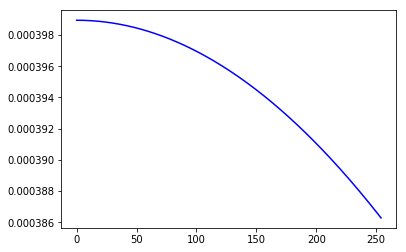

In [356]:
plt.plot(x,1/np.sqrt(varience[0][0]*2*pi)*np.exp((-1)*((x-mean[0][0])**2)/(2*varience[0][0])),'b')
plt.show()